In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import uproot3 as uproot
#import uproot4 as uprootnew
import pandas as pd
import numpy as np
import math
from tqdm import tqdm

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import kdar_functions as kdar
import general_functions as utils

import scipy.stats as stats

import os

import importlib



In [2]:
single_run = False

In [3]:
importlib.reload(kdar)
importlib.reload(utils)

<module 'general_functions' from '/Users/bbogart/Documents/analysisCode/kdar_bdt/general_functions.py'>

In [4]:
def assign_bdt_vars(bdt_model,names,bdt_var):
    d_pred_df = kdar_overlay_df[names]
    d_reg = xgb.DMatrix(d_pred_df, enable_categorical=True)
    d_pred = bdt_model.predict(d_reg)
    kdar_overlay_df[bdt_var] = d_pred
    
    d_pred_df = train_kdar_df[names]
    d_reg = xgb.DMatrix(d_pred_df, enable_categorical=True)
    d_pred = bdt_model.predict(d_reg)
    train_kdar_df[bdt_var] = d_pred
    
    d_pred_df = train_lowE_df[names]
    d_reg = xgb.DMatrix(d_pred_df, enable_categorical=True)
    d_pred = bdt_model.predict(d_reg)
    train_lowE_df[bdt_var] = d_pred
    
    d_pred_df = train_overlay_df[names]
    d_reg = xgb.DMatrix(d_pred_df, enable_categorical=True)
    d_pred = bdt_model.predict(d_reg)
    train_overlay_df[bdt_var] = d_pred
    
    d_pred_df = train_df[names]
    d_reg = xgb.DMatrix(d_pred_df, enable_categorical=True)
    d_pred = bdt_model.predict(d_reg)
    train_df[bdt_var] = d_pred
    
    d_pred_df = test_kdar_df[names]
    d_reg = xgb.DMatrix(d_pred_df, enable_categorical=True)
    d_pred = bdt_model.predict(d_reg)
    test_kdar_df[bdt_var] = d_pred
    
    d_pred_df = test_lowE_df[names]
    d_reg = xgb.DMatrix(d_pred_df, enable_categorical=True)
    d_pred = bdt_model.predict(d_reg)
    test_lowE_df[bdt_var] = d_pred
    
    d_pred_df = test_overlay_df[names]
    d_reg = xgb.DMatrix(d_pred_df, enable_categorical=True)
    d_pred = bdt_model.predict(d_reg)
    test_overlay_df[bdt_var] = d_pred
    
    d_pred_df = test_df[names]
    d_reg = xgb.DMatrix(d_pred_df, enable_categorical=True)
    d_pred = bdt_model.predict(d_reg)
    test_df[bdt_var] = d_pred
    
    
    d_pred_df = nuwro_df[names]
    d_reg = xgb.DMatrix(d_pred_df, enable_categorical=True)
    d_pred = bdt_model.predict(d_reg)
    nuwro_df[bdt_var] = d_pred
    
    d_pred_df = train_nuwro_df[names]
    d_reg = xgb.DMatrix(d_pred_df, enable_categorical=True)
    d_pred = bdt_model.predict(d_reg)
    train_nuwro_df[bdt_var] = d_pred
    
    d_pred_df = test_nuwro_df[names]
    d_reg = xgb.DMatrix(d_pred_df, enable_categorical=True)
    d_pred = bdt_model.predict(d_reg)
    test_nuwro_df[bdt_var] = d_pred
    
    
    d_pred_df = gibuu_df[names]
    d_reg = xgb.DMatrix(d_pred_df, enable_categorical=True)
    d_pred = bdt_model.predict(d_reg)
    gibuu_df[bdt_var] = d_pred
    
    d_pred_df = train_gibuu_df[names]
    d_reg = xgb.DMatrix(d_pred_df, enable_categorical=True)
    d_pred = bdt_model.predict(d_reg)
    train_gibuu_df[bdt_var] = d_pred
    
    d_pred_df = test_gibuu_df[names]
    d_reg = xgb.DMatrix(d_pred_df, enable_categorical=True)
    d_pred = bdt_model.predict(d_reg)
    test_gibuu_df[bdt_var] = d_pred

In [176]:
def evaluate_BDT(bdt_model,bdt_var,evals_result,max_items=10):

   
    bins = np.linspace(1e-7, 1, num=21)
      
    y_sig_test,x = np.histogram(test_df.query("is_KDAR==1")[bdt_var].to_numpy(),bins=bins,density=True)
    y_bck_test,x = np.histogram(test_df.query("is_KDAR==0")[bdt_var].to_numpy(),bins=bins,density=True)
    
    plt.figure()
    plt.hist(train_df.query("is_KDAR==1")[bdt_var].to_numpy(),bins=bins,density=True,alpha=0.8,color="dodgerblue",label="Train Sig")
    plt.plot(utils.get_bin_centers(x),y_sig_test,color="darkblue",marker="o",ms=5,lw=0,label="Test Sig")
    plt.hist(train_df.query("is_KDAR==0")[bdt_var].to_numpy(),bins=bins,density=True,alpha=0.5,color="red",label="Train Bckg",histtype="step")
    plt.plot(utils.get_bin_centers(x),y_bck_test,marker="^",ms=5,lw=0,color="firebrick",label="Test Bckg")
    plt.legend(loc='upper center')
    plt.xlim(0.005,1)
    plt.xlabel(bdt_var)
    plt.ylabel("Counts (Area Norm)")
    plt.show()

    

    bins = np.linspace(1e-7, 1, num=21)
      
    y_sig_test,x = np.histogram(test_kdar_df.query("is_KDAR==1")[bdt_var].to_numpy(),bins=bins,density=True,weights=test_kdar_df.query("is_KDAR==1")["net_weight"].to_numpy())
    y_nuwro_test,x = np.histogram(test_nuwro_df.query("is_KDAR==1")[bdt_var].to_numpy(),bins=bins,density=True,weights=test_nuwro_df.query("is_KDAR==1")["net_weight"].to_numpy())
    y_gibuu_test,x = np.histogram(test_gibuu_df.query("is_KDAR==1")[bdt_var].to_numpy(),bins=bins,density=True,weights=test_gibuu_df.query("is_KDAR==1")["net_weight"].to_numpy())
    y_bck_test,x = np.histogram(test_df.query("is_KDAR==0")[bdt_var].to_numpy(),bins=bins,density=True,weights=test_df.query("is_KDAR==0")["net_weight"].to_numpy())
    
    plt.figure()
    plt.plot(utils.get_bin_centers(x),y_sig_test,color="green",marker="o",ms=7,lw=0,label="Test GENIE")
    plt.plot(utils.get_bin_centers(x),y_nuwro_test,color="orange",marker=">",ms=7,lw=0,label="Test NuWro")
    plt.plot(utils.get_bin_centers(x),y_gibuu_test,color="darkblue",marker="<",ms=7,lw=0,label="Test GiBUU")
    plt.plot(utils.get_bin_centers(x),y_bck_test,marker="^",ms=7,lw=0,color="firebrick",label="Test Bckg")
    plt.legend(loc='upper center')
    plt.xlim(0.005,1)
    plt.xlabel("KDAR Score")
    plt.ylabel("Counts (Area Norm)")
    plt.show()


    

    importance = bdt_model.get_score(importance_type='gain')
    full_lists = sorted(importance.items(), key=lambda x: x[1]) 
    if(len(full_lists)>max_items): lists = full_lists[len(full_lists)-max_items:]
    else: lists = full_lists
    
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.title("Top Vars: Gain")
    plt.barh(x,y)
    plt.show()

    importance = bdt_model.get_score(importance_type='total_gain')
    full_lists = sorted(importance.items(), key=lambda x: x[1]) 
    if(len(full_lists)>max_items): lists = full_lists[len(full_lists)-max_items:]
    else: lists = full_lists    
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.title("Top Vars: Total Gain")
    plt.barh(x,y)
    plt.show()
    
    

    x = np.linspace(1,n,n)
    plt.figure()
    plt.plot(evals_result['train']['logloss'],label='train')
    plt.plot(evals_result['validation']['logloss'],label='test',ls='--')
    plt.ylabel("logloss")
    plt.xlabel("Round")
    plt.show()


    adjust_kdar_eff = 1
    
    preds = test_df[bdt_var].to_numpy()
    
    cut_values = np.geomspace(1e-3, 1, num=100)
    eff_vec=[]
    pur_vec=[]
    effpur_vec=[]
    effpurpur_vec=[]
    effeffpur_vec=[]

    is_KDAR = test_df["is_KDAR"].to_numpy()
    #weights = np.ones_like(test_df["is_KDAR"].to_numpy())
    weights = test_df["net_weight"].to_numpy()
    
    for j in range(len(cut_values)):
        cut = cut_values[j]
        n_sig=0
        n_sel=0
        n_sig_sel=0
        n_bck_selg_sel=0
        for i in range(len(is_KDAR)):
            select=0
            if preds[i]>cut: 
                select=1
                n_sel+=weights[i]
            if is_KDAR[i]==1: 
                n_sig+=weights[i]
                if select==1:n_sig_sel+=weights[i]
        eff_vec.append(n_sig_sel/n_sig*adjust_kdar_eff)
        if n_sel==0: 
            pur_vec.append(0)
            effpur_vec.append(0)
            effpurpur_vec.append(0)
            effeffpur_vec.append(0)
        else: 
            pur_vec.append(n_sig_sel/n_sel)
            effpur_vec.append( (n_sig_sel/n_sig*adjust_kdar_eff) * (n_sig_sel/n_sel) )
            effpurpur_vec.append( (n_sig_sel/n_sig*adjust_kdar_eff) * (n_sig_sel/n_sel) * (n_sig_sel/n_sel) )
            effeffpur_vec.append( (n_sig_sel/n_sig*adjust_kdar_eff) * (n_sig_sel/n_sig*adjust_kdar_eff) * (n_sig_sel/n_sel) )


    preds = test_kdar_df[bdt_var].to_numpy()
    
    cut_values = np.geomspace(1e-3, 1, num=100)
    eff_vec_genie=[]

    is_KDAR = test_kdar_df["is_KDAR"].to_numpy()
    #weights = np.ones_like(test_kdar_df["is_KDAR"].to_numpy())
    weights = test_kdar_df["net_weight"].to_numpy()
    
    for j in range(len(cut_values)):
        cut = cut_values[j]
        n_sig=0
        n_sig_sel=0
        for i in range(len(is_KDAR)):
            n_sig+=weights[i]
            if preds[i]>cut: 
                n_sig_sel+=weights[i]
        eff_vec_genie.append(n_sig_sel/n_sig*adjust_kdar_eff)

    preds = test_nuwro_df[bdt_var].to_numpy()
    
    cut_values = np.geomspace(1e-3, 1, num=100)
    eff_vec_nuwro=[]

    is_KDAR = test_nuwro_df["is_KDAR"].to_numpy()
    #weights = np.ones_like(test_nuwro_df["is_KDAR"].to_numpy())
    weights = test_nuwro_df["net_weight"].to_numpy()
    
    for j in range(len(cut_values)):
        cut = cut_values[j]
        n_sig=0
        n_sig_sel=0
        for i in range(len(is_KDAR)):
            n_sig+=weights[i]
            if preds[i]>cut: 
                n_sig_sel+=weights[i]
        eff_vec_nuwro.append(n_sig_sel/n_sig*adjust_kdar_eff)


    preds = test_gibuu_df[bdt_var].to_numpy()
    
    cut_values = np.geomspace(1e-3, 1, num=100)
    eff_vec_gibuu=[]

    is_KDAR = test_gibuu_df["is_KDAR"].to_numpy()
    #weights = np.ones_like(test_gibuu_df["is_KDAR"].to_numpy())
    weights = test_gibuu_df["net_weight"].to_numpy()
    
    for j in range(len(cut_values)):
        cut = cut_values[j]
        n_sig=0
        n_sig_sel=0
        for i in range(len(is_KDAR)):
            n_sig+=weights[i]
            if preds[i]>cut: 
                n_sig_sel+=weights[i]
        eff_vec_gibuu.append(n_sig_sel/n_sig*adjust_kdar_eff)
    
    preds = train_df[bdt_var].to_numpy()
    train_eff_vec=[]
    train_pur_vec=[]
    train_effpur_vec=[]
    train_effpurpur_vec=[]
    train_effeffpur_vec=[]
    
    is_KDAR = train_df["is_KDAR"].to_numpy()
    #weights = np.ones_like(train_df["is_KDAR"].to_numpy())
    weights = train_df["net_weight"].to_numpy()

    for j in range(len(cut_values)):
        cut = cut_values[j]
        train_n_sig=0
        train_n_sel=0
        train_n_sig_sel=0
        train_n_bck_selg_sel=0
        for i in range(len(is_KDAR)):
            select=0
            if preds[i]>cut: 
                select=1
                train_n_sel+=weights[i]
            if is_KDAR[i]==1: 
                train_n_sig+=weights[i]
                if select==1:train_n_sig_sel+=weights[i]
        train_eff_vec.append(train_n_sig_sel/train_n_sig*adjust_kdar_eff)
        if train_n_sel==0: 
            train_pur_vec.append(0)
            train_effpur_vec.append(0)
            train_effpurpur_vec.append(0)
            train_effeffpur_vec.append(0)
        else: 
            train_pur_vec.append(train_n_sig_sel/train_n_sel)
            train_effpur_vec.append( (train_n_sig_sel/train_n_sig*adjust_kdar_eff) * (train_n_sig_sel/train_n_sel) )
            train_effpurpur_vec.append( (train_n_sig_sel/train_n_sig*adjust_kdar_eff) * (train_n_sig_sel/train_n_sel) * (train_n_sig_sel/train_n_sel) )
            train_effeffpur_vec.append( (train_n_sig_sel/train_n_sig*adjust_kdar_eff) * (train_n_sig_sel/train_n_sig*adjust_kdar_eff) * (train_n_sig_sel/train_n_sel) )
            
    
    preds = train_kdar_df[bdt_var].to_numpy()
    
    cut_values = np.geomspace(1e-3, 1, num=100)
    train_eff_vec_genie=[]

    is_KDAR = train_kdar_df["is_KDAR"].to_numpy()
    #weights = np.ones_like(train_kdar_df["is_KDAR"].to_numpy())
    weights = train_kdar_df["net_weight"].to_numpy()
    
    for j in range(len(cut_values)):
        cut = cut_values[j]
        n_sig=0
        n_sig_sel=0
        for i in range(len(is_KDAR)):
            n_sig+=weights[i]
            if preds[i]>cut: 
                n_sig_sel+=weights[i]
        train_eff_vec_genie.append(n_sig_sel/n_sig*adjust_kdar_eff)

    preds = train_nuwro_df[bdt_var].to_numpy()
    
    cut_values = np.geomspace(1e-3, 1, num=100)
    train_eff_vec_nuwro=[]

    is_KDAR = train_nuwro_df["is_KDAR"].to_numpy()
    #weights = np.ones_like(train_nuwro_df["is_KDAR"].to_numpy())
    weights = train_nuwro_df["net_weight"].to_numpy()
    
    for j in range(len(cut_values)):
        cut = cut_values[j]
        n_sig=0
        n_sig_sel=0
        for i in range(len(is_KDAR)):
            n_sig+=weights[i]
            if preds[i]>cut: 
                n_sig_sel+=weights[i]
        train_eff_vec_nuwro.append(n_sig_sel/n_sig*adjust_kdar_eff)


    preds = train_gibuu_df[bdt_var].to_numpy()
    
    cut_values = np.geomspace(1e-3, 1, num=100)
    train_eff_vec_gibuu=[]

    is_KDAR = train_gibuu_df["is_KDAR"].to_numpy()
    #weights = np.ones_like(train_gibuu_df["is_KDAR"].to_numpy())
    weights = train_gibuu_df["net_weight"].to_numpy()
    
    for j in range(len(cut_values)):
        cut = cut_values[j]
        n_sig=0
        n_sig_sel=0
        for i in range(len(is_KDAR)):
            n_sig+=weights[i]
            if preds[i]>cut: 
                n_sig_sel+=weights[i]
        train_eff_vec_gibuu.append(n_sig_sel/n_sig*adjust_kdar_eff)


    
    plt.figure() 
    plt.plot(cut_values,eff_vec,label="Efficiency: Test",color='dodgerblue',lw=2)
    plt.plot(cut_values,pur_vec,label="Purity: Test",color='orange',lw=2)
    plt.plot(cut_values,train_eff_vec,label="Efficiency: Train",color='blue',ls=":",lw=2)
    plt.plot(cut_values,train_pur_vec,label="Purity: Train",color='orangered',ls=":",lw=2)
    plt.legend()
    plt.show()
    
    plt.figure() 
    plt.plot(cut_values,eff_vec_genie,label="GENIE: Test",color='darkgrey',lw=2)
    plt.plot(cut_values,train_eff_vec_genie,label="GENIE: Train",color='black',ls=":",lw=2)    
    plt.plot(cut_values,eff_vec_nuwro,label="NuWro: Test",color='red',lw=2)
    plt.plot(cut_values,train_eff_vec_nuwro,label="NuWro: Train",color='firebrick',ls=":",lw=2)    
    plt.plot(cut_values,eff_vec_gibuu,label="GiBUU: Test",color='dodgerblue',lw=2)
    plt.plot(cut_values,train_eff_vec_gibuu,label="GiBUU: Train",color='blue',ls=":",lw=2)  
    plt.legend()
    plt.show() 

    
    plt.figure() 
    plt.plot(cut_values,eff_vec,label="Eff*Pur: Test",color='dodgerblue',lw=2)
    plt.plot(cut_values,effpurpur_vec,label="Eff*Pur*Pur: Test",color='orange',lw=2)
    plt.plot(cut_values,effeffpur_vec,label="Eff*Eff*Pur: Test",color='lime',lw=2)
    plt.plot(cut_values,train_effpur_vec,label="Eff*Pur: Train",color='blue',ls=":",lw=2)
    plt.plot(cut_values,train_effpurpur_vec,label="Eff*Pur*Pur: Train",color='orangered',ls=":",lw=2)
    plt.plot(cut_values,train_effeffpur_vec,label="Eff*Eff*Pur: Train",color='green',ls=':',lw=2)
    plt.legend()
    plt.show()


    adjust_ext_eff = 1
    adjust_bck_eff = 1

    cut_values = np.geomspace(1e-3, 1, num=100)
    cut_values = np.linspace(1e-3, 1, num=300)
    test_sig_sqrt_bck_vec=[]
    test_sig_bck_vec=[]
    test_sig_bck_bck_vec=[]
    test_sig_per_vec=[]
    test_eff = []
    test_bck_eff=[]
    test_bck_nu_eff=[]
    test_bck_ext_eff=[]
    
    is_KDAR = test_df["is_KDAR"].to_numpy()
    isEXT = test_df["isEXT"].to_numpy()
    weights = np.ones_like(test_df["is_KDAR"].to_numpy())
    preds = test_df[bdt_var].to_numpy()

    for j in range(len(cut_values)):
        cut = cut_values[j]
        n_sig=0
        n_sel=0
        n_sig_sel=0
        n_bck_sel=0
        n_bck_nu_sel=0
        n_bck_ext_sel=0
        n_bck_nu=0
        n_bck_ext=1
        for i in range(len(is_KDAR)):
            select=0
            if preds[i]>cut: 
                select=1
                n_sel+=weights[i]
            if is_KDAR[i]==1: 
                n_sig+=weights[i]
                if select==1:n_sig_sel+=weights[i]
            else:
                if select: n_bck_sel+=weights[i]
                if isEXT[i]==1: 
                    n_bck_ext+=weights[i]
                    if select: n_bck_ext_sel+=weights[i]
                else: 
                    n_bck_nu+=weights[i]
                    if select: n_bck_nu_sel+=weights[i]
        n_bck = np.sum(weights)-n_sel
        if n_bck_sel==0: 
            test_sig_sqrt_bck_vec.append(0)
            test_sig_bck_vec.append(0)
            test_sig_bck_bck_vec.append(0)
            test_sig_per_vec.append(0)
        else: 
            test_sig_sqrt_bck_vec.append(n_sig_sel/np.sqrt(n_bck_sel))
            test_sig_bck_vec.append(n_sig_sel/n_bck_sel)
            test_sig_bck_bck_vec.append(n_sig_sel/n_bck_sel/n_bck_sel)
            test_sig_per_vec.append(n_sig_sel/np.sqrt(n_sig_sel+n_bck_sel))
        test_eff.append(n_sig_sel/n_sig*adjust_kdar_eff)
        test_bck_eff.append(n_bck_sel/(n_bck_ext*adjust_ext_eff+n_bck_nu*adjust_bck_eff))
        test_bck_nu_eff.append(n_bck_nu_sel/n_bck_nu*adjust_bck_eff)
        test_bck_ext_eff.append(n_bck_ext_sel/n_bck_ext*adjust_ext_eff)


    train_sig_sqrt_bck_vec=[]
    train_sig_bck_vec=[]
    train_sig_bck_bck_vec=[]
    train_sig_per_vec=[]
    train_eff = []
    train_bck_eff = []
    train_bck_nu_eff = []
    train_bck_ext_eff = []

    is_KDAR = train_df["is_KDAR"].to_numpy()
    isEXT = train_df["isEXT"].to_numpy()
    weights = np.ones_like(train_df["is_KDAR"].to_numpy())
    preds = train_df[bdt_var].to_numpy()
    
    for j in range(len(cut_values)):
        cut = cut_values[j]
        n_sig=0
        n_sel=0
        n_sig_sel=0
        n_bck_sel=0
        n_bck_nu_sel=0
        n_bck_ext_sel=0
        n_bck_nu=0
        n_bck_ext=1
        for i in range(len(is_KDAR)):
            select=0
            if preds[i]>cut: 
                select=1
                n_sel+=weights[i]
            if is_KDAR[i]==1: 
                n_sig+=weights[i]
                if select==1:n_sig_sel+=weights[i]
            else:
                if select: n_bck_sel+=weights[i]
                if isEXT[i]==1: 
                    n_bck_ext+=weights[i]
                    if select: n_bck_ext_sel+=weights[i]
                else: 
                    n_bck_nu+=weights[i]
                    if select: n_bck_nu_sel+=weights[i]
        n_bck = np.sum(weights)-n_sig
        if n_bck_sel==0: 
            train_sig_sqrt_bck_vec.append(0)
            train_sig_bck_vec.append(0)
            train_sig_bck_bck_vec.append(0)
            train_sig_per_vec.append(0)
        else: 
            train_sig_sqrt_bck_vec.append(n_sig_sel/np.sqrt(n_bck_sel))
            train_sig_bck_vec.append(n_sig_sel/n_bck_sel)
            train_sig_bck_bck_vec.append(n_sig_sel/n_bck_sel/n_bck_sel)
            train_sig_per_vec.append(n_sig_sel/np.sqrt(n_sig_sel+n_bck_sel))
        train_eff.append(n_sig_sel/n_sig*adjust_kdar_eff)
        train_bck_eff.append(n_bck_sel/n_bck*adjust_bck_eff)
        train_bck_eff.append(n_bck_sel/(n_bck_ext*adjust_ext_eff+n_bck_nu*adjust_bck_eff))
        train_bck_nu_eff.append(n_bck_nu_sel/n_bck_nu*adjust_bck_eff)
        train_bck_ext_eff.append(n_bck_ext_sel/n_bck_ext*adjust_ext_eff)
    
    
    plt.figure() 
    plt.plot(cut_values,test_eff,label="Sig Eff: Test",color='dodgerblue',lw=2)
    plt.plot(cut_values,test_bck_nu_eff,label="Bck nu Eff: Test",color='orange',lw=2)
    plt.plot(cut_values,train_eff,label="Sig Eff: Train",color='blue',ls=":",lw=2)
    plt.plot(cut_values,train_bck_nu_eff,label="Bck nu Eff: Train",color='darkorange',ls=":",lw=2)
    plt.legend()
    plt.show()




In [320]:
def plot_efficiency_detailed(bdt_var,cutvalue,no_gibuu_weights=True,wrt_preset=False,add_cut="",adjusty=False):
    
    truth_vars = ["truth_Emuon","true_angle_deg","truth_prim_p_energy","true_angle_P_deg","true_Em","true_q","true_sqrtQ2","true_nu","true_pl","true_pt","true_KE","truth_Emuon"]
    xlabels = [f"$E_\mu$ (MeV)","$\\theta_\mu$ (degrees)",f"$K_p$ (MeV)","$\\theta_p$ (degrees)","$E_{missing}$ (MeV)","$q$ (MeV)","$Q$ (MeV)","$\\nu$ (MeV)","$p_l$ (MeV)","$p_t$ (MeV)","$K_{vis}$ (MeV)",f"$E_\mu$ (MeV)"]
    bins_list = []
    bins_list.append(np.linspace(0,130,14))
    bins_list.append(np.linspace(0,180,10))
    bins_list.append(np.linspace(0,130,14))
    bins_list.append(np.linspace(0,180,10))
    bins_list.append(np.linspace(-20,100,13))
    bins_list.append(np.linspace(50,450,11))
    bins_list.append(np.linspace(0,460,14))
    bins_list.append(np.linspace(0,130,14))
    bins_list.append(np.linspace(-200,200,21))
    bins_list.append(np.linspace(0,200,11))
    bins_list.append(np.linspace(0,150,16))
    bins_list.append(np.linspace(0,130,2))

    sig_query = "is_KDAR==1"
    if wrt_preset: sig_query = "is_KDAR==1 and "+presel_query
    
    sig_test_df = kdar_overlay_df.query(sig_query).copy()
    sig_sel_test_df = kdar_overlay_df.query("is_KDAR==1").query(presel_query).query(bdt_var+f">{cutvalue}").copy()
    if add_cut!="": sig_sel_test_df = sig_sel_test_df.query(add_cut)
    
    sig_nuwro_df = nuwro_df.query(sig_query).copy()
    sig_sel_nuwro_df = nuwro_df.query("is_KDAR==1").query(presel_query).copy().query(bdt_var+f">{cutvalue}").copy()
    if add_cut!="": sig_sel_nuwro_df = sig_sel_nuwro_df.query(add_cut)
    
    sig_gibuu_df = gibuu_df.query(sig_query).copy()
    sig_sel_gibuu_df = gibuu_df.query("is_KDAR==1").query(presel_query).copy().query(bdt_var+f">{cutvalue}").copy()
    if add_cut!="": sig_sel_gibuu_df = sig_sel_gibuu_df.query(add_cut)
    
    presel_eff = []
    nuwro_presel_eff = []
    gibuu_presel_eff = []
    
    for i in range(len(truth_vars)):
        
        var = truth_vars[i]
        bins = bins_list[i]
        test_sig, x = np.histogram( np.clip(sig_test_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_test_df['net_weight'].to_numpy())
        test_sig_sel, x = np.histogram( np.clip(sig_sel_test_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_test_df['net_weight'].to_numpy())
        nuwro_sig, x = np.histogram( np.clip(sig_nuwro_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_nuwro_df['net_weight'].to_numpy())
        nuwro_sig_sel, x = np.histogram( np.clip(sig_sel_nuwro_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_nuwro_df['net_weight'].to_numpy())
        gibuu_sig, x = np.histogram( np.clip(sig_gibuu_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_gibuu_df['net_weight'].to_numpy())
        gibuu_sig_sel, x = np.histogram( np.clip(sig_sel_gibuu_df[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_gibuu_df['net_weight'].to_numpy())
        w_gibuu_sig = gibuu_sig
        w_gibuu_sig_sel = gibuu_sig_sel
        if no_gibuu_weights:
            w_gibuu_sig, x = np.histogram( np.clip(sig_gibuu_df[var].to_numpy(),bins[0],bins[-1]),bins=bins)
            w_gibuu_sig_sel, x = np.histogram( np.clip(sig_sel_gibuu_df[var].to_numpy(),bins[0],bins[-1]),bins=bins)
        if var == "truth_prim_proton_costheta":
            test_sig, x = np.histogram( np.clip(sig_test_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_test_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
            test_sig_sel, x = np.histogram( np.clip(sig_sel_test_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_test_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
            nuwro_sig, x = np.histogram( np.clip(sig_nuwro_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_nuwro_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
            nuwro_sig_sel, x = np.histogram( np.clip(sig_sel_nuwro_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_nuwro_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
            gibuu_sig, x = np.histogram( np.clip(sig_gibuu_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_gibuu_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
            gibuu_sig_sel, x = np.histogram( np.clip(sig_sel_gibuu_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins,weights=sig_sel_gibuu_df.query("truth_prim_p_energy>0")['net_weight'].to_numpy())
            w_gibuu_sig = gibuu_sig
            w_gibuu_sig_sel = gibuu_sig_sel
            if no_gibuu_weights:
                w_gibuu_sig, x = np.histogram( np.clip(sig_gibuu_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins)
                w_gibuu_sig_sel, x = np.histogram( np.clip(sig_sel_gibuu_df.query("truth_prim_p_energy>0")[var].to_numpy(),bins[0],bins[-1]),bins=bins)
            
        test_eff = []
        test_err = utils.wilson_err(test_sig_sel, test_sig)
        
        nuwro_eff = []
        nuwro_err = utils.wilson_err(nuwro_sig_sel, nuwro_sig)
        
        gibuu_eff = []
        gibuu_err = utils.wilson_err(w_gibuu_sig_sel, w_gibuu_sig)
        
        err_truth = utils.get_x_err_Enu(utils.get_bin_centers(bins),bins)
    
        for b in range(len(bins)-1):
            if test_sig[b]==0: test_eff.append(0)
            else: test_eff.append(test_sig_sel[b]/test_sig[b])
            if nuwro_sig[b]==0: nuwro_eff.append(0)
            else: nuwro_eff.append(nuwro_sig_sel[b]/nuwro_sig[b])
            if gibuu_sig[b]==0: gibuu_eff.append(0)
            else: gibuu_eff.append(gibuu_sig_sel[b]/gibuu_sig[b])

        print(1.1*np.max([np.max(test_eff),np.max(nuwro_eff),np.max(gibuu_eff)]))
                
        plt.figure()
        plt.errorbar(utils.get_bin_centers(bins),test_eff,xerr=err_truth,yerr=test_err,label='GENIE', ms=0, fmt='o',lw=4,color='black')
        plt.errorbar(utils.get_bin_centers(bins),nuwro_eff,xerr=err_truth,yerr=nuwro_err,label='NuWro', ms=0, fmt='o',lw=3.5,color='red')
        plt.errorbar(utils.get_bin_centers(bins),gibuu_eff,xerr=err_truth,yerr=gibuu_err,label='GiBUU', ms=0, fmt='o',lw=3,color='dodgerblue')
        plt.ylim(0,1.05)
        if adjusty: plt.ylim(0,1.1*np.max([np.max(test_eff),np.max(nuwro_eff),np.max(gibuu_eff)]))
        plt.xlabel(xlabels[i])
        if wrt_preset: plt.ylabel("BDT Selection Efficiency wrt Preselection")
        else: plt.ylabel("BDT Selection Efficiency")
        plt.legend()
        plt.show()
    
        presel_eff.append(np.nan_to_num(test_eff,nan=0))
        nuwro_presel_eff.append(np.nan_to_num(nuwro_eff,nan=0))
        gibuu_presel_eff.append(np.nan_to_num(gibuu_eff,nan=0))


In [7]:


def print_df_to_file(df,file):
    run_list = df["run"].to_numpy()
    subrun_list = df["subrun"].to_numpy()
    event_list = df["event"].to_numpy()
    Enu_list = df["truth_nuEnergy"].to_numpy()
    thetanu_list = df["truth_nu_theta"].to_numpy()
    phinu_list = df["truth_nu_phi"].to_numpy()
    Emu_list = df["truth_Emuon"].to_numpy()
    thetamu_list = df["truth_muon_theta"].to_numpy()
    phimu_list = df["truth_muon_phi"].to_numpy()
    E_list = df["ssm_kine_energy"].to_numpy()
    x_list = df["ssm_x_dir"].to_numpy()
    y_list = df["ssm_y_dir"].to_numpy()
    z_list = df["ssm_z_dir"].to_numpy()
    
    f = open(file,"a")
    for i in range(len(run_list)):
        f.write(f"{run_list[i]} {subrun_list[i]} {event_list[i]} {Enu_list[i]} {thetanu_list[i]} {phinu_list[i]} {Emu_list[i]} {thetamu_list[i]} {phimu_list[i]} {E_list[i]} {x_list[i]} {y_list[i]} {z_list[i]}")
        f.write("\n")


def save_bdt(model,name,suffix):

    
    if os.path.exists(name+'.json'):
        print(name+'.json exists, exiting')
        return 0
    model.save_model(name+'.json')

    file = "train_kdar_overlay_run_subrun_event_"+name+suffix+".txt"
    if os.path.exists(file):
        print(file+' exists, exiting')
        return 0
    print_df_to_file(train_kdar_df,file)

    file = "train_nuwro_run_subrun_event_"+name+suffix+".txt"
    if os.path.exists(file):
        print(file+' exists, exiting')
        return 0
    print_df_to_file(train_nuwro_df,file)

    file = "train_gibuu_run_subrun_event_"+name+suffix+".txt"
    if os.path.exists(file):
        print(file+' exists, exiting')
        return 0
    print_df_to_file(train_gibuu_df,file)
    
    file = "train_overlay_run_subrun_event_"+name+suffix+".txt"
    if os.path.exists(file):
        print(file+' exists, exiting')
        return 0
    print_df_to_file(train_overlay_df,file)

    file = "train_lowE_run_subrun_event_"+name+suffix+".txt"
    if os.path.exists(file):
        print(file+' exists, exiting')
        return 0
    print_df_to_file(train_lowE_df,file)
    

In [8]:
ssm_bdt_vars = [
          "ssm_Nsm",
          "ssm_Nsm_wivtx",
          "ssm_dq_dx_fwd_1",
          "ssm_dq_dx_fwd_2",
          "ssm_dq_dx_fwd_3",
          "ssm_dq_dx_fwd_4",
          "ssm_dq_dx_fwd_5",
          "ssm_dq_dx_bck_1",
          "ssm_dq_dx_bck_2",
          "ssm_dq_dx_bck_3",
          "ssm_dq_dx_bck_4",
          "ssm_dq_dx_bck_5",
          "ssm_d_dq_dx_fwd_12",
          "ssm_d_dq_dx_fwd_23",
          "ssm_d_dq_dx_fwd_34",
          "ssm_d_dq_dx_fwd_45",
          "ssm_d_dq_dx_bck_12",
          "ssm_d_dq_dx_bck_23",
          "ssm_d_dq_dx_bck_34",
          "ssm_d_dq_dx_bck_45",
          "ssm_max_dq_dx_fwd_3",
          "ssm_max_dq_dx_fwd_5",
          "ssm_max_dq_dx_bck_3",
          "ssm_max_dq_dx_bck_5",
          "ssm_max_d_dq_dx_fwd_3",
          "ssm_max_d_dq_dx_fwd_5",
          "ssm_max_d_dq_dx_bck_3",
          "ssm_max_d_dq_dx_bck_5",
          "ssm_medium_dq_dx",
          "ssm_medium_dq_dx_bp",
          "ssm_angle_to_z",
          "ssm_angle_to_target",
          "ssm_angle_to_absorber",
          "ssm_angle_to_vertical",
          "ssm_x_dir",
          "ssm_y_dir",
          "ssm_z_dir",
          "ssm_kine_energy",
          "ssm_kine_energy_reduced",
          "ssm_vtx_activity",
          "ssm_pdg",
          "ssm_dQ_dx_cut",
          "ssm_score_mu_fwd",
          "ssm_score_p_fwd",
          "ssm_score_e_fwd",
          "ssm_score_mu_bck",
          "ssm_score_p_bck",
          "ssm_score_e_bck",
          "ssm_score_mu_fwd_bp",
          "ssm_score_p_fwd_bp",
          "ssm_score_e_fwd_bp",
          "ssm_length",
          "ssm_direct_length",
          "ssm_length_ratio",
          "ssm_max_dev",
          "ssm_n_prim_tracks_1",
          "ssm_n_prim_tracks_3",
          "ssm_n_prim_tracks_5",
          "ssm_n_prim_tracks_8",
          "ssm_n_prim_tracks_11",
          "ssm_n_all_tracks_1",
          "ssm_n_all_tracks_3",
          "ssm_n_all_tracks_5",
          "ssm_n_all_tracks_8",
          "ssm_n_all_tracks_11",
          "ssm_n_daughter_tracks_1",
          "ssm_n_daughter_tracks_3",
          "ssm_n_daughter_tracks_5",
          "ssm_n_daughter_tracks_8",
          "ssm_n_daughter_tracks_11",
          "ssm_n_daughter_all_1",
          "ssm_n_daughter_all_3",
          "ssm_n_daughter_all_5",
          "ssm_n_daughter_all_8",
          "ssm_n_daughter_all_11",
    
          "ssm_prim_track1_pdg",
          "ssm_prim_track1_score_mu_fwd",
          "ssm_prim_track1_score_p_fwd",
          "ssm_prim_track1_score_e_fwd",
          "ssm_prim_track1_score_mu_bck",
          "ssm_prim_track1_score_p_bck",
          "ssm_prim_track1_score_e_bck",
          "ssm_prim_track1_length",
          "ssm_prim_track1_direct_length",
          "ssm_prim_track1_length_ratio",
          "ssm_prim_track1_max_dev",
          "ssm_prim_track1_kine_energy_range",
          "ssm_prim_track1_kine_energy_range_mu",
          "ssm_prim_track1_kine_energy_range_p",
          "ssm_prim_track1_kine_energy_range_e",
          "ssm_prim_track1_kine_energy_cal",
          "ssm_prim_track1_medium_dq_dx",
          "ssm_prim_track1_x_dir",
          "ssm_prim_track1_y_dir",
          "ssm_prim_track1_z_dir",
          "ssm_prim_track1_add_daught_track_counts_1",
          "ssm_prim_track1_add_daught_all_counts_1",
          "ssm_prim_track1_add_daught_track_counts_5",
          "ssm_prim_track1_add_daught_all_counts_5",
          "ssm_prim_track1_add_daught_track_counts_11",
          "ssm_prim_track1_add_daught_all_counts_11",
    
          "ssm_prim_track2_pdg",
          "ssm_prim_track2_score_mu_fwd",
          "ssm_prim_track2_score_p_fwd",
          "ssm_prim_track2_score_e_fwd",
          "ssm_prim_track2_score_mu_bck",
          "ssm_prim_track2_score_p_bck",
          "ssm_prim_track2_score_e_bck",
          "ssm_prim_track2_length",
          "ssm_prim_track2_direct_length",
          "ssm_prim_track2_length_ratio",
          "ssm_prim_track2_max_dev",
          "ssm_prim_track2_kine_energy_range",
          "ssm_prim_track2_kine_energy_range_mu",
          "ssm_prim_track2_kine_energy_range_p",
          "ssm_prim_track2_kine_energy_range_e",
          "ssm_prim_track2_kine_energy_cal",
          "ssm_prim_track2_medium_dq_dx",
          "ssm_prim_track2_x_dir",
          "ssm_prim_track2_y_dir",
          "ssm_prim_track2_z_dir",
          "ssm_prim_track2_add_daught_track_counts_1",
          "ssm_prim_track2_add_daught_all_counts_1",
          "ssm_prim_track2_add_daught_track_counts_5",
          "ssm_prim_track2_add_daught_all_counts_5",
          "ssm_prim_track2_add_daught_track_counts_11",
          "ssm_prim_track2_add_daught_all_counts_11",
    
          "ssm_daught_track1_pdg",
          "ssm_daught_track1_score_mu_fwd",
          "ssm_daught_track1_score_p_fwd",
          "ssm_daught_track1_score_e_fwd",
          "ssm_daught_track1_score_mu_bck",
          "ssm_daught_track1_score_p_bck",
          "ssm_daught_track1_score_e_bck",
          "ssm_daught_track1_length",
          "ssm_daught_track1_direct_length",
          "ssm_daught_track1_length_ratio",
          "ssm_daught_track1_max_dev",
          "ssm_daught_track1_kine_energy_range",
          "ssm_daught_track1_kine_energy_range_mu",
          "ssm_daught_track1_kine_energy_range_p",
          "ssm_daught_track1_kine_energy_range_e",
          "ssm_daught_track1_kine_energy_cal",
          "ssm_daught_track1_medium_dq_dx",
          "ssm_daught_track1_x_dir",
          "ssm_daught_track1_y_dir",
          "ssm_daught_track1_z_dir",
          "ssm_daught_track1_add_daught_track_counts_1",
          "ssm_daught_track1_add_daught_all_counts_1",
          "ssm_daught_track1_add_daught_track_counts_5",
          "ssm_daught_track1_add_daught_all_counts_5",
          "ssm_daught_track1_add_daught_track_counts_11",
          "ssm_daught_track1_add_daught_all_counts_11",
    
          "ssm_daught_track2_pdg",
          "ssm_daught_track2_score_mu_fwd",
          "ssm_daught_track2_score_p_fwd",
          "ssm_daught_track2_score_e_fwd",
          "ssm_daught_track2_score_mu_bck",
          "ssm_daught_track2_score_p_bck",
          "ssm_daught_track2_score_e_bck",
          "ssm_daught_track2_length",
          "ssm_daught_track2_direct_length",
          "ssm_daught_track2_length_ratio",
          "ssm_daught_track2_max_dev",
          "ssm_daught_track2_kine_energy_range",
          "ssm_daught_track2_kine_energy_range_mu",
          "ssm_daught_track2_kine_energy_range_p",
          "ssm_daught_track2_kine_energy_range_e",
          "ssm_daught_track2_kine_energy_cal",
          "ssm_daught_track2_medium_dq_dx",
          "ssm_daught_track2_x_dir",
          "ssm_daught_track2_y_dir",
          "ssm_daught_track2_z_dir",
          "ssm_daught_track2_add_daught_track_counts_1",
          "ssm_daught_track2_add_daught_all_counts_1",
          "ssm_daught_track2_add_daught_track_counts_5",
          "ssm_daught_track2_add_daught_all_counts_5",
          "ssm_daught_track2_add_daught_track_counts_11",
          "ssm_daught_track2_add_daught_all_counts_11",
    
          "ssm_prim_shw1_pdg",
          "ssm_prim_shw1_score_mu_fwd",
          "ssm_prim_shw1_score_p_fwd",
          "ssm_prim_shw1_score_e_fwd",
          "ssm_prim_shw1_score_mu_bck",
          "ssm_prim_shw1_score_p_bck",
          "ssm_prim_shw1_score_e_bck",
          "ssm_prim_shw1_length",
          "ssm_prim_shw1_direct_length",
          "ssm_prim_shw1_length_ratio",
          "ssm_prim_shw1_max_dev",
          "ssm_prim_shw1_kine_energy_range",
          "ssm_prim_shw1_kine_energy_range_mu",
          "ssm_prim_shw1_kine_energy_range_p",
          "ssm_prim_shw1_kine_energy_range_e",
          "ssm_prim_shw1_kine_energy_cal",
          'ssm_prim_shw1_kine_energy_best',
          "ssm_prim_shw1_medium_dq_dx",
          "ssm_prim_shw1_x_dir",
          "ssm_prim_shw1_y_dir",
          "ssm_prim_shw1_z_dir",
          "ssm_prim_shw1_add_daught_track_counts_1",
          "ssm_prim_shw1_add_daught_all_counts_1",
          "ssm_prim_shw1_add_daught_track_counts_5",
          "ssm_prim_shw1_add_daught_all_counts_5",
          "ssm_prim_shw1_add_daught_track_counts_11",
          "ssm_prim_shw1_add_daught_all_counts_11",
    
          "ssm_prim_shw2_pdg",
          "ssm_prim_shw2_score_mu_fwd",
          "ssm_prim_shw2_score_p_fwd",
          "ssm_prim_shw2_score_e_fwd",
          "ssm_prim_shw2_score_mu_bck",
          "ssm_prim_shw2_score_p_bck",
          "ssm_prim_shw2_score_e_bck",
          "ssm_prim_shw2_length",
          "ssm_prim_shw2_direct_length",
          "ssm_prim_shw2_length_ratio",
          "ssm_prim_shw2_max_dev",
          "ssm_prim_shw2_kine_energy_range",
          "ssm_prim_shw2_kine_energy_range_mu",
          "ssm_prim_shw2_kine_energy_range_p",
          "ssm_prim_shw2_kine_energy_range_e",
          "ssm_prim_shw2_kine_energy_cal",
          'ssm_prim_shw2_kine_energy_best',
          "ssm_prim_shw2_medium_dq_dx",
          "ssm_prim_shw2_x_dir",
          "ssm_prim_shw2_y_dir",
          "ssm_prim_shw2_z_dir",
          "ssm_prim_shw2_add_daught_track_counts_1",
          "ssm_prim_shw2_add_daught_all_counts_1",
          "ssm_prim_shw2_add_daught_track_counts_5",
          "ssm_prim_shw2_add_daught_all_counts_5",
          "ssm_prim_shw2_add_daught_track_counts_11",
          "ssm_prim_shw2_add_daught_all_counts_11",
    
          "ssm_daught_shw1_pdg",
          "ssm_daught_shw1_score_mu_fwd",
          "ssm_daught_shw1_score_p_fwd",
          "ssm_daught_shw1_score_e_fwd",
          "ssm_daught_shw1_score_mu_bck",
          "ssm_daught_shw1_score_p_bck",
          "ssm_daught_shw1_score_e_bck",
          "ssm_daught_shw1_length",
          "ssm_daught_shw1_direct_length",
          "ssm_daught_shw1_length_ratio",
          "ssm_daught_shw1_max_dev",
          "ssm_daught_shw1_kine_energy_range",
          "ssm_daught_shw1_kine_energy_range_mu",
          "ssm_daught_shw1_kine_energy_range_p",
          "ssm_daught_shw1_kine_energy_range_e",
          "ssm_daught_shw1_kine_energy_cal",
          'ssm_daught_shw1_kine_energy_best',
          "ssm_daught_shw1_medium_dq_dx",
          "ssm_daught_shw1_x_dir",
          "ssm_daught_shw1_y_dir",
          "ssm_daught_shw1_z_dir",
          "ssm_daught_shw1_add_daught_track_counts_1",
          "ssm_daught_shw1_add_daught_all_counts_1",
          "ssm_daught_shw1_add_daught_track_counts_5",
          "ssm_daught_shw1_add_daught_all_counts_5",
          "ssm_daught_shw1_add_daught_track_counts_11",
          "ssm_daught_shw1_add_daught_all_counts_11",
    
          "ssm_daught_shw2_pdg",
          "ssm_daught_shw2_score_mu_fwd",
          "ssm_daught_shw2_score_p_fwd",
          "ssm_daught_shw2_score_e_fwd",
          "ssm_daught_shw2_score_mu_bck",
          "ssm_daught_shw2_score_p_bck",
          "ssm_daught_shw2_score_e_bck",
          "ssm_daught_shw2_length",
          "ssm_daught_shw2_direct_length",
          "ssm_daught_shw2_length_ratio",
          "ssm_daught_shw2_max_dev",
          "ssm_daught_shw2_kine_energy_range",
          "ssm_daught_shw2_kine_energy_range_mu",
          "ssm_daught_shw2_kine_energy_range_p",
          "ssm_daught_shw2_kine_energy_range_e",
          "ssm_daught_shw2_kine_energy_cal",
          'ssm_daught_shw2_kine_energy_best',
          "ssm_daught_shw2_medium_dq_dx",
          "ssm_daught_shw2_x_dir",
          "ssm_daught_shw2_y_dir",
          "ssm_daught_shw2_z_dir",
          "ssm_daught_shw2_add_daught_track_counts_1",
          "ssm_daught_shw2_add_daught_all_counts_1",
          "ssm_daught_shw2_add_daught_track_counts_5",
          "ssm_daught_shw2_add_daught_all_counts_5",
          "ssm_daught_shw2_add_daught_track_counts_11",
          "ssm_daught_shw2_add_daught_all_counts_11",
    
          "ssm_nu_angle_z",
          "ssm_nu_angle_target",
          "ssm_nu_angle_absorber",
          "ssm_nu_angle_vertical",
          "ssm_prim_nu_angle_z",
          "ssm_prim_nu_angle_target",
          "ssm_prim_nu_angle_absorber",
          "ssm_prim_nu_angle_vertical",
          "ssm_con_nu_angle_z",
          "ssm_con_nu_angle_target",
          "ssm_con_nu_angle_absorber",
          "ssm_con_nu_angle_vertical",
          "ssm_track_angle_z",
          "ssm_track_angle_target",
          "ssm_track_angle_absorber",
          "ssm_track_angle_vertical",
          "ssm_vtxX",
          "ssm_vtxY",
          "ssm_vtxZ",

          "ssm_offvtx_length",
          "ssm_offvtx_energy",
          "ssm_n_offvtx_tracks_1",
          "ssm_n_offvtx_tracks_3",
          "ssm_n_offvtx_tracks_5",
          "ssm_n_offvtx_tracks_8",
          "ssm_n_offvtx_tracks_11",
          "ssm_n_offvtx_showers_1",
          "ssm_n_offvtx_showers_3",
          "ssm_n_offvtx_showers_5",
          "ssm_n_offvtx_showers_8",
          "ssm_n_offvtx_showers_11",
          "ssm_offvtx_track1_pdg",
          "ssm_offvtx_track1_score_mu_fwd",
          "ssm_offvtx_track1_score_p_fwd",
          "ssm_offvtx_track1_score_e_fwd",
          "ssm_offvtx_track1_score_mu_bck",
          "ssm_offvtx_track1_score_p_bck",
          "ssm_offvtx_track1_score_e_bck",
          "ssm_offvtx_track1_length",
          "ssm_offvtx_track1_direct_length",
          "ssm_offvtx_track1_max_dev",
          "ssm_offvtx_track1_kine_energy_range",
          "ssm_offvtx_track1_kine_energy_range_mu",
          "ssm_offvtx_track1_kine_energy_range_p",
          "ssm_offvtx_track1_kine_energy_range_e",
          "ssm_offvtx_track1_kine_energy_cal",
          "ssm_offvtx_track1_medium_dq_dx",
          "ssm_offvtx_track1_x_dir",
          "ssm_offvtx_track1_y_dir",
          "ssm_offvtx_track1_z_dir",
          "ssm_offvtx_track1_dist_mainvtx",
          "ssm_offvtx_shw1_pdg_offvtx",
          "ssm_offvtx_shw1_score_mu_fwd",
          "ssm_offvtx_shw1_score_p_fwd",
          "ssm_offvtx_shw1_score_e_fwd",
          "ssm_offvtx_shw1_score_mu_bck",
          "ssm_offvtx_shw1_score_p_bck",
          "ssm_offvtx_shw1_score_e_bck",
          "ssm_offvtx_shw1_length",
          "ssm_offvtx_shw1_direct_length",
          "ssm_offvtx_shw1_max_dev",
          "ssm_offvtx_shw1_kine_energy_best",
          "ssm_offvtx_shw1_kine_energy_range",
          "ssm_offvtx_shw1_kine_energy_range_mu",
          "ssm_offvtx_shw1_kine_energy_range_p",
          "ssm_offvtx_shw1_kine_energy_range_e",
          "ssm_offvtx_shw1_kine_energy_cal",
          "ssm_offvtx_shw1_medium_dq_dx",
          "ssm_offvtx_shw1_x_dir",
          "ssm_offvtx_shw1_y_dir",
          "ssm_offvtx_shw1_z_dir",
          "ssm_offvtx_shw1_dist_mainvtx",

          "ssm_kine_reco_Enu",
          "ssm_kine_reco_add_energy",
          "ssm_kine_energy_particle",
          "ssm_kine_energy_info",
          "ssm_kine_particle_type",
          "ssm_kine_energy_included",
          "ssm_kine_pio_mass",
          "ssm_kine_pio_flag",
          "ssm_kine_pio_vtx_dis",
          "ssm_kine_pio_energy_1",
          "ssm_kine_pio_theta_1",
          "ssm_kine_pio_phi_1",
          "ssm_kine_pio_dis_1",
          "ssm_kine_pio_energy_2",
          "ssm_kine_pio_theta_2",
          "ssm_kine_pio_phi_2",
          "ssm_kine_pio_dis_2",
          "ssm_kine_pio_angle",
          "ssm_numu_cc_flag",
          "ssm_cosmict_flag_1", 
          "ssm_cosmict_flag_2",  
          "ssm_cosmict_flag_3",  
          "ssm_cosmict_flag_4",  
          "ssm_cosmict_flag_5", 
          "ssm_cosmict_flag_6", 
          "ssm_cosmict_flag_7", 
          "ssm_cosmict_flag_8",  
          "ssm_cosmict_flag_9"
]


bdt_vars = [
    
    "mip_energy",
    "mip_angle_beam", 
    "spt_angle_vertical", 
    "numu_cc_3_track_length",
    "numu_cc_3_max_length_all",
    "cosmict_2_dQ_dx_front",
    "cosmict_2_dQ_dx_end",
    "cosmict_2_angle_beam",
    "cosmict_2_phi",
    "numu_cc_3_max_length",
    "numu_cc_3_max_muon_length",
    
    'cosmict_flag_1',
    'cosmict_flag_2',
    'cosmict_flag_3',
    'cosmict_flag_4',
    'cosmict_flag_5',
    'cosmict_flag_6',
    'cosmict_flag_7',
    'cosmict_flag_8',
    'cosmict_flag_9',
    'cosmict_flag_10',
    'cosmict_flag',
    "numu_score",
    "numu_cc_flag",
    "nue_score"
]

eval_vars = [
    "run",
    "subrun",
    "event",
    'flash_found', 
    'flash_time', 
    'flash_found_asInt', 'match_found_asInt', 
    'flash_measPe', 'flash_predPe', 
    'match_found', 'match_type', 'match_isFC', 'match_isTgm', 'match_notFC_FV', 'match_notFC_SP','match_notFC_DC', 'match_chargeU', 
    'match_chargeV', 'match_chargeY', 'match_energyY', 'light_mismatch', 'match_charge', 'match_energy', 
    'stm_eventtype', 'stm_lowenergy', 'stm_LM', 'stm_TGM', 'stm_STM', 'stm_FullDead', 'stm_clusterlength',
     ]

eval_mc_vars = ["truth_nuPdg","truth_isCC", 
                       'truth_energyInside','match_completeness_energy','truth_vtxInside'
                      ]


kine_vars = ["kine_particle_type", "kine_energy_particle", "kine_reco_add_energy", "kine_energy_info",
                 "kine_pio_mass",
                    "kine_pio_flag",
                    "kine_pio_vtx_dis",
                    "kine_pio_energy_1",
                    "kine_pio_theta_1",
                    "kine_pio_phi_1",
                    "kine_pio_dis_1",
                    "kine_pio_energy_2",
                    "kine_pio_theta_2",
                    "kine_pio_phi_2",
                    "kine_pio_dis_2",
                    "kine_pio_angle"]

kine_mc_vars = ["kine_reco_Enu"]

pf_eval_vars = ["reco_mother","reco_id","reco_pdg","reco_startMomentum",
           "reco_startXYZT","reco_endXYZT",
           "reco_nuvtxX","reco_nuvtxY","reco_nuvtxZ",
           "reco_Ntrack",
           "reco_muonMomentum",
           "reco_protonMomentum",
           "RWM_Time","PMT_TimeProp","PMT_Amp","PMT_Time","PMT_ID","evtTimeNS"]


pf_eval_mc_vars = [
    "truth_nuEnergy",
    "truth_nu_momentum",
    "truth_mother",
    "truth_id",
    "truth_pdg",
    "truth_startMomentum",
    "truth_muonMomentum",
    "truth_vtxX","truth_vtxY","truth_vtxZ","truth_startXYZT",
    #'evtTimeNS_cor',
    'mcflux_dk2gen','mcflux_gen2vtx',"mcflux_vx","mcflux_vy","mcflux_vz",
    "truth_nu_pos",'truth_nuTime',
    #'cor_nu_time','cor_nu_deltatime','cor_nu_time_nospill','cor_nu_time_spill'
]


In [9]:

presel_query = "ssm_kine_reco_Enu>10 and ssm_kine_reco_Enu<350 and match_isFC==1"
presel_query+= " and ssm_kine_pio_mass<50"
presel_query+= " and ssm_cosmict_flag_9==0"
presel_query+= " and ssm_E<270"
presel_query+= " and ssm_kine_energy>0"


In [10]:
f_kdar_overlay = uproot.open("/Users/bbogart/Documents/data/KDAR_MCC9.10/prodgenie_UseGroundStateRemnant_kdar_overlay_run4b_train.root")["wcpselection"]
f_kdar_overlay_bdt = f_kdar_overlay["T_BDTvars"].pandas.df(bdt_vars+ssm_bdt_vars, flatten=False)
f_kdar_overlay_eval = f_kdar_overlay["T_eval"].pandas.df(eval_vars+eval_mc_vars+["weight_spline","weight_cv"], flatten=False)
f_kdar_overlay_pfeval = f_kdar_overlay["T_PFeval"].pandas.df(pf_eval_vars+pf_eval_mc_vars, flatten=False)
f_kdar_overlay_kine = f_kdar_overlay["T_KINEvars"].pandas.df(kine_vars+kine_mc_vars, flatten=False)
f_kdar_overlay_pot = f_kdar_overlay["T_pot"].pandas.df("pot_tor875good", flatten=False)
kdar_overlay_POT = np.sum(f_kdar_overlay_pot["pot_tor875good"].to_numpy())
kdar_overlay_df = pd.concat([f_kdar_overlay_bdt, f_kdar_overlay_eval, f_kdar_overlay_pfeval, f_kdar_overlay_kine], axis=1, sort=False)

del f_kdar_overlay
del f_kdar_overlay_bdt
del f_kdar_overlay_eval
del f_kdar_overlay_pfeval
del f_kdar_overlay_kine

if not single_run: 
    f_kdar_overlay = uproot.open("/Users/bbogart/Documents/data/KDAR_MCC9.10/prodgenie_UseGroundStateRemnant_kdar_overlay_run1_train.root")["wcpselection"]
    f_kdar_overlay_bdt = f_kdar_overlay["T_BDTvars"].pandas.df(bdt_vars+ssm_bdt_vars, flatten=False)
    f_kdar_overlay_eval = f_kdar_overlay["T_eval"].pandas.df(eval_vars+eval_mc_vars+["weight_spline","weight_cv"], flatten=False)
    f_kdar_overlay_pfeval = f_kdar_overlay["T_PFeval"].pandas.df(pf_eval_vars+pf_eval_mc_vars, flatten=False)
    f_kdar_overlay_kine = f_kdar_overlay["T_KINEvars"].pandas.df(kine_vars+kine_mc_vars, flatten=False)
    f_kdar_overlay_pot = f_kdar_overlay["T_pot"].pandas.df("pot_tor875good", flatten=False)
    kdar_overlay_POT = np.sum(f_kdar_overlay_pot["pot_tor875good"].to_numpy())
    kdar_overlay_df_2 = pd.concat([f_kdar_overlay_bdt, f_kdar_overlay_eval, f_kdar_overlay_pfeval, f_kdar_overlay_kine], axis=1, sort=False)
    
    del f_kdar_overlay
    del f_kdar_overlay_bdt
    del f_kdar_overlay_eval
    del f_kdar_overlay_pfeval
    del f_kdar_overlay_kine

    kdar_overlay_df = pd.concat([kdar_overlay_df, kdar_overlay_df_2], sort=False)

kdar_overlay_df = kdar.apply_goodruns(kdar_overlay_df)

kdar_overlay_df["net_weight"] = kdar_overlay_df["weight_cv"].to_numpy()*kdar_overlay_df["weight_spline"].to_numpy()
print("All events",kdar_overlay_df.shape[0],np.sum(kdar_overlay_df["net_weight"].to_numpy()))

kdar_overlay_df["rse_num"] = (kdar_overlay_df["run"].to_numpy() * 100_000_000_000
                         + kdar_overlay_df["subrun"].to_numpy() * 1_000_000
                         + kdar_overlay_df["event"].to_numpy())
kdar_overlay_df = kdar_overlay_df.drop_duplicates(subset=['rse_num'])
print("Duplicates Dropped",kdar_overlay_df.shape[0],np.sum(kdar_overlay_df["net_weight"].to_numpy()))

kdar_overlay_df = kdar_overlay_df.query("truth_vtxInside==1")
print("In FV",kdar_overlay_df.shape[0],np.sum(kdar_overlay_df["net_weight"].to_numpy()))

kdar_overlay_df["isEXT"] = [0 for i in range(kdar_overlay_df.shape[0])]
kdar_overlay_df["isDirt"] = [0 for i in range(kdar_overlay_df.shape[0])]
kdar_overlay_df["WC_file"] = ["numi_kdar_overlay" for i in range(kdar_overlay_df.shape[0])]
kdar_overlay_df["POTscaled"] = [1 for i in range(kdar_overlay_df.shape[0])]
kdar_overlay_df["is_KDAR"] = [1 for i in range(kdar_overlay_df.shape[0])]

All events 89756 91302.83
Duplicates Dropped 89756 91302.83
In FV 84483 85879.7


In [11]:
f_kdar_overlay = uproot.open("/Users/bbogart/Documents/data/KDAR_MCC9.10/prodnuwro_kdar_overlay_run4b_train.root")["wcpselection"]
f_kdar_overlay_bdt = f_kdar_overlay["T_BDTvars"].pandas.df(bdt_vars+ssm_bdt_vars, flatten=False)
f_kdar_overlay_eval = f_kdar_overlay["T_eval"].pandas.df(eval_vars+eval_mc_vars+["weight_spline","weight_cv"], flatten=False)
f_kdar_overlay_pfeval = f_kdar_overlay["T_PFeval"].pandas.df(pf_eval_vars+pf_eval_mc_vars, flatten=False)
f_kdar_overlay_kine = f_kdar_overlay["T_KINEvars"].pandas.df(kine_vars+kine_mc_vars, flatten=False)
nuwro_df = pd.concat([f_kdar_overlay_bdt, f_kdar_overlay_eval, f_kdar_overlay_pfeval, f_kdar_overlay_kine], axis=1, sort=False)

del f_kdar_overlay
del f_kdar_overlay_bdt
del f_kdar_overlay_eval
del f_kdar_overlay_pfeval
del f_kdar_overlay_kine

if not single_run: 
    f_kdar_overlay = uproot.open("/Users/bbogart/Documents/data/KDAR_MCC9.10/prodnuwro_kdar_overlay_run1_train.root")["wcpselection"]
    f_kdar_overlay_bdt = f_kdar_overlay["T_BDTvars"].pandas.df(bdt_vars+ssm_bdt_vars, flatten=False)
    f_kdar_overlay_eval = f_kdar_overlay["T_eval"].pandas.df(eval_vars+eval_mc_vars+["weight_spline","weight_cv"], flatten=False)
    f_kdar_overlay_pfeval = f_kdar_overlay["T_PFeval"].pandas.df(pf_eval_vars+pf_eval_mc_vars, flatten=False)
    f_kdar_overlay_kine = f_kdar_overlay["T_KINEvars"].pandas.df(kine_vars+kine_mc_vars, flatten=False)
    nuwro_df_2 = pd.concat([f_kdar_overlay_bdt, f_kdar_overlay_eval, f_kdar_overlay_pfeval, f_kdar_overlay_kine], axis=1, sort=False)
    
    del f_kdar_overlay
    del f_kdar_overlay_bdt
    del f_kdar_overlay_eval
    del f_kdar_overlay_pfeval
    del f_kdar_overlay_kine

    nuwro_df = pd.concat([nuwro_df, nuwro_df_2], sort=False)

nuwro_df = kdar.apply_goodruns(nuwro_df)

nuwro_df["net_weight"] = [1 for i in range(nuwro_df.shape[0])]
print("All events",nuwro_df.shape[0],np.sum(nuwro_df["net_weight"].to_numpy()))

nuwro_df["rse_num"] = (nuwro_df["run"].to_numpy() * 100_000_000_000
                         + nuwro_df["subrun"].to_numpy() * 1_000_000
                         + nuwro_df["event"].to_numpy())
nuwro_df = nuwro_df.drop_duplicates(subset=['rse_num'])
print("Duplicates Dropped",nuwro_df.shape[0],np.sum(nuwro_df["net_weight"].to_numpy()))

nuwro_df = nuwro_df.query("truth_vtxInside==1")
print("In FV",nuwro_df.shape[0],np.sum(nuwro_df["net_weight"].to_numpy()))

nuwro_df["isEXT"] = [0 for i in range(nuwro_df.shape[0])]
nuwro_df["isDirt"] = [0 for i in range(nuwro_df.shape[0])]
nuwro_df["WC_file"] = ["numi_kdar_overlay" for i in range(nuwro_df.shape[0])]
nuwro_df["POTscaled"] = [1 for i in range(nuwro_df.shape[0])]
nuwro_df["is_KDAR"] = [1 for i in range(nuwro_df.shape[0])]


All events 89711 89711
Duplicates Dropped 89711 89711
In FV 36969 36969


In [12]:
f_kdar_overlay = uproot.open("/Users/bbogart/Documents/data/KDAR_MCC9.10/prodgibuu_kdar_overlay_run4b_train.root")["wcpselection"]
f_kdar_overlay_bdt = f_kdar_overlay["T_BDTvars"].pandas.df(bdt_vars+ssm_bdt_vars, flatten=False)
f_kdar_overlay_eval = f_kdar_overlay["T_eval"].pandas.df(eval_vars+eval_mc_vars+["weight_spline","weight_cv"], flatten=False)
f_kdar_overlay_pfeval = f_kdar_overlay["T_PFeval"].pandas.df(pf_eval_vars+pf_eval_mc_vars, flatten=False)
f_kdar_overlay_kine = f_kdar_overlay["T_KINEvars"].pandas.df(kine_vars+kine_mc_vars, flatten=False)
gibuu_df = pd.concat([f_kdar_overlay_bdt, f_kdar_overlay_eval, f_kdar_overlay_pfeval, f_kdar_overlay_kine], axis=1, sort=False)

del f_kdar_overlay
del f_kdar_overlay_bdt
del f_kdar_overlay_eval
del f_kdar_overlay_pfeval
del f_kdar_overlay_kine

if not single_run: 
    f_kdar_overlay = uproot.open("/Users/bbogart/Documents/data/KDAR_MCC9.10/prodgibuu_kdar_overlay_run1_train.root")["wcpselection"]
    f_kdar_overlay_bdt = f_kdar_overlay["T_BDTvars"].pandas.df(bdt_vars+ssm_bdt_vars, flatten=False)
    f_kdar_overlay_eval = f_kdar_overlay["T_eval"].pandas.df(eval_vars+eval_mc_vars+["weight_spline","weight_cv"], flatten=False)
    f_kdar_overlay_pfeval = f_kdar_overlay["T_PFeval"].pandas.df(pf_eval_vars+pf_eval_mc_vars, flatten=False)
    f_kdar_overlay_kine = f_kdar_overlay["T_KINEvars"].pandas.df(kine_vars+kine_mc_vars, flatten=False)
    gibuu_df_2 = pd.concat([f_kdar_overlay_bdt, f_kdar_overlay_eval, f_kdar_overlay_pfeval, f_kdar_overlay_kine], axis=1, sort=False)
    
    del f_kdar_overlay
    del f_kdar_overlay_bdt
    del f_kdar_overlay_eval
    del f_kdar_overlay_pfeval
    del f_kdar_overlay_kine
    
    gibuu_df = pd.concat([gibuu_df, gibuu_df_2], sort=False)

gibuu_df = kdar.apply_goodruns(gibuu_df)

gibuu_df["net_weight"] = gibuu_df["truth_nuTime"].to_numpy()
print("All events",gibuu_df.shape[0],np.sum(gibuu_df["net_weight"].to_numpy()))

gibuu_df["rse_num"] = (gibuu_df["run"].to_numpy() * 100_000_000_000
                         + gibuu_df["subrun"].to_numpy() * 1_000_000
                         + gibuu_df["event"].to_numpy())
gibuu_df = gibuu_df.drop_duplicates(subset=['rse_num'])
print("Duplicates Dropped",gibuu_df.shape[0],np.sum(gibuu_df["net_weight"].to_numpy()))

gibuu_df = gibuu_df.query("truth_vtxInside==1")
print("In FV",gibuu_df.shape[0],np.sum(gibuu_df["net_weight"].to_numpy()))

gibuu_df["isEXT"] = [0 for i in range(gibuu_df.shape[0])]
gibuu_df["isDirt"] = [0 for i in range(gibuu_df.shape[0])]
gibuu_df["WC_file"] = ["numi_kdar_overlay" for i in range(gibuu_df.shape[0])]
gibuu_df["POTscaled"] = [1 for i in range(gibuu_df.shape[0])]
gibuu_df["is_KDAR"] = [1 for i in range(gibuu_df.shape[0])]


All events 121119 0.0014136562
Duplicates Dropped 121119 0.0014136562
In FV 114161 0.0013372713


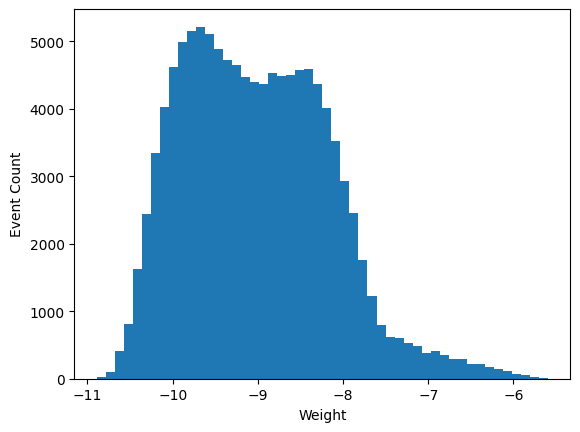

In [477]:
plt.figure()
plt.hist(np.log10(gibuu_df["net_weight"].to_numpy()),bins=50)
plt.xlabel("Weight")
plt.ylabel("Event Count")
plt.show()

In [14]:
f_lowE_overlay = uproot.open("/Users/bbogart/Documents/data/KDAR_MCC9.10/prodgenie_lowE_overlay_run4b_rhc_train.root")["wcpselection"]
f_lowE_overlay_bdt = f_lowE_overlay["T_BDTvars"].pandas.df(bdt_vars+ssm_bdt_vars, flatten=False)
f_lowE_overlay_eval = f_lowE_overlay["T_eval"].pandas.df(eval_vars+eval_mc_vars+["weight_spline","weight_cv"], flatten=False)
f_lowE_overlay_pfeval = f_lowE_overlay["T_PFeval"].pandas.df(pf_eval_vars+pf_eval_mc_vars, flatten=False)
f_lowE_overlay_kine = f_lowE_overlay["T_KINEvars"].pandas.df(kine_vars+kine_mc_vars, flatten=False)
f_lowE_overlay_pot = f_lowE_overlay["T_pot"].pandas.df("pot_tor875good", flatten=False)
lowE_overlay_POT = np.sum(f_lowE_overlay_pot["pot_tor875good"].to_numpy())
lowE_overlay_df = pd.concat([f_lowE_overlay_bdt, f_lowE_overlay_eval, f_lowE_overlay_pfeval, f_lowE_overlay_kine], axis=1, sort=False)

del f_lowE_overlay
del f_lowE_overlay_bdt
del f_lowE_overlay_eval
del f_lowE_overlay_pfeval
del f_lowE_overlay_kine

if not single_run: 
    f_lowE_overlay = uproot.open("/Users/bbogart/Documents/data/KDAR_MCC9.10/prodgenie_lowE_overlay_run1_fhc_train.root")["wcpselection"]
    f_lowE_overlay_bdt = f_lowE_overlay["T_BDTvars"].pandas.df(bdt_vars+ssm_bdt_vars, flatten=False)
    f_lowE_overlay_eval = f_lowE_overlay["T_eval"].pandas.df(eval_vars+eval_mc_vars+["weight_spline","weight_cv"], flatten=False)
    f_lowE_overlay_pfeval = f_lowE_overlay["T_PFeval"].pandas.df(pf_eval_vars+pf_eval_mc_vars, flatten=False)
    f_lowE_overlay_kine = f_lowE_overlay["T_KINEvars"].pandas.df(kine_vars+kine_mc_vars, flatten=False)
    f_lowE_overlay_pot = f_lowE_overlay["T_pot"].pandas.df("pot_tor875good", flatten=False)
    lowE_overlay_POT = np.sum(f_lowE_overlay_pot["pot_tor875good"].to_numpy())
    lowE_overlay_df_2 = pd.concat([f_lowE_overlay_bdt, f_lowE_overlay_eval, f_lowE_overlay_pfeval, f_lowE_overlay_kine], axis=1, sort=False)
    
    del f_lowE_overlay
    del f_lowE_overlay_bdt
    del f_lowE_overlay_eval
    del f_lowE_overlay_pfeval
    del f_lowE_overlay_kine

    lowE_overlay_df = pd.concat([lowE_overlay_df, lowE_overlay_df_2], sort=False)

lowE_overlay_df = kdar.apply_goodruns(lowE_overlay_df)

lowE_overlay_df["net_weight"] = lowE_overlay_df["weight_cv"].to_numpy()*lowE_overlay_df["weight_spline"].to_numpy()
print("All events",lowE_overlay_df.shape[0],np.sum(lowE_overlay_df["net_weight"].to_numpy()))

lowE_overlay_df["rse_num"] = (lowE_overlay_df["run"].to_numpy() * 100_000_000_000
                         + lowE_overlay_df["subrun"].to_numpy() * 1_000_000
                         + lowE_overlay_df["event"].to_numpy())
lowE_overlay_df = lowE_overlay_df.drop_duplicates(subset=['rse_num'])
print("Duplicates Dropped",lowE_overlay_df.shape[0],np.sum(lowE_overlay_df["net_weight"].to_numpy()))

#lowE_overlay_df = lowE_overlay_df.query("truth_vtxInside==1")
#print("In FV",lowE_overlay_df.shape[0],np.sum(lowE_overlay_df["net_weight"].to_numpy()))

lowE_overlay_df["isEXT"] = [0 for i in range(lowE_overlay_df.shape[0])]
lowE_overlay_df["isDirt"] = [0 for i in range(lowE_overlay_df.shape[0])]
lowE_overlay_df["WC_file"] = ["numi_lowE_overlay" for i in range(lowE_overlay_df.shape[0])]
lowE_overlay_df["POTscaled"] = [1 for i in range(lowE_overlay_df.shape[0])]




All events 169399 191002.36
Duplicates Dropped 169399 191002.36


In [15]:
f_overlay = uproot.open("/Users/bbogart/Documents/data/KDAR_MCC9.10/prodgenie_oldflux_overlay_run4b_rhc_train.root")["wcpselection"]
f_overlay_bdt = f_overlay["T_BDTvars"].pandas.df(bdt_vars+ssm_bdt_vars, flatten=False)
f_overlay_eval = f_overlay["T_eval"].pandas.df(eval_vars+eval_mc_vars+["weight_spline","weight_cv"], flatten=False)
f_overlay_pfeval = f_overlay["T_PFeval"].pandas.df(pf_eval_vars+pf_eval_mc_vars, flatten=False)
f_overlay_kine = f_overlay["T_KINEvars"].pandas.df(kine_vars+kine_mc_vars, flatten=False)
f_overlay_pot = f_overlay["T_pot"].pandas.df("pot_tor875good", flatten=False)
overlay_POT = np.sum(f_overlay_pot["pot_tor875good"].to_numpy())
overlay_df = pd.concat([f_overlay_bdt, f_overlay_eval, f_overlay_pfeval, f_overlay_kine], axis=1, sort=False)

del f_overlay
del f_overlay_bdt
del f_overlay_eval
del f_overlay_pfeval
del f_overlay_kine

if not single_run: 
    f_overlay = uproot.open("/Users/bbogart/Documents/data/KDAR_MCC9.10/prodgenie_oldflux_overlay_run1_fhc_train.root")["wcpselection"]
    f_overlay_bdt = f_overlay["T_BDTvars"].pandas.df(bdt_vars+ssm_bdt_vars, flatten=False)
    f_overlay_eval = f_overlay["T_eval"].pandas.df(eval_vars+eval_mc_vars+["weight_spline","weight_cv"], flatten=False)
    f_overlay_pfeval = f_overlay["T_PFeval"].pandas.df(pf_eval_vars+pf_eval_mc_vars, flatten=False)
    f_overlay_kine = f_overlay["T_KINEvars"].pandas.df(kine_vars+kine_mc_vars, flatten=False)
    f_overlay_pot = f_overlay["T_pot"].pandas.df("pot_tor875good", flatten=False)
    overlay_POT = np.sum(f_overlay_pot["pot_tor875good"].to_numpy())
    overlay_df_2 = pd.concat([f_overlay_bdt, f_overlay_eval, f_overlay_pfeval, f_overlay_kine], axis=1, sort=False)
    
    del f_overlay
    del f_overlay_bdt
    del f_overlay_eval
    del f_overlay_pfeval
    del f_overlay_kine

    overlay_df = pd.concat([overlay_df, overlay_df_2], sort=False)

overlay_df = kdar.apply_goodruns(overlay_df)

overlay_df["net_weight"] = overlay_df["weight_cv"].to_numpy()*overlay_df["weight_spline"].to_numpy()
print("All events",overlay_df.shape[0],np.sum(overlay_df["net_weight"].to_numpy()))

overlay_df["rse_num"] = (overlay_df["run"].to_numpy() * 100_000_000_000
                         + overlay_df["subrun"].to_numpy() * 1_000_000
                         + overlay_df["event"].to_numpy())
overlay_df = overlay_df.drop_duplicates(subset=['rse_num'])
print("Duplicates Dropped",overlay_df.shape[0],np.sum(overlay_df["net_weight"].to_numpy()))

#overlay_df = overlay_df.query("truth_vtxInside==1")
#print("In FV",overlay_df.shape[0],np.sum(overlay_df["net_weight"].to_numpy()))

overlay_df["isEXT"] = [0 for i in range(overlay_df.shape[0])]
overlay_df["isDirt"] = [0 for i in range(overlay_df.shape[0])]
overlay_df["WC_file"] = ["numi_overlay" for i in range(overlay_df.shape[0])]
overlay_df["POTscaled"] = [1 for i in range(overlay_df.shape[0])]




All events 557730 428933.7
Duplicates Dropped 557730 428933.7


In [16]:

kdar_overlay_df = kdar.add_ntrue_nu_angle(kdar_overlay_df)
kdar_overlay_df = kdar.add_truth_muon_info(kdar_overlay_df)
kdar_overlay_df = kdar.add_truth_proton_info(kdar_overlay_df)
kdar_overlay_df = kdar.add_truth_ssm_info(kdar_overlay_df)

nuwro_df = kdar.add_ntrue_nu_angle(nuwro_df)
nuwro_df = kdar.add_truth_muon_info(nuwro_df)
nuwro_df = kdar.add_truth_proton_info(nuwro_df)
nuwro_df = kdar.add_truth_ssm_info(nuwro_df)

gibuu_df = kdar.add_ntrue_nu_angle(gibuu_df)
gibuu_df = kdar.add_truth_muon_info(gibuu_df)
gibuu_df = kdar.add_truth_proton_info(gibuu_df)
gibuu_df = kdar.add_truth_ssm_info(gibuu_df)


lowE_overlay_df = kdar.add_ntrue_nu_angle(lowE_overlay_df)
lowE_overlay_df = kdar.add_truth_muon_info(lowE_overlay_df)
lowE_overlay_df = kdar.add_truth_proton_info(lowE_overlay_df)
lowE_overlay_df = kdar.add_truth_ssm_info(lowE_overlay_df)

overlay_df = kdar.add_ntrue_nu_angle(overlay_df)
overlay_df = kdar.add_truth_muon_info(overlay_df)
overlay_df = kdar.add_truth_proton_info(overlay_df)
overlay_df = kdar.add_truth_ssm_info(overlay_df)


 58%|███████████████████▏             | 66377/114161 [00:01<00:00, 54796.12it/s]/Users/bbogart/Documents/analysisCode/kdar_bdt/kdar_functions.py:440: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(cos)
  0%|                                                | 0/169399 [00:00<?, ?it/s]/Users/bbogart/Documents/analysisCode/kdar_bdt/kdar_functions.py:451: RuntimeWarning: invalid value encountered in sqrt
  true_W.append( np.sqrt(938*938 + 2*938*true_nu[-1] - true_Q2[-1]) )
/Users/bbogart/Documents/analysisCode/kdar_bdt/kdar_functions.py:445: RuntimeWarning: invalid value encountered in sqrt
  true_sqrtQ2.append( np.sqrt(2*235.5*(Emu[event]-k[event]*cos)-105.7*105.7 ))
  0%|                                                | 0/557730 [00:00<?, ?it/s]/Users/bbogart/Documents/analysisCode/kdar_bdt/kdar_functions.py:451: RuntimeWarning: invalid value encountered in sqrt
  true_W.append( np.sqrt(938*938 + 2*938*true_nu[-1] - true_Q2[-1]) )
/Users/bbogart/Documents/analysisC

In [17]:

print("Total",lowE_overlay_df.shape[0],np.sum(lowE_overlay_df["net_weight"].to_numpy()))
lowE_overlay_df = kdar.set_is_kdar(lowE_overlay_df)
lowE_overlay_df = lowE_overlay_df.query("is_KDAR==0")
print("No KDARs",lowE_overlay_df.shape[0],np.sum(lowE_overlay_df["net_weight"].to_numpy()))


Total 169399 191002.36
No KDARs 165638 185888.56


In [18]:

print("Total",overlay_df.shape[0],np.sum(overlay_df["net_weight"].to_numpy()))
overlay_df = kdar.set_is_kdar(overlay_df)
overlay_df = overlay_df.query("is_KDAR==0")
print("No KDARs",overlay_df.shape[0],np.sum(overlay_df["net_weight"].to_numpy()))
overlay_df = overlay_df.query("is_KDAR==0")
print("No KDARs",overlay_df.shape[0],np.sum(overlay_df["net_weight"].to_numpy()))
overlay_df = overlay_df.query("not(truth_nuEnergy<400 and truth_isCC==1 and abs(truth_nuPdg)==14)")
print("No lowE",overlay_df.shape[0],np.sum(overlay_df["net_weight"].to_numpy()))


Total 557730 428933.7
No KDARs 557454 428345.0
No KDARs 557454 428345.0
No lowE 532999 405485.1


In [19]:

kdar_overlay_df = kdar.add_ssm_kine_info(kdar_overlay_df)
kdar_overlay_df = kdar.add_ssm_reco_proton_info(kdar_overlay_df)
kdar_overlay_df = kdar.add_reco_proton_muon(kdar_overlay_df)
kdar_overlay_df = kdar.add_ssm_reco_dirt_vars(kdar_overlay_df)

nuwro_df = kdar.add_ssm_kine_info(nuwro_df)
nuwro_df = kdar.add_ssm_reco_proton_info(nuwro_df)
nuwro_df = kdar.add_reco_proton_muon(nuwro_df)
nuwro_df = kdar.add_ssm_reco_dirt_vars(nuwro_df)

gibuu_df = kdar.add_ssm_kine_info(gibuu_df)
gibuu_df = kdar.add_ssm_reco_proton_info(gibuu_df)
gibuu_df = kdar.add_reco_proton_muon(gibuu_df)
gibuu_df = kdar.add_ssm_reco_dirt_vars(gibuu_df)

lowE_overlay_df = kdar.add_ssm_kine_info(lowE_overlay_df)
lowE_overlay_df = kdar.add_ssm_reco_proton_info(lowE_overlay_df)
lowE_overlay_df = kdar.add_reco_proton_muon(lowE_overlay_df)
lowE_overlay_df = kdar.add_ssm_reco_dirt_vars(lowE_overlay_df)

overlay_df = kdar.add_ssm_kine_info(overlay_df)
overlay_df = kdar.add_ssm_reco_proton_info(overlay_df)
overlay_df = kdar.add_reco_proton_muon(overlay_df)
overlay_df = kdar.add_ssm_reco_dirt_vars(overlay_df)



100%|█████████████████████████████████| 84483/84483 [00:00<00:00, 566737.28it/s]
/Users/bbogart/Documents/analysisCode/kdar_bdt/kdar_functions.py:654: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ssm_angle_MuP"] = angle_MuP
/Users/bbogart/Documents/analysisCode/kdar_bdt/kdar_functions.py:655: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ssm_angle_MuP_deg"] = np.array(angle_MuP)*180/3.14
100%|█████████████████████████████████| 84483/84483 [00:00<00:00, 148773.06it/s]
/Users/bbogart/Documents/analysisCode/kdar_bdt/kdar_f

In [414]:
train_vars_nokineprim = [
          "ssm_Nsm",
          "ssm_Nsm_wivtx",
          "ssm_dq_dx_fwd_1",
          "ssm_dq_dx_fwd_2",
          "ssm_dq_dx_fwd_3",
          "ssm_dq_dx_fwd_4",
          "ssm_dq_dx_fwd_5",
          "ssm_dq_dx_bck_1",
          "ssm_dq_dx_bck_2",
          "ssm_dq_dx_bck_3",
          "ssm_dq_dx_bck_4",
          "ssm_dq_dx_bck_5",
          "ssm_d_dq_dx_fwd_12",
          "ssm_d_dq_dx_fwd_23",
          "ssm_d_dq_dx_fwd_34",
          "ssm_d_dq_dx_fwd_45",
          "ssm_d_dq_dx_bck_12",
          "ssm_d_dq_dx_bck_23",
          "ssm_d_dq_dx_bck_34",
          "ssm_d_dq_dx_bck_45",
          "ssm_max_dq_dx_fwd_3",
          "ssm_max_dq_dx_fwd_5",
          "ssm_max_dq_dx_bck_3",
          "ssm_max_dq_dx_bck_5",
          "ssm_max_d_dq_dx_fwd_3",
          "ssm_max_d_dq_dx_fwd_5",
          "ssm_max_d_dq_dx_bck_3",
          "ssm_max_d_dq_dx_bck_5",
          "ssm_medium_dq_dx",
          "ssm_medium_dq_dx_bp",
          
          "ssm_vtx_activity",
          "ssm_pdg",

          "ssm_score_mu_fwd",
          "ssm_score_p_fwd",
          "ssm_score_e_fwd",
          "ssm_score_mu_bck",
          "ssm_score_p_bck",
          "ssm_score_e_bck",
          "ssm_score_mu_fwd_bp",
          "ssm_score_p_fwd_bp",
          "ssm_score_e_fwd_bp",

          "ssm_length_ratio",

          "ssm_n_prim_tracks_1",
          "ssm_n_prim_tracks_3",
          "ssm_n_prim_tracks_5",
          "ssm_n_prim_tracks_8",
          "ssm_n_prim_tracks_11",
          "ssm_n_all_tracks_1",
          "ssm_n_all_tracks_3",
          "ssm_n_all_tracks_5",
          "ssm_n_all_tracks_8",
          "ssm_n_all_tracks_11",
          "ssm_n_daughter_tracks_1",
          "ssm_n_daughter_tracks_3",
          "ssm_n_daughter_tracks_5",
          "ssm_n_daughter_tracks_8",
          "ssm_n_daughter_tracks_11",
          "ssm_n_daughter_all_1",
          "ssm_n_daughter_all_3",
          "ssm_n_daughter_all_5",
          "ssm_n_daughter_all_8",
          "ssm_n_daughter_all_11",
    
          "ssm_prim_track1_pdg",
          "ssm_prim_track1_score_mu_fwd",
          "ssm_prim_track1_score_p_fwd",
          "ssm_prim_track1_score_e_fwd",
          "ssm_prim_track1_score_mu_bck",
          "ssm_prim_track1_score_p_bck",
          "ssm_prim_track1_score_e_bck",
          "ssm_prim_track1_max_dev",
          "ssm_prim_track1_medium_dq_dx",
          "ssm_prim_track1_add_daught_track_counts_1",
          "ssm_prim_track1_add_daught_all_counts_1",
          "ssm_prim_track1_add_daught_track_counts_5",
          "ssm_prim_track1_add_daught_all_counts_5",
          "ssm_prim_track1_add_daught_track_counts_11",
          "ssm_prim_track1_add_daught_all_counts_11",
    
          "ssm_prim_track2_pdg",
          "ssm_prim_track2_score_mu_fwd",
          "ssm_prim_track2_score_p_fwd",
          "ssm_prim_track2_score_e_fwd",
          "ssm_prim_track2_score_mu_bck",
          "ssm_prim_track2_score_p_bck",
          "ssm_prim_track2_score_e_bck",
          "ssm_prim_track2_max_dev",
          "ssm_prim_track2_medium_dq_dx",
          "ssm_prim_track2_add_daught_track_counts_1",
          "ssm_prim_track2_add_daught_all_counts_1",
          "ssm_prim_track2_add_daught_track_counts_5",
          "ssm_prim_track2_add_daught_all_counts_5",
          "ssm_prim_track2_add_daught_track_counts_11",
          "ssm_prim_track2_add_daught_all_counts_11",
    
          "ssm_daught_track1_pdg",
          "ssm_daught_track1_score_mu_fwd",
          "ssm_daught_track1_score_p_fwd",
          "ssm_daught_track1_score_e_fwd",
          "ssm_daught_track1_score_mu_bck",
          "ssm_daught_track1_score_p_bck",
          "ssm_daught_track1_score_e_bck",
          "ssm_daught_track1_length",
          "ssm_daught_track1_direct_length",
          "ssm_daught_track1_length_ratio",
          "ssm_daught_track1_max_dev",
          "ssm_daught_track1_kine_energy_range",
          "ssm_daught_track1_kine_energy_range_mu",
          "ssm_daught_track1_kine_energy_range_p",
          "ssm_daught_track1_kine_energy_range_e",
          "ssm_daught_track1_kine_energy_cal",
          "ssm_daught_track1_medium_dq_dx",
          "ssm_daught_track1_x_dir",
          "ssm_daught_track1_y_dir",
          "ssm_daught_track1_z_dir",
          "ssm_daught_track1_add_daught_track_counts_1",
          "ssm_daught_track1_add_daught_all_counts_1",
          "ssm_daught_track1_add_daught_track_counts_5",
          "ssm_daught_track1_add_daught_all_counts_5",
          "ssm_daught_track1_add_daught_track_counts_11",
          "ssm_daught_track1_add_daught_all_counts_11",
    
          "ssm_daught_track2_pdg",
          "ssm_daught_track2_score_mu_fwd",
          "ssm_daught_track2_score_p_fwd",
          "ssm_daught_track2_score_e_fwd",
          "ssm_daught_track2_score_mu_bck",
          "ssm_daught_track2_score_p_bck",
          "ssm_daught_track2_score_e_bck",
          "ssm_daught_track2_length",
          "ssm_daught_track2_direct_length",
          "ssm_daught_track2_length_ratio",
          "ssm_daught_track2_max_dev",
          "ssm_daught_track2_kine_energy_range",
          "ssm_daught_track2_kine_energy_range_mu",
          "ssm_daught_track2_kine_energy_range_p",
          "ssm_daught_track2_kine_energy_range_e",
          "ssm_daught_track2_kine_energy_cal",
          "ssm_daught_track2_medium_dq_dx",
          "ssm_daught_track2_x_dir",
          "ssm_daught_track2_y_dir",
          "ssm_daught_track2_z_dir",
          "ssm_daught_track2_add_daught_track_counts_1",
          "ssm_daught_track2_add_daught_all_counts_1",
          "ssm_daught_track2_add_daught_track_counts_5",
          "ssm_daught_track2_add_daught_all_counts_5",
          "ssm_daught_track2_add_daught_track_counts_11",
          "ssm_daught_track2_add_daught_all_counts_11",
    
          "ssm_prim_shw1_pdg",
          "ssm_prim_shw1_score_mu_fwd",
          "ssm_prim_shw1_score_p_fwd",
          "ssm_prim_shw1_score_e_fwd",
          "ssm_prim_shw1_score_mu_bck",
          "ssm_prim_shw1_score_p_bck",
          "ssm_prim_shw1_score_e_bck",
          "ssm_prim_shw1_max_dev",
          "ssm_prim_shw1_medium_dq_dx",
          "ssm_prim_shw1_add_daught_track_counts_1",
          "ssm_prim_shw1_add_daught_all_counts_1",
          "ssm_prim_shw1_add_daught_track_counts_5",
          "ssm_prim_shw1_add_daught_all_counts_5",
          "ssm_prim_shw1_add_daught_track_counts_11",
          "ssm_prim_shw1_add_daught_all_counts_11",
    
          "ssm_prim_shw2_pdg",
          "ssm_prim_shw2_score_mu_fwd",
          "ssm_prim_shw2_score_p_fwd",
          "ssm_prim_shw2_score_e_fwd",
          "ssm_prim_shw2_score_mu_bck",
          "ssm_prim_shw2_score_p_bck",
          "ssm_prim_shw2_score_e_bck",
          "ssm_prim_shw2_max_dev",
          "ssm_prim_shw2_medium_dq_dx",
          "ssm_prim_shw2_add_daught_track_counts_1",
          "ssm_prim_shw2_add_daught_all_counts_1",
          "ssm_prim_shw2_add_daught_track_counts_5",
          "ssm_prim_shw2_add_daught_all_counts_5",
          "ssm_prim_shw2_add_daught_track_counts_11",
          "ssm_prim_shw2_add_daught_all_counts_11",
    
          "ssm_daught_shw1_pdg",
          "ssm_daught_shw1_score_mu_fwd",
          "ssm_daught_shw1_score_p_fwd",
          "ssm_daught_shw1_score_e_fwd",
          "ssm_daught_shw1_score_mu_bck",
          "ssm_daught_shw1_score_p_bck",
          "ssm_daught_shw1_score_e_bck",
          "ssm_daught_shw1_length",
          "ssm_daught_shw1_direct_length",
          "ssm_daught_shw1_length_ratio",
          "ssm_daught_shw1_max_dev",
          "ssm_daught_shw1_kine_energy_range",
          "ssm_daught_shw1_kine_energy_range_mu",
          "ssm_daught_shw1_kine_energy_range_p",
          "ssm_daught_shw1_kine_energy_range_e",
          "ssm_daught_shw1_kine_energy_cal",
          'ssm_daught_shw1_kine_energy_best',
          "ssm_daught_shw1_medium_dq_dx",
          "ssm_daught_shw1_x_dir",
          "ssm_daught_shw1_y_dir",
          "ssm_daught_shw1_z_dir",
          "ssm_daught_shw1_add_daught_track_counts_1",
          "ssm_daught_shw1_add_daught_all_counts_1",
          "ssm_daught_shw1_add_daught_track_counts_5",
          "ssm_daught_shw1_add_daught_all_counts_5",
          "ssm_daught_shw1_add_daught_track_counts_11",
          "ssm_daught_shw1_add_daught_all_counts_11",
    
          "ssm_daught_shw2_pdg",
          "ssm_daught_shw2_score_mu_fwd",
          "ssm_daught_shw2_score_p_fwd",
          "ssm_daught_shw2_score_e_fwd",
          "ssm_daught_shw2_score_mu_bck",
          "ssm_daught_shw2_score_p_bck",
          "ssm_daught_shw2_score_e_bck",
          "ssm_daught_shw2_length",
          "ssm_daught_shw2_direct_length",
          "ssm_daught_shw2_length_ratio",
          "ssm_daught_shw2_max_dev",
          "ssm_daught_shw2_kine_energy_range",
          "ssm_daught_shw2_kine_energy_range_mu",
          "ssm_daught_shw2_kine_energy_range_p",
          "ssm_daught_shw2_kine_energy_range_e",
          "ssm_daught_shw2_kine_energy_cal",
          'ssm_daught_shw2_kine_energy_best',
          "ssm_daught_shw2_medium_dq_dx",
          "ssm_daught_shw2_x_dir",
          "ssm_daught_shw2_y_dir",
          "ssm_daught_shw2_z_dir",
          "ssm_daught_shw2_add_daught_track_counts_1",
          "ssm_daught_shw2_add_daught_all_counts_1",
          "ssm_daught_shw2_add_daught_track_counts_5",
          "ssm_daught_shw2_add_daught_all_counts_5",
          "ssm_daught_shw2_add_daught_track_counts_11",
          "ssm_daught_shw2_add_daught_all_counts_11",
    
          "ssm_nu_angle_z",
          "ssm_nu_angle_target",
          "ssm_nu_angle_absorber",
          "ssm_nu_angle_vertical",
          "ssm_prim_nu_angle_z",
          "ssm_prim_nu_angle_target",
          "ssm_prim_nu_angle_absorber",
          "ssm_prim_nu_angle_vertical",
          "ssm_con_nu_angle_z",
          "ssm_con_nu_angle_target",
          "ssm_con_nu_angle_absorber",
          "ssm_con_nu_angle_vertical",
          "ssm_track_angle_z",
          "ssm_track_angle_target",
          "ssm_track_angle_absorber",
          "ssm_track_angle_vertical",

          "ssm_offvtx_length",
          "ssm_offvtx_energy",
          "ssm_n_offvtx_tracks_1",
          "ssm_n_offvtx_tracks_3",
          "ssm_n_offvtx_tracks_5",
          "ssm_n_offvtx_tracks_8",
          "ssm_n_offvtx_tracks_11",
          "ssm_n_offvtx_showers_1",
          "ssm_n_offvtx_showers_3",
          "ssm_n_offvtx_showers_5",
          "ssm_n_offvtx_showers_8",
          "ssm_n_offvtx_showers_11",
          "ssm_offvtx_track1_pdg",
          "ssm_offvtx_track1_score_mu_fwd",
          "ssm_offvtx_track1_score_p_fwd",
          "ssm_offvtx_track1_score_e_fwd",
          "ssm_offvtx_track1_score_mu_bck",
          "ssm_offvtx_track1_score_p_bck",
          "ssm_offvtx_track1_score_e_bck",
          "ssm_offvtx_track1_length",
          "ssm_offvtx_track1_direct_length",
          "ssm_offvtx_track1_max_dev",
          "ssm_offvtx_track1_kine_energy_range",
          "ssm_offvtx_track1_kine_energy_range_mu",
          "ssm_offvtx_track1_kine_energy_range_p",
          "ssm_offvtx_track1_kine_energy_range_e",
          "ssm_offvtx_track1_kine_energy_cal",
          "ssm_offvtx_track1_medium_dq_dx",
          "ssm_offvtx_track1_x_dir",
          "ssm_offvtx_track1_y_dir",
          "ssm_offvtx_track1_z_dir",
          "ssm_offvtx_track1_dist_mainvtx",
          "ssm_offvtx_shw1_pdg_offvtx",
          "ssm_offvtx_shw1_score_mu_fwd",
          "ssm_offvtx_shw1_score_p_fwd",
          "ssm_offvtx_shw1_score_e_fwd",
          "ssm_offvtx_shw1_score_mu_bck",
          "ssm_offvtx_shw1_score_p_bck",
          "ssm_offvtx_shw1_score_e_bck",
          "ssm_offvtx_shw1_length",
          "ssm_offvtx_shw1_direct_length",
          "ssm_offvtx_shw1_max_dev",
          "ssm_offvtx_shw1_kine_energy_best",
          "ssm_offvtx_shw1_kine_energy_range",
          "ssm_offvtx_shw1_kine_energy_range_mu",
          "ssm_offvtx_shw1_kine_energy_range_p",
          "ssm_offvtx_shw1_kine_energy_range_e",
          "ssm_offvtx_shw1_kine_energy_cal",
          "ssm_offvtx_shw1_medium_dq_dx",
          "ssm_offvtx_shw1_x_dir",
          "ssm_offvtx_shw1_y_dir",
          "ssm_offvtx_shw1_z_dir",
          "ssm_offvtx_shw1_dist_mainvtx",

          "ssm_kine_pio_mass",
          "ssm_kine_pio_flag",
          "ssm_kine_pio_vtx_dis",
          "ssm_kine_pio_energy_1",
          "ssm_kine_pio_theta_1",
          "ssm_kine_pio_phi_1",
          "ssm_kine_pio_dis_1",
          "ssm_kine_pio_energy_2",
          "ssm_kine_pio_theta_2",
          "ssm_kine_pio_phi_2",
          "ssm_kine_pio_dis_2",
          "ssm_kine_pio_angle",
    
          "ssm_cosmict_flag_1", 
          "ssm_cosmict_flag_2",  
          "ssm_cosmict_flag_3",  
          "ssm_cosmict_flag_4",  
          "ssm_cosmict_flag_5", 
          "ssm_cosmict_flag_6", 
          "ssm_cosmict_flag_7", 
          "ssm_cosmict_flag_8",  
          "ssm_cosmict_flag_9"
]


In [467]:

temp_kdar_df = kdar_overlay_df.query(presel_query).reset_index()
temp_nuwro_df = nuwro_df.query(presel_query).reset_index()
temp_gibuu_df = gibuu_df.query(presel_query).reset_index()
temp_lowE_df = lowE_overlay_df.query(presel_query).reset_index()
temp_overlay_df = overlay_df.query(presel_query).reset_index()

train_kdar_df = temp_kdar_df.query("event%10<4").reset_index()
train_nuwro_df = temp_nuwro_df.query("event%10<5").reset_index()
train_gibuu_df = temp_gibuu_df.query("event%10<6").reset_index()
train_gibuu_df = temp_gibuu_df.query("event%10<5").reset_index()
train_lowE_df = temp_lowE_df.query("event%10<7").reset_index()
train_overlay_df = temp_overlay_df.query("event%10<7").reset_index()

test_kdar_df = temp_kdar_df.drop(train_kdar_df.index)
test_nuwro_df = temp_nuwro_df.drop(train_nuwro_df.index)
test_gibuu_df = temp_gibuu_df.drop(train_gibuu_df.index)
test_lowE_df = temp_lowE_df.drop(train_lowE_df.index)
test_overlay_df = temp_overlay_df.drop(train_overlay_df.index)

#train_gibuu_df = train_gibuu_df.query("log10(net_weight)>-7.5").reset_index()
print("GiBUU",train_gibuu_df.shape[0])
train_gibuu_df = train_gibuu_df.sample(n=3000,weights=train_gibuu_df["net_weight"].to_numpy()).reset_index()


GiBUU 22192


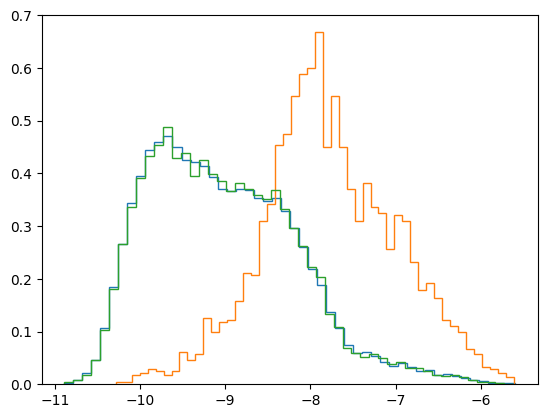

In [468]:
plt.figure()
plt.hist(np.log10(gibuu_df.query(presel_query)["net_weight"].to_numpy()),bins=50,histtype='step',density=True)
plt.hist(np.log10(train_gibuu_df["net_weight"].to_numpy()),bins=50,histtype='step',density=True)
plt.hist(np.log10(test_gibuu_df["net_weight"].to_numpy()),bins=50,histtype='step',density=True)
plt.show()

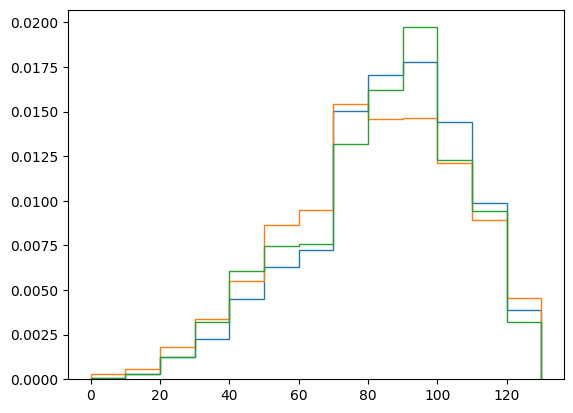

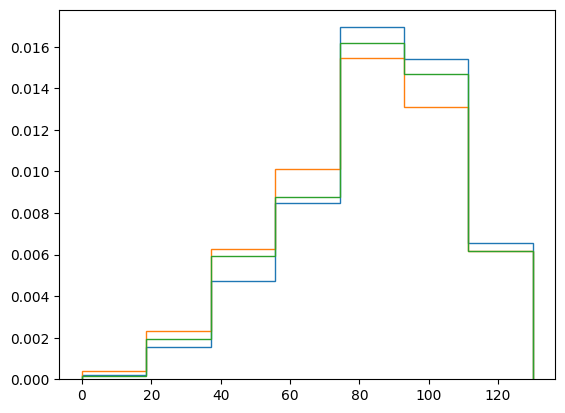

In [469]:
plt.figure()
plt.hist(gibuu_df.query(presel_query)["truth_Emuon"].to_numpy(),weights=gibuu_df.query(presel_query)["net_weight"].to_numpy(),bins=13,range=(0,130),histtype='step',density=True)
plt.hist(train_gibuu_df["truth_Emuon"].to_numpy(),bins=13,range=(0,130),histtype='step',density=True)
plt.hist(test_gibuu_df["truth_Emuon"].to_numpy(),weights=test_gibuu_df["net_weight"].to_numpy(),bins=13,range=(0,130),histtype='step',density=True)
plt.show()

plt.figure()
plt.hist(gibuu_df.query(presel_query)["truth_Emuon"].to_numpy(),weights=gibuu_df.query(presel_query)["net_weight"].to_numpy(),bins=7,range=(0,130),histtype='step',density=True)
plt.hist(train_gibuu_df["truth_Emuon"].to_numpy(),bins=7,range=(0,130),histtype='step',density=True)
plt.hist(test_gibuu_df["truth_Emuon"].to_numpy(),weights=test_gibuu_df["net_weight"].to_numpy(),bins=7,range=(0,130),histtype='step',density=True)
plt.show()

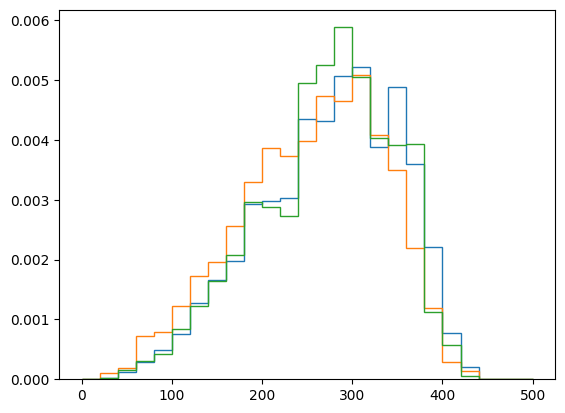

In [470]:
plt.figure()
plt.hist(gibuu_df.query(presel_query)["true_q"].to_numpy(),weights=gibuu_df.query(presel_query)["net_weight"].to_numpy(),bins=25,range=(0,500),histtype='step',density=True)
plt.hist(train_gibuu_df["true_q"].to_numpy(),bins=25,range=(0,500),histtype='step',density=True)
plt.hist(test_gibuu_df["true_q"].to_numpy(),weights=test_gibuu_df["net_weight"].to_numpy(),bins=25,range=(0,500),histtype='step',density=True)
plt.show()

GiBUU 68451


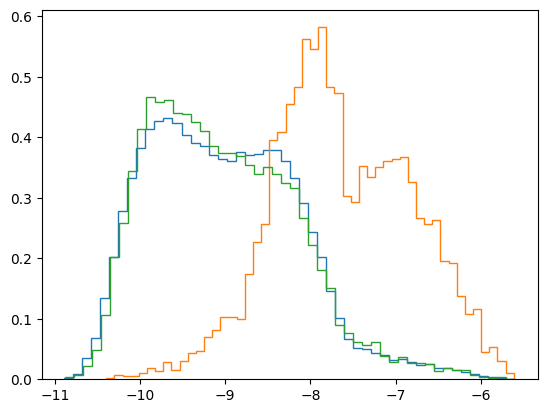

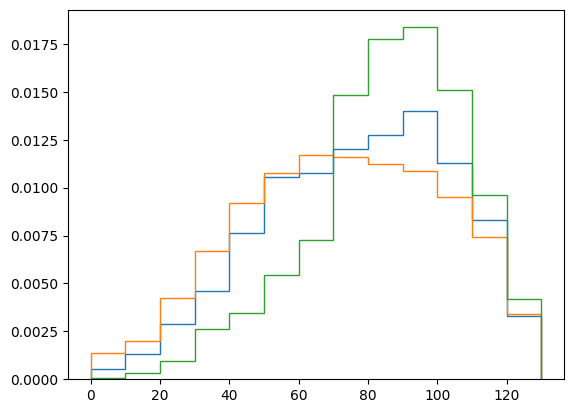

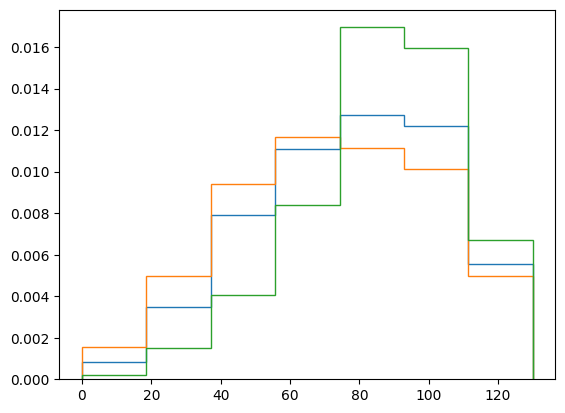

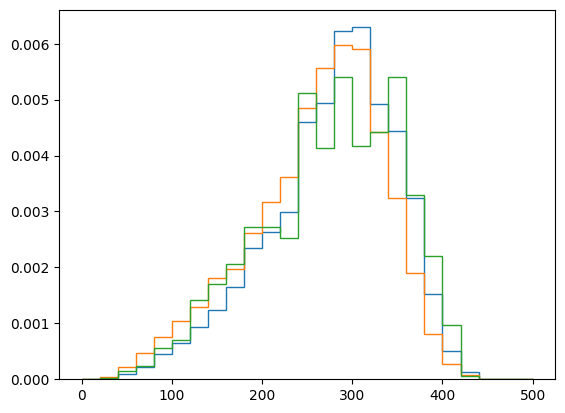

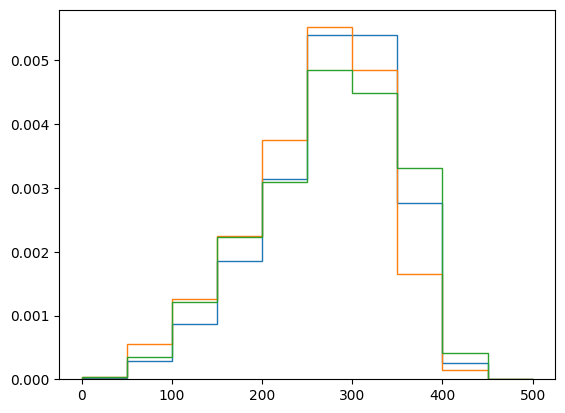

In [474]:
train_kdar_df = kdar_overlay_df.query("event%10<4").reset_index()
train_nuwro_df = nuwro_df.query("event%10<5").reset_index()
train_gibuu_df = gibuu_df.query("event%10<6").reset_index()
train_lowE_df = lowE_overlay_df.query("event%10<7").reset_index()
train_overlay_df = overlay_df.query("event%10<7").reset_index()

print("GiBUU",train_gibuu_df.shape[0])
train_gibuu_df = train_gibuu_df.sample(n=6000,weights=train_gibuu_df["net_weight"].to_numpy()).reset_index()

plt.figure()
plt.hist(np.log10(gibuu_df["net_weight"].to_numpy()),bins=50,histtype='step',density=True)
plt.hist(np.log10(train_gibuu_df["net_weight"].to_numpy()),bins=50,histtype='step',density=True)
plt.hist(np.log10(test_gibuu_df["net_weight"].to_numpy()),bins=50,histtype='step',density=True)
plt.show()

plt.figure()
plt.hist(gibuu_df["truth_Emuon"].to_numpy(),weights=gibuu_df["net_weight"].to_numpy(),bins=13,range=(0,130),histtype='step',density=True)
plt.hist(train_gibuu_df["truth_Emuon"].to_numpy(),bins=13,range=(0,130),histtype='step',density=True)
plt.hist(test_gibuu_df["truth_Emuon"].to_numpy(),weights=test_gibuu_df["net_weight"].to_numpy(),bins=13,range=(0,130),histtype='step',density=True)
plt.show()

plt.figure()
plt.hist(gibuu_df["truth_Emuon"].to_numpy(),weights=gibuu_df["net_weight"].to_numpy(),bins=7,range=(0,130),histtype='step',density=True)
plt.hist(train_gibuu_df["truth_Emuon"].to_numpy(),bins=7,range=(0,130),histtype='step',density=True)
plt.hist(test_gibuu_df["truth_Emuon"].to_numpy(),weights=test_gibuu_df["net_weight"].to_numpy(),bins=7,range=(0,130),histtype='step',density=True)
plt.show()

plt.figure()
plt.hist(gibuu_df["true_q"].to_numpy(),weights=gibuu_df["net_weight"].to_numpy(),bins=25,range=(0,500),histtype='step',density=True)
plt.hist(train_gibuu_df["true_q"].to_numpy(),bins=25,range=(0,500),histtype='step',density=True)
plt.hist(test_gibuu_df["true_q"].to_numpy(),weights=test_gibuu_df["net_weight"].to_numpy(),bins=25,range=(0,500),histtype='step',density=True)
plt.show()

plt.figure()
plt.hist(gibuu_df["true_q"].to_numpy(),weights=gibuu_df["net_weight"].to_numpy(),bins=10,range=(0,500),histtype='step',density=True)
plt.hist(train_gibuu_df["true_q"].to_numpy(),bins=10,range=(0,500),histtype='step',density=True)
plt.hist(test_gibuu_df["true_q"].to_numpy(),weights=test_gibuu_df["net_weight"].to_numpy(),bins=10,range=(0,500),histtype='step',density=True)
plt.show()

test_kdar_df = kdar_overlay_df.query("event%10>=4").reset_index()
test_nuwro_df = nuwro_df.query("event%10>=5").reset_index()
test_gibuu_df = gibuu_df.query("event%10>=6").reset_index()
test_lowE_df = lowE_overlay_df.query("event%10>=7").reset_index()
test_overlay_df = overlay_df.query("event%10>=7").reset_index()

train_kdar_df = train_kdar_df.query(presel_query).reset_index()
train_nuwro_df = train_nuwro_df.query(presel_query).reset_index()
train_gibuu_df = train_gibuu_df.query(presel_query).reset_index()
train_lowE_df = train_lowE_df.query(presel_query).reset_index()
train_overlay_df = train_overlay_df.query(presel_query).reset_index()

test_kdar_df = test_kdar_df.query(presel_query).reset_index()
test_nuwro_df = test_nuwro_df.query(presel_query).reset_index()
test_gibuu_df = test_gibuu_df.query(presel_query).reset_index()
test_lowE_df = test_lowE_df.query(presel_query).reset_index()
test_overlay_df = test_overlay_df.query(presel_query).reset_index()



In [475]:
print("GENIE",train_kdar_df.shape[0])
print("NuWro",train_nuwro_df.shape[0])
print("GiBUU",train_gibuu_df.shape[0])
print("lowE",train_lowE_df.shape[0])
print("hiE",train_overlay_df.shape[0])

GENIE 12289
NuWro 5638
GiBUU 2353
lowE 10170
hiE 3415


In [418]:

train_vars = []
train_vars = train_vars_nokineprim.copy()#+['stm_clusterlength']

fraction = 0.6
num_vars = 500
n = 200
num_classes=2

train_df  = pd.concat([train_kdar_df, train_lowE_df], sort=False)
test_df  = pd.concat([test_kdar_df, test_lowE_df], sort=False)

# Extract feature and target arrays
X_test, y_test = test_df.fillna(0)[train_vars].copy(), test_df[['is_KDAR']].copy()
X_train, y_train = train_df.fillna(0)[train_vars].copy(), train_df[['is_KDAR']].copy()
    
presel_model_lowE_genie_only = SelectKBest(f_classif, k=num_vars).fit(X_train, y_train)
new_names_lowE_genie_only = list(presel_model_lowE_genie_only.get_feature_names_out())

X_train = presel_model_lowE_genie_only.transform(X_train)
X_test = presel_model_lowE_genie_only.transform(X_test)

# Define the hyperparameter distributions
param_dist = {
    'max_depth': stats.randint(3, 10),
    'eta': stats.uniform(0, 1),
    'gamma':stats.uniform(2, 30),
    'lambda':stats.uniform(0, 10),
    'alpha':stats.uniform(0, 10),
    'min_child_weight':stats.uniform(0, 10),
     'colsample_bytree': stats.uniform(0.5, 0.5),
     'colsample_bylevel': stats.uniform(0.5, 0.5)
}

# Create the XGBoost model object
xgb_model_lowE_genie_only = xgb.XGBClassifier()

# Create the RandomizedSearchCV object
random_search_lowE_genie_only = RandomizedSearchCV(xgb_model_lowE_genie_only, param_distributions=param_dist, n_iter=100, cv=5, scoring='roc_auc')

# Fit the RandomizedSearchCV object to the training data
random_search_lowE_genie_only.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search_lowE_genie_only.best_params_)
print("Best score: ", random_search_lowE_genie_only.best_score_)

new_params_lowE_genie_only = random_search_lowE_genie_only.best_params_
new_params_lowE_genie_only["objective"] =  "binary:logistic"
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True,feature_names=new_names_lowE_genie_only)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True,feature_names=new_names_lowE_genie_only)
evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]
evals_result_lowE_genie_only = {}
model_lowE_genie_only = xgb.train(
   params=random_search_lowE_genie_only.best_params_,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=200,
    evals_result=evals_result_lowE_genie_only
)


/Users/bbogart/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=500 is greater than n_features=318. All the features will be returned.
  warnings.warn(
/Users/bbogart/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bbogart/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [313 314 316 317] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/bbogart/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Best set of hyperparameters:  {'alpha': 5.855580618119413, 'colsample_bylevel': 0.7764387094158955, 'colsample_bytree': 0.536474731308602, 'eta': 0.2419077363598926, 'gamma': 2.4557712122853297, 'lambda': 7.8560971311935965, 'max_depth': 8, 'min_child_weight': 0.7221150740281823}
Best score:  0.7545367442590245
[0]	validation-logloss:0.61680	train-logloss:0.66290
[199]	validation-logloss:0.48217	train-logloss:0.46890


In [419]:

assign_bdt_vars(model_lowE_genie_only,new_names_lowE_genie_only,"kdar_score_lowE_genie_only")


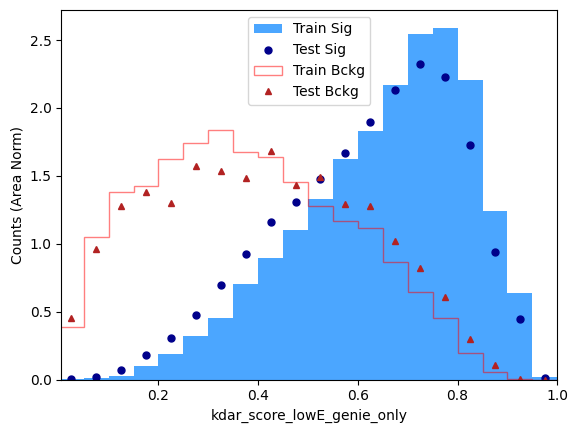

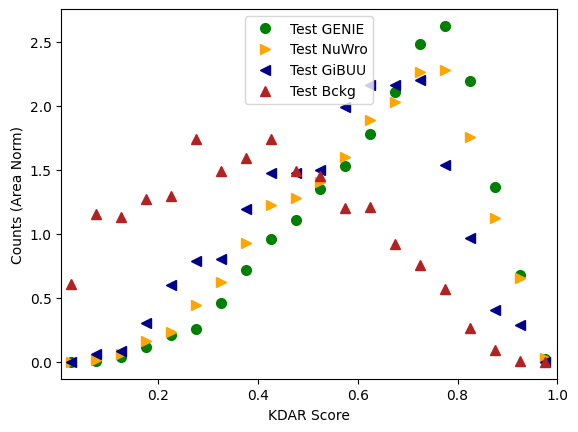

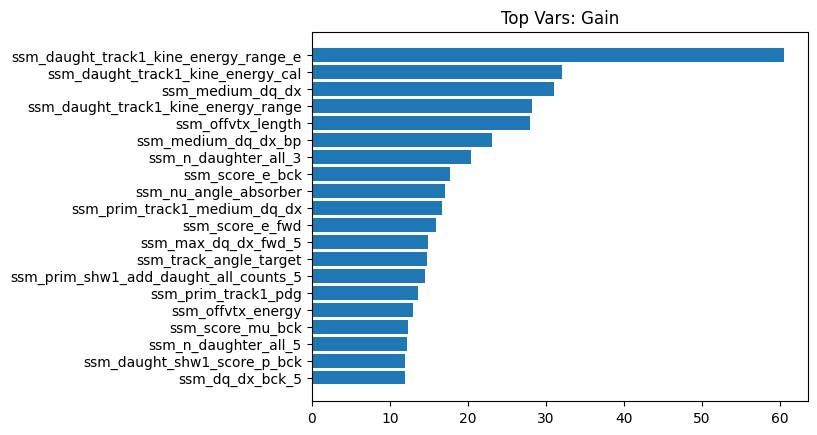

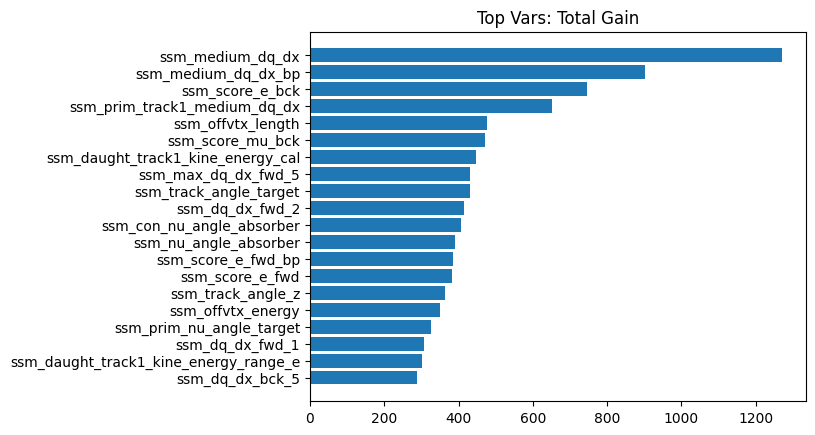

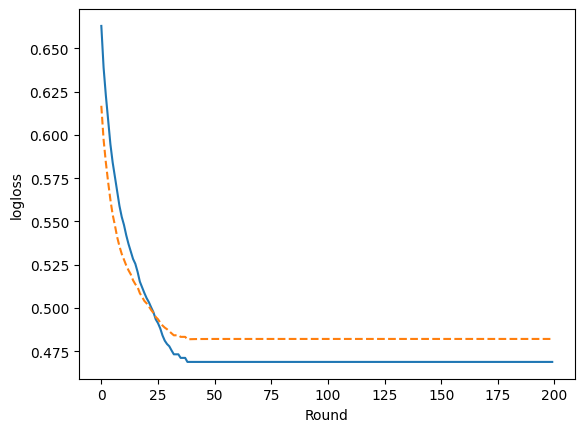

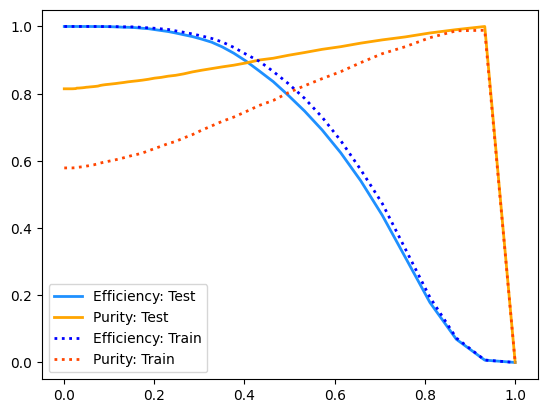

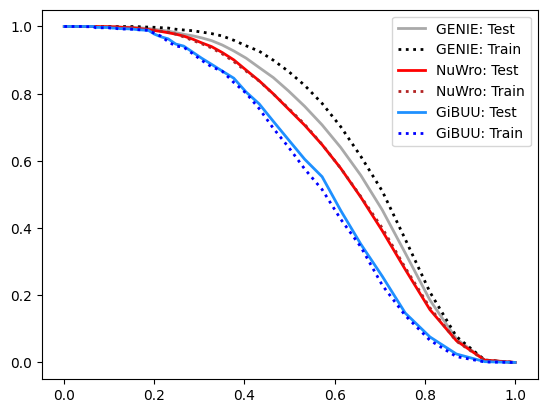

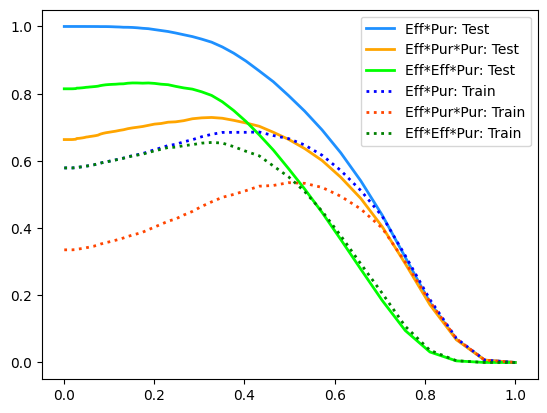

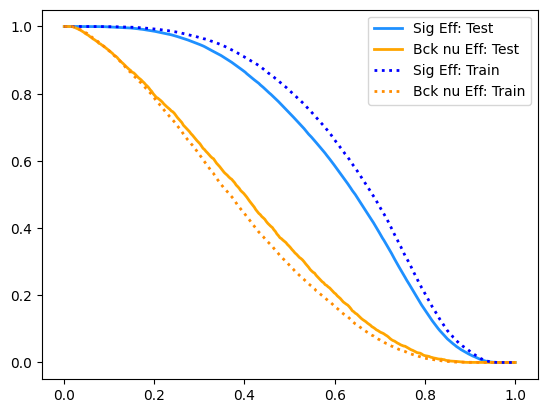

In [426]:

evaluate_BDT(model_lowE_genie_only,"kdar_score_lowE_genie_only",evals_result_lowE_genie_only,max_items=20)


In [427]:

this_cutvalue = 0.75
this_bdt_var = "kdar_score_lowE_genie_only"

print("old gen sel lowE passrate:",round(np.sum(lowE_overlay_df.query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("gen sel lowE passrate:",round(np.sum(lowE_overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("pre sel lowE passrate:",round(np.sum(lowE_overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("Train BDT lowE passrate:",round(np.sum(train_lowE_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(train_lowE_df["net_weight"].to_numpy())*np.sum(lowE_overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("Test BDT lowE passrate:",round(np.sum(test_lowE_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(test_lowE_df["net_weight"].to_numpy())*np.sum(lowE_overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))

print("")
print("old gen sel hiE passrate:",round(np.sum(overlay_df.query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("gen sel hiE passrate:",round(np.sum(overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("pre sel hiE passrate:",round(np.sum(overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("Train BDT hiE passrate:",round(np.sum(train_overlay_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(train_overlay_df["net_weight"].to_numpy())*np.sum(overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),4))
print("Test BDT hiE passrate:",round(np.sum(test_overlay_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(test_overlay_df["net_weight"].to_numpy())*np.sum(overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),4))



old gen sel lowE passrate: 0.235
gen sel lowE passrate: 0.263
pre sel lowE passrate: 0.094
Train BDT lowE passrate: 0.003
Test BDT lowE passrate: 0.004

old gen sel hiE passrate: 0.309
gen sel hiE passrate: 0.317
pre sel hiE passrate: 0.01
Train BDT hiE passrate: 0.0002
Test BDT hiE passrate: 0.0002


In [428]:

print("old gen sel lowE passrate:",round(np.sum(lowE_overlay_df.query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("gen sel lowE passrate:",round(np.sum(lowE_overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("pre sel lowE rel passrate:",round(np.sum(lowE_overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(lowE_overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy()),3))
print("Train BDT lowE rel passrate:",round(np.sum(train_lowE_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(train_lowE_df["net_weight"].to_numpy()),3))
print("Test BDT lowE rel passrate:",round(np.sum(test_lowE_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(test_lowE_df["net_weight"].to_numpy()),3))

print("")
print("old gen sel hiE passrate:",round(np.sum(overlay_df.query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("gen sel hiE passrate:",round(np.sum(overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("pre sel hiE rel passrate:",round(np.sum(overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy()),3))
print("Train BDT hiE rel passrate:",round(np.sum(train_overlay_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(train_overlay_df["net_weight"].to_numpy()),3))
print("Test BDT hiE rel passrate:",round(np.sum(test_overlay_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(test_overlay_df["net_weight"].to_numpy()),3))



old gen sel lowE passrate: 0.235
gen sel lowE passrate: 0.263
pre sel lowE rel passrate: 0.356
Train BDT lowE rel passrate: 0.032
Test BDT lowE rel passrate: 0.047

old gen sel hiE passrate: 0.309
gen sel hiE passrate: 0.317
pre sel hiE rel passrate: 0.031
Train BDT hiE rel passrate: 0.024
Test BDT hiE rel passrate: 0.025


0.22674081772565843


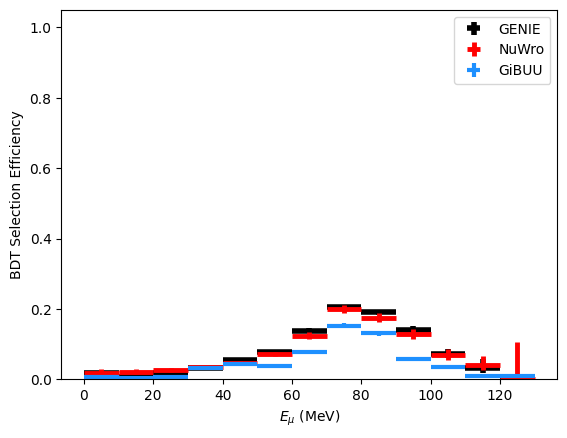

0.15732121765613558


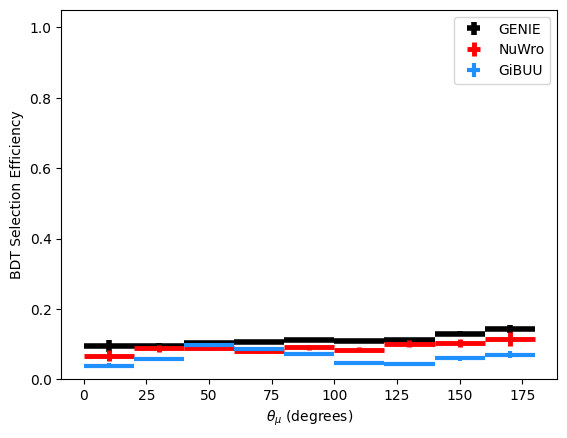

0.18099558607160376


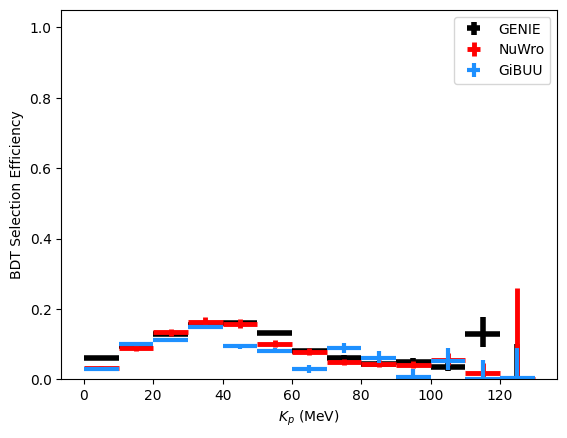

0.16094903349876405


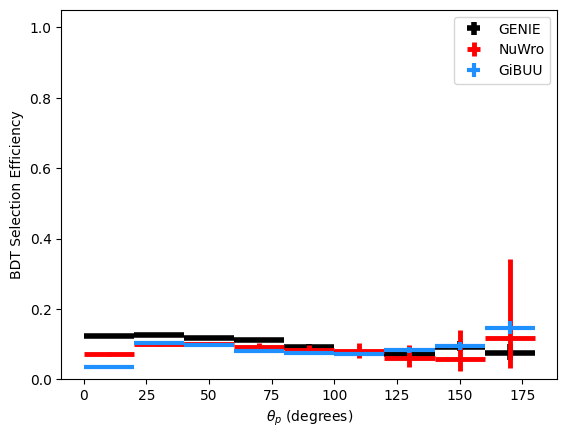

0.1714466467499733


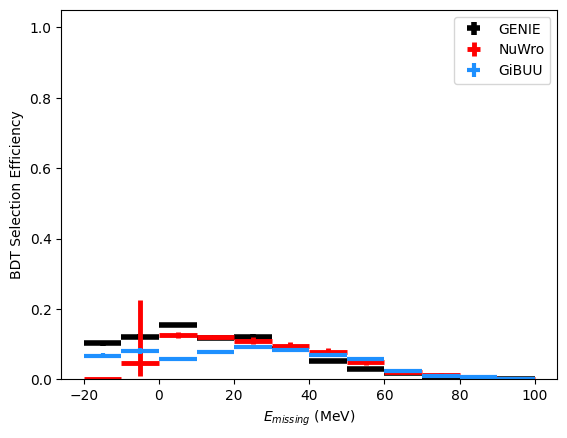

0.24105946719646457


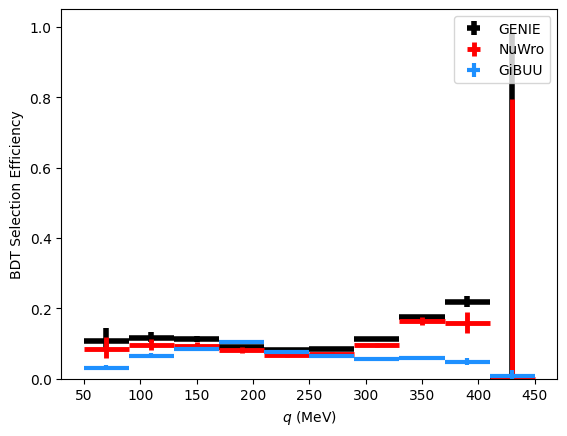

0.23959741443395616


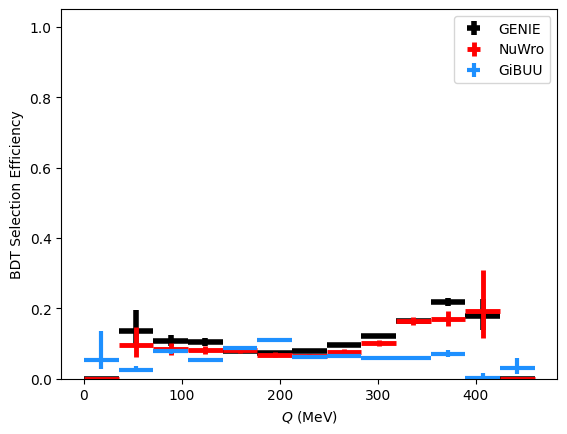

0.22568608820438388


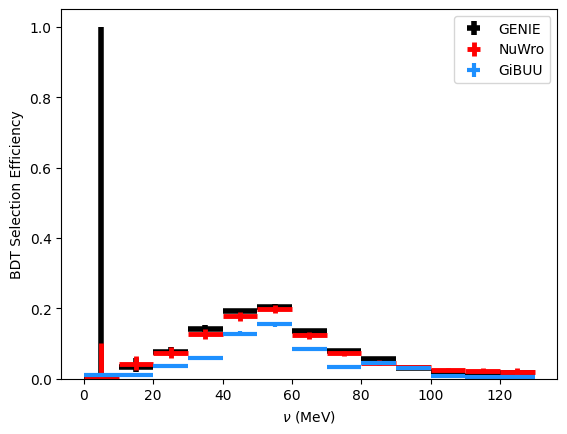

0.2629707038402558


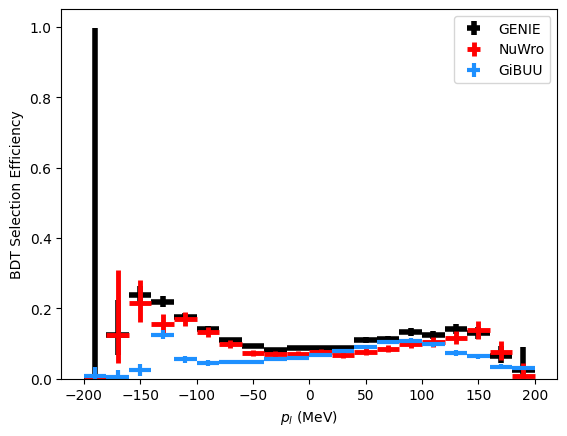

0.21008185446262362


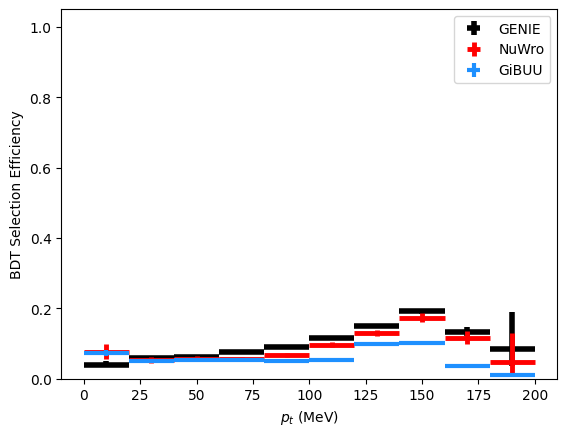

0.17785494774580005


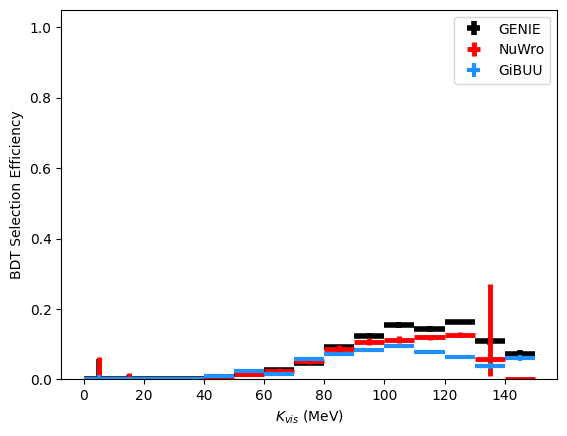

0.12303427159786226


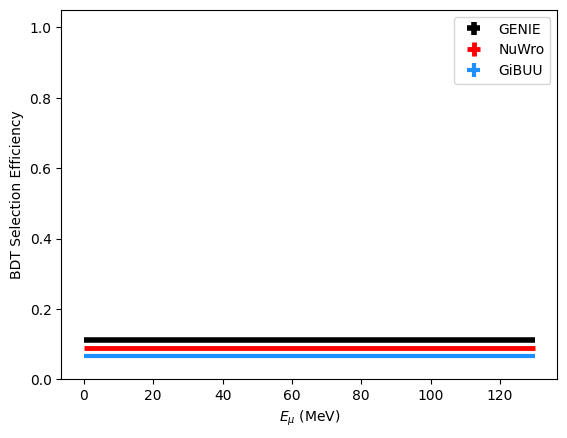

0.4781221836805344


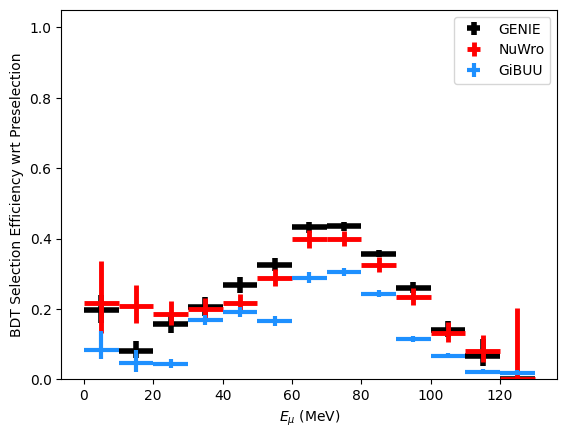

0.501998046040535


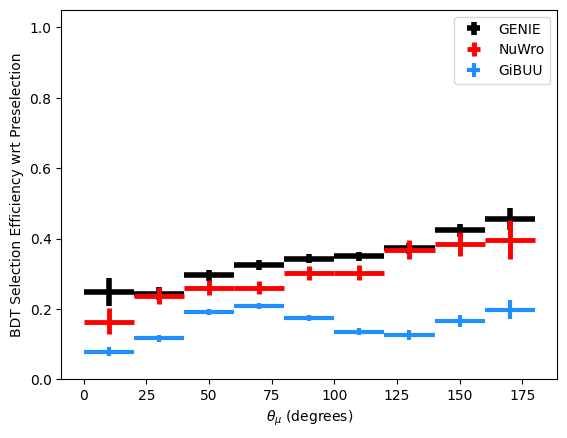

0.8068859338760377


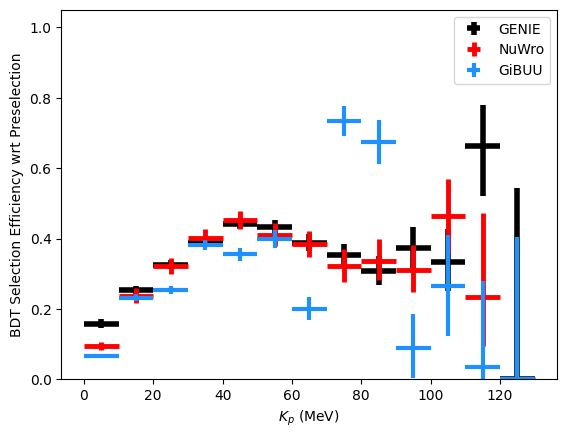

0.45434309542179113


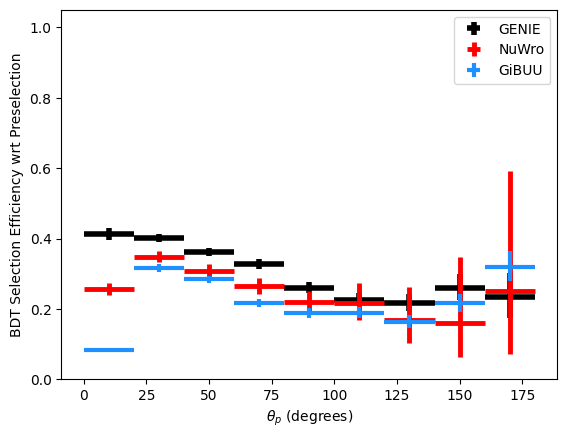

0.4743277341127396


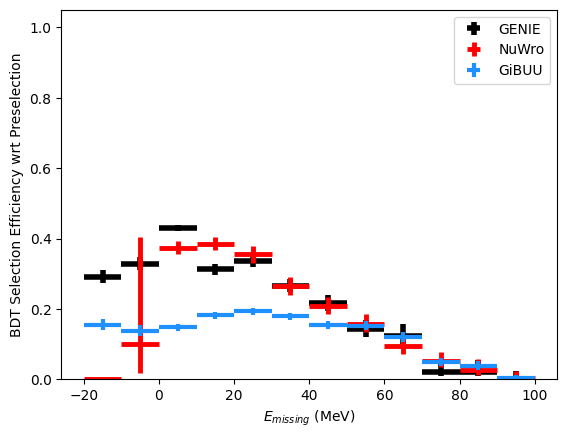

0.4699086129665375


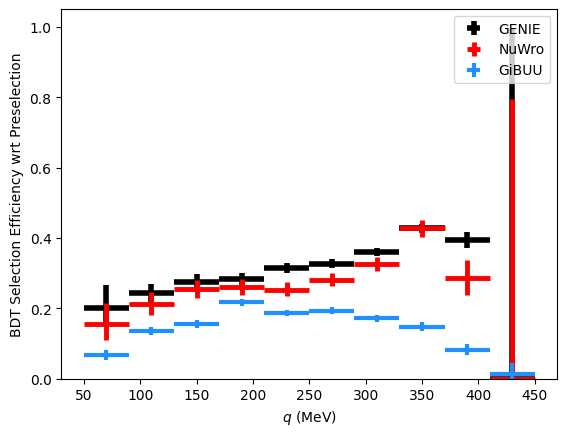

0.4787323943661972


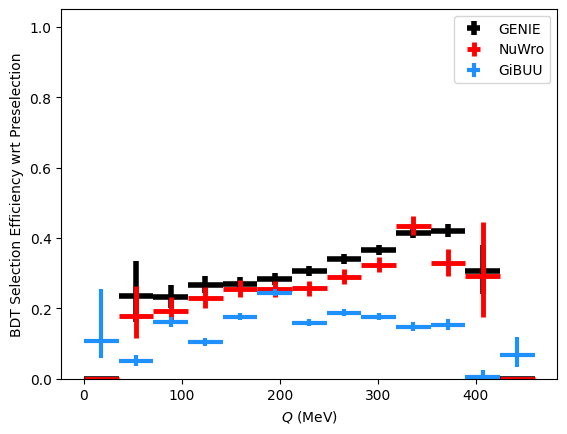

0.47926013171672827


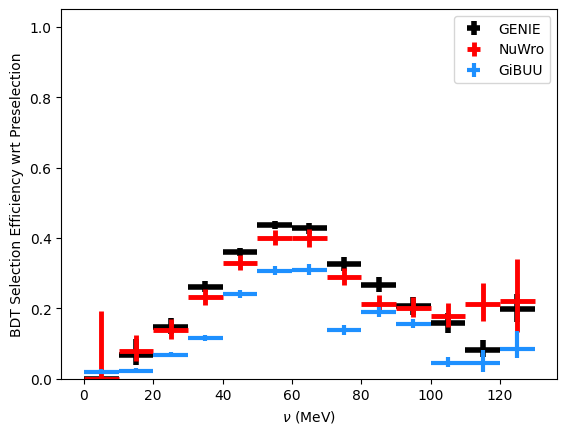

0.5031064569950104


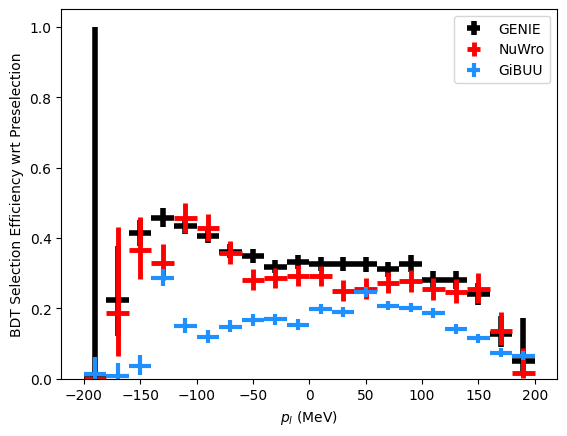

0.41431759595870976


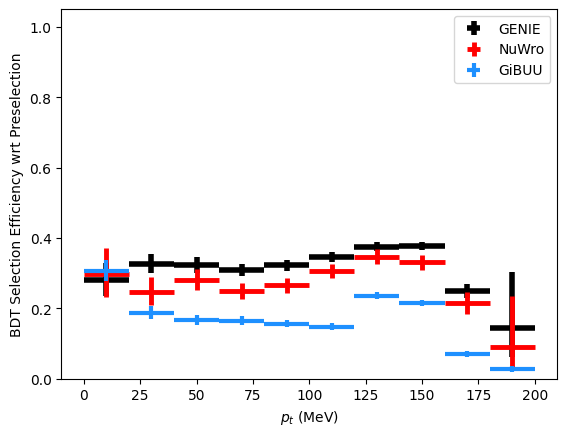

0.4855670362710953


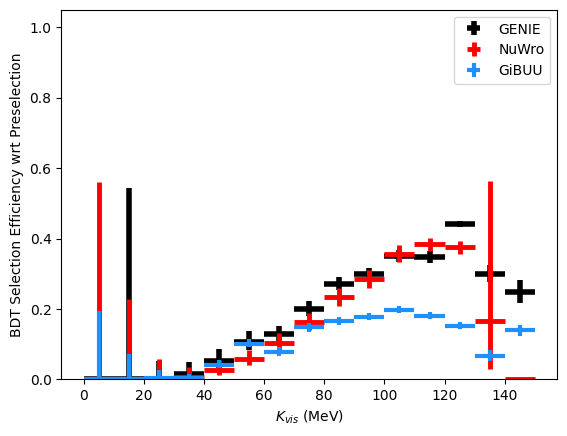

0.37778225839138035


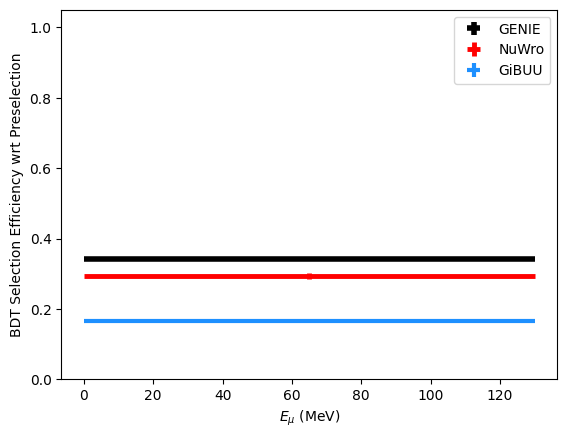

In [429]:

plot_efficiency_detailed(this_bdt_var,this_cutvalue)
plot_efficiency_detailed(this_bdt_var,this_cutvalue,wrt_preset=True)


In [430]:

if(0): save_bdt(model_lowE_genie_only,"model_lowE_genie_only","_1")


In [431]:

train_vars = []
train_vars = train_vars_nokineprim.copy()#+['stm_clusterlength']

fraction = 0.6
num_vars = 500
n = 200
num_classes=2

train_df  = pd.concat([train_kdar_df,train_nuwro_df,train_gibuu_df, train_lowE_df], sort=False)
test_df  = pd.concat([test_kdar_df,test_nuwro_df,test_gibuu_df, test_lowE_df], sort=False)

# Extract feature and target arrays
X_test, y_test = test_df.fillna(0)[train_vars].copy(), test_df[['is_KDAR']].copy()
X_train, y_train = train_df.fillna(0)[train_vars].copy(), train_df[['is_KDAR']].copy()
    
presel_model_lowE = SelectKBest(f_classif, k=num_vars).fit(X_train, y_train)
new_names_lowE = list(presel_model_lowE.get_feature_names_out())

X_train = presel_model_lowE.transform(X_train)
X_test = presel_model_lowE.transform(X_test)

# Define the hyperparameter distributions
param_dist = {
    'max_depth': stats.randint(3, 10),
    'eta': stats.uniform(0, 1),
    'gamma':stats.uniform(2, 30),
    'lambda':stats.uniform(0, 10),
    'alpha':stats.uniform(0, 10),
    'min_child_weight':stats.uniform(0, 10),
     'colsample_bytree': stats.uniform(0.5, 0.5),
     'colsample_bylevel': stats.uniform(0.5, 0.5)
}

# Create the XGBoost model object
xgb_model_lowE = xgb.XGBClassifier()

# Create the RandomizedSearchCV object
random_search_lowE = RandomizedSearchCV(xgb_model_lowE, param_distributions=param_dist, n_iter=100, cv=5, scoring='roc_auc')

# Fit the RandomizedSearchCV object to the training data
random_search_lowE.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search_lowE.best_params_)
print("Best score: ", random_search_lowE.best_score_)

new_params_lowE = random_search_lowE.best_params_
new_params_lowE["objective"] =  "binary:logistic"
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True,feature_names=new_names_lowE)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True,feature_names=new_names_lowE)
evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]
evals_result_lowE = {}
model_lowE = xgb.train(
   params=random_search_lowE.best_params_,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=200,
    evals_result=evals_result_lowE
)


/Users/bbogart/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=500 is greater than n_features=318. All the features will be returned.
  warnings.warn(
/Users/bbogart/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bbogart/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [313 314 316 317] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/bbogart/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Best set of hyperparameters:  {'alpha': 9.030820505668125, 'colsample_bylevel': 0.9836922751190675, 'colsample_bytree': 0.6816501424782407, 'eta': 0.04141708801161437, 'gamma': 2.519401671384736, 'lambda': 1.8316155017901647, 'max_depth': 9, 'min_child_weight': 7.959095069800879}
Best score:  0.7476519597941471
[0]	validation-logloss:0.45979	train-logloss:0.62626
[199]	validation-logloss:0.35980	train-logloss:0.44559


In [432]:

assign_bdt_vars(model_lowE,new_names_lowE,"kdar_score_lowE")


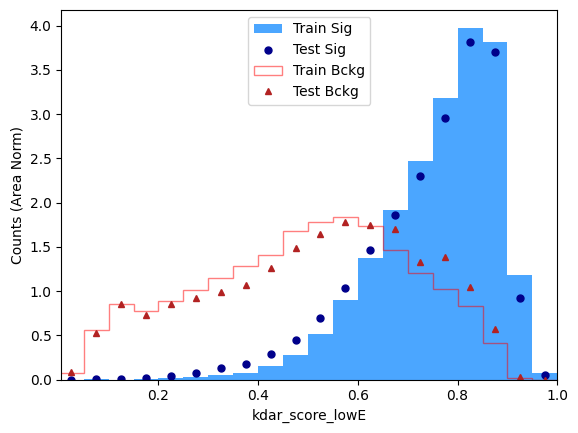

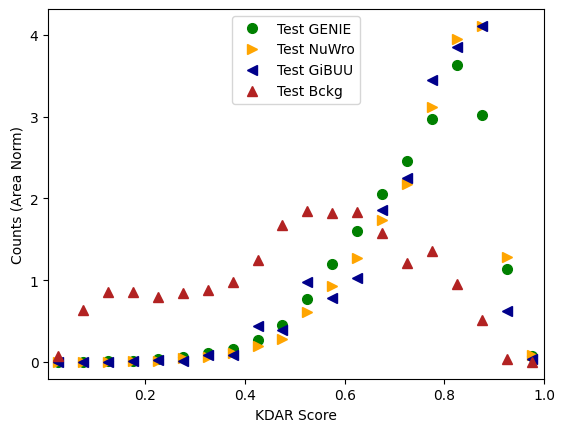

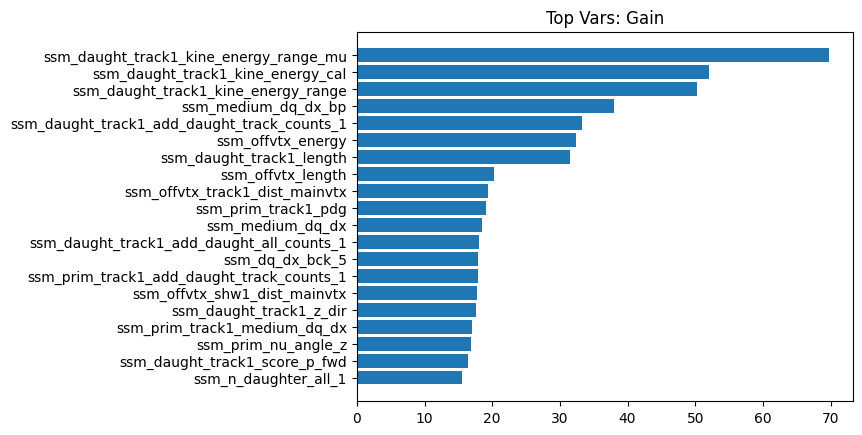

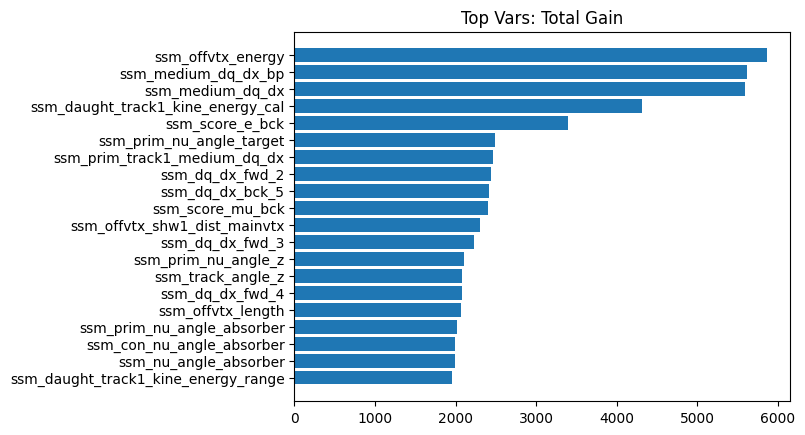

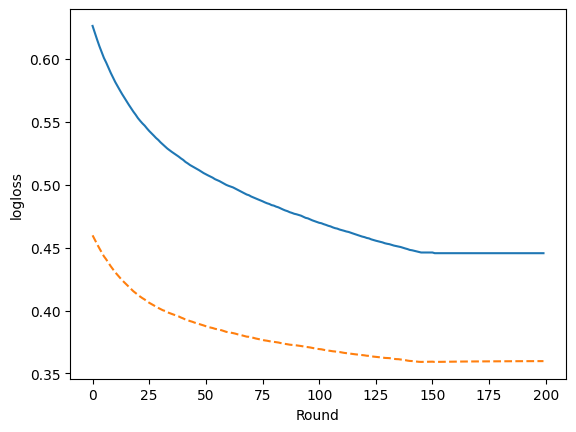

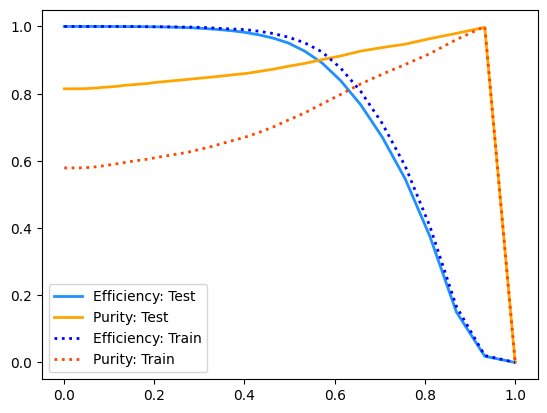

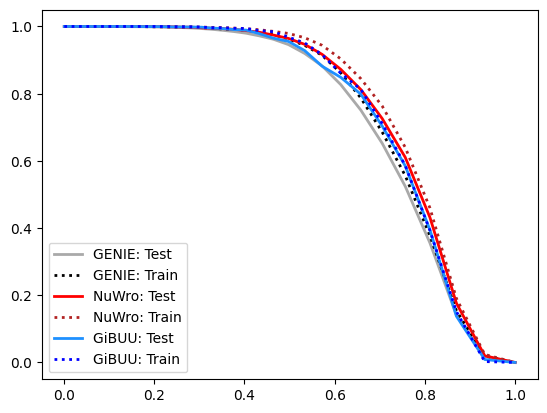

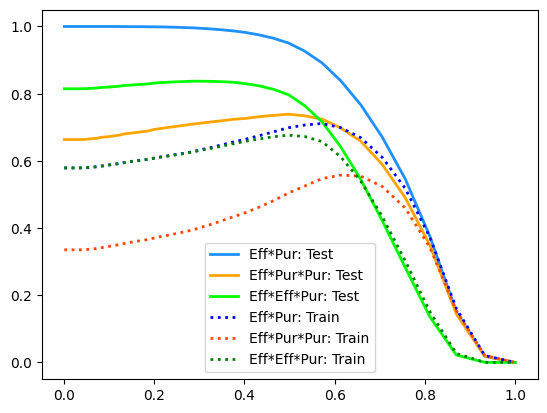

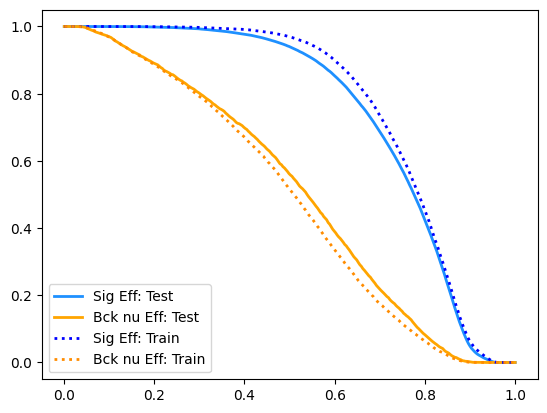

In [434]:

evaluate_BDT(model_lowE,"kdar_score_lowE",evals_result_lowE,max_items=20)


In [435]:

this_cutvalue = 0.8
this_bdt_var = "kdar_score_lowE"

print("old gen sel lowE passrate:",round(np.sum(lowE_overlay_df.query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("gen sel lowE passrate:",round(np.sum(lowE_overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("pre sel lowE passrate:",round(np.sum(lowE_overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("Train BDT lowE passrate:",round(np.sum(train_lowE_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(train_lowE_df["net_weight"].to_numpy())*np.sum(lowE_overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("Test BDT lowE passrate:",round(np.sum(test_lowE_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(test_lowE_df["net_weight"].to_numpy())*np.sum(lowE_overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))

print("")
print("old gen sel hiE passrate:",round(np.sum(overlay_df.query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("gen sel hiE passrate:",round(np.sum(overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("pre sel hiE passrate:",round(np.sum(overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("Train BDT hiE passrate:",round(np.sum(train_overlay_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(train_overlay_df["net_weight"].to_numpy())*np.sum(overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),4))
print("Test BDT hiE passrate:",round(np.sum(test_overlay_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(test_overlay_df["net_weight"].to_numpy())*np.sum(overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),4))


old gen sel lowE passrate: 0.235
gen sel lowE passrate: 0.263
pre sel lowE passrate: 0.094
Train BDT lowE passrate: 0.006
Test BDT lowE passrate: 0.007

old gen sel hiE passrate: 0.309
gen sel hiE passrate: 0.317
pre sel hiE passrate: 0.01
Train BDT hiE passrate: 0.0003
Test BDT hiE passrate: 0.0004


In [436]:

print("old gen sel lowE passrate:",round(np.sum(lowE_overlay_df.query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("gen sel lowE passrate:",round(np.sum(lowE_overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("pre sel lowE rel passrate:",round(np.sum(lowE_overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(lowE_overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy()),3))
print("Train BDT lowE rel passrate:",round(np.sum(train_lowE_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(train_lowE_df["net_weight"].to_numpy()),3))
print("Test BDT lowE rel passrate:",round(np.sum(test_lowE_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(test_lowE_df["net_weight"].to_numpy()),3))

print("")
print("old gen sel hiE passrate:",round(np.sum(overlay_df.query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("gen sel hiE passrate:",round(np.sum(overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("pre sel hiE rel passrate:",round(np.sum(overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy()),3))
print("Train BDT hiE rel passrate:",round(np.sum(train_overlay_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(train_overlay_df["net_weight"].to_numpy()),3))
print("Test BDT hiE rel passrate:",round(np.sum(test_overlay_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(test_overlay_df["net_weight"].to_numpy()),3))



old gen sel lowE passrate: 0.235
gen sel lowE passrate: 0.263
pre sel lowE rel passrate: 0.356
Train BDT lowE rel passrate: 0.06
Test BDT lowE rel passrate: 0.075

old gen sel hiE passrate: 0.309
gen sel hiE passrate: 0.317
pre sel hiE rel passrate: 0.031
Train BDT hiE rel passrate: 0.036
Test BDT hiE rel passrate: 0.038


0.3124583959579468


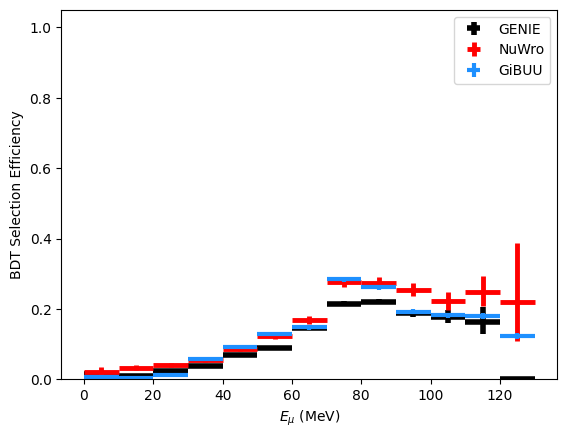

0.30760887265205383


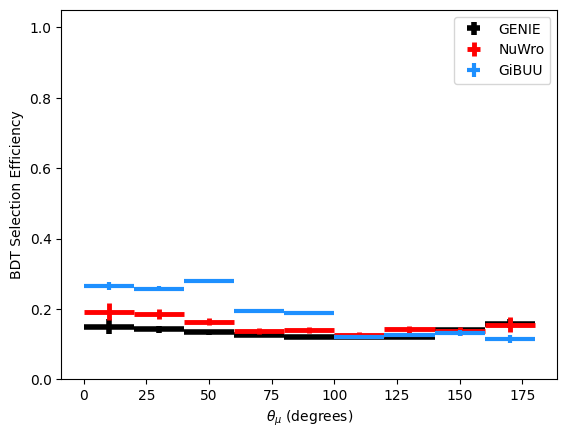

0.22334477685139775


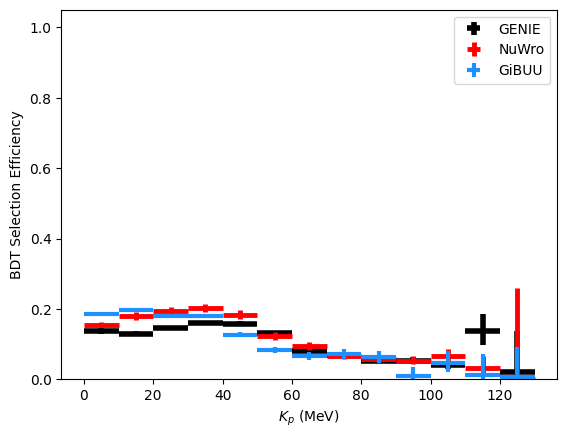

0.2626761853694916


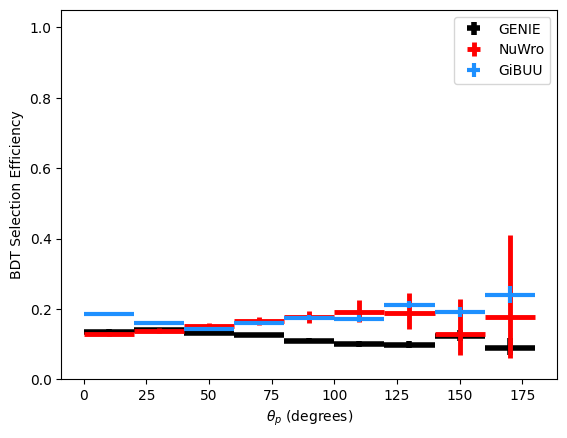

0.25250384062528614


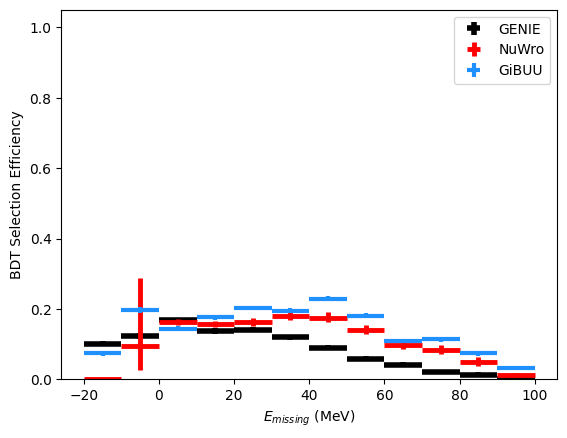

0.33575581395348836


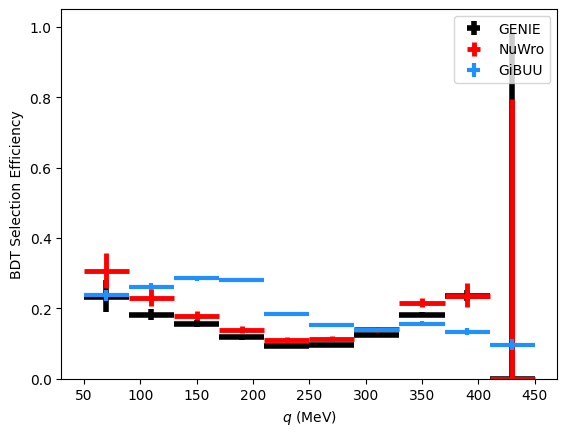

0.34301075268817205


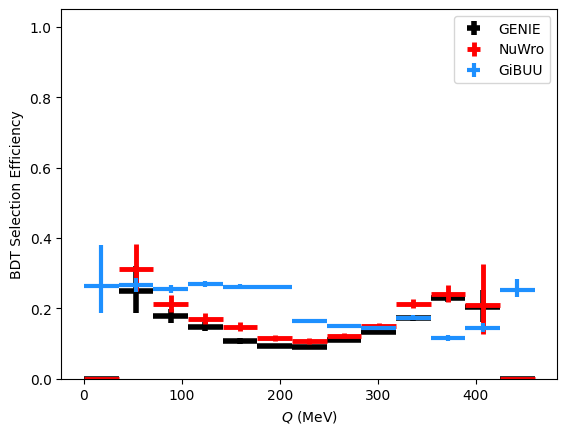

0.3106402099132538


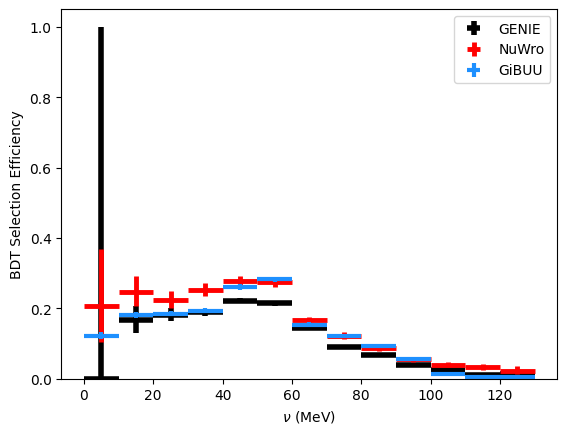

0.33717059639389735


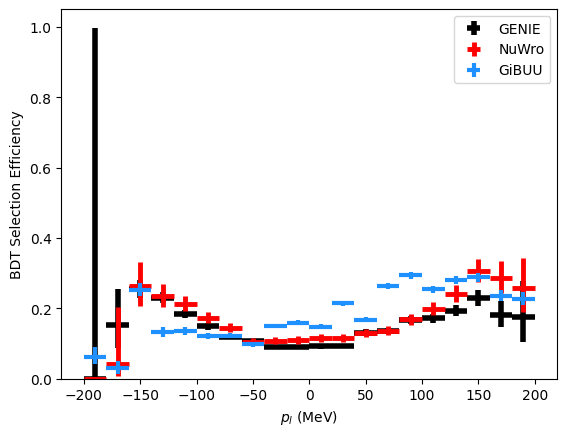

0.29067661161427816


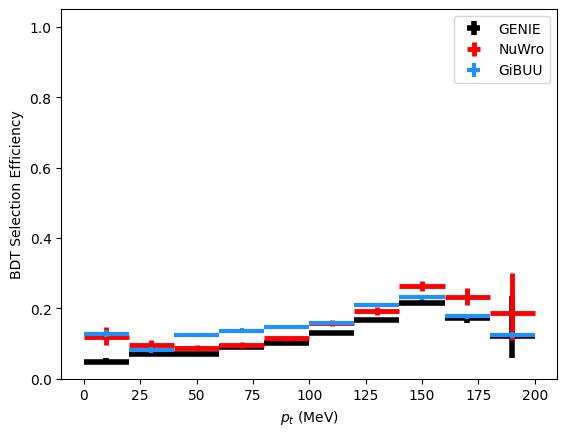

0.24781719744205477


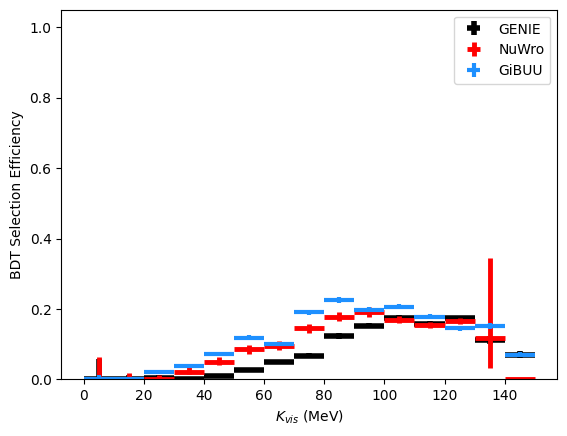

0.19115483015775683


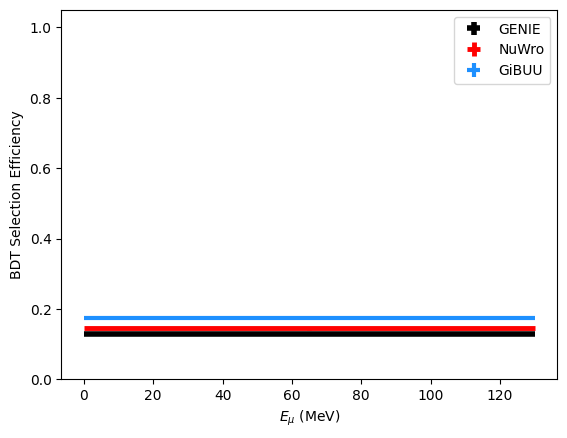

0.6217125594615937


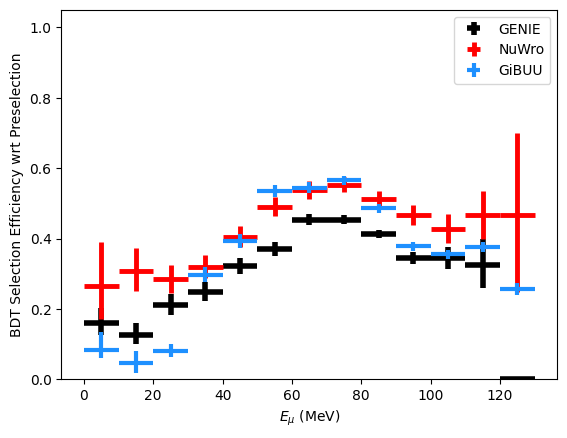

0.6086249113082887


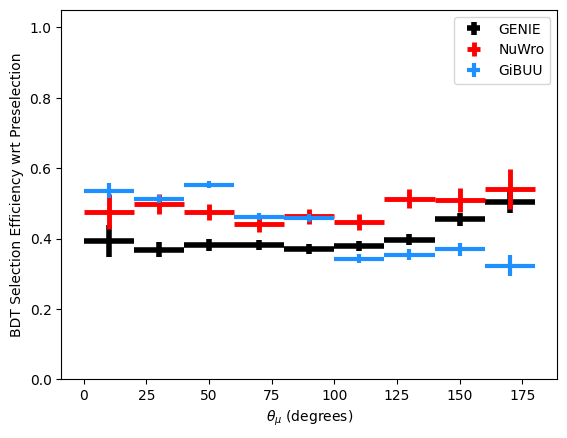

1.0439814984798432


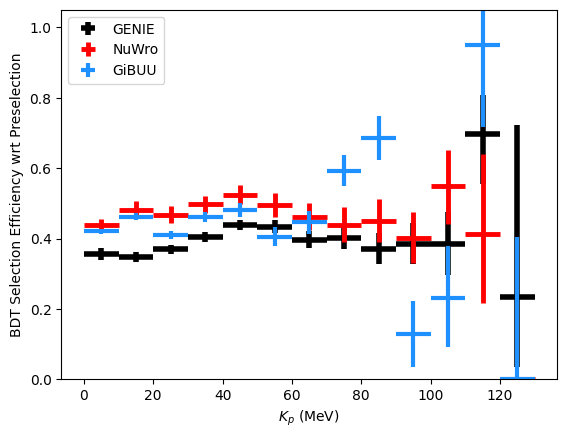

0.583132530120482


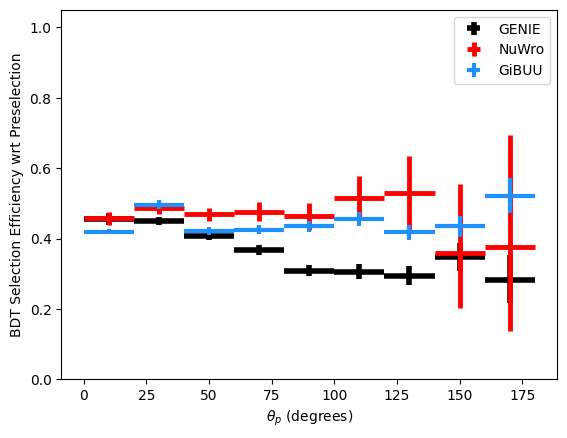

0.5918971538543701


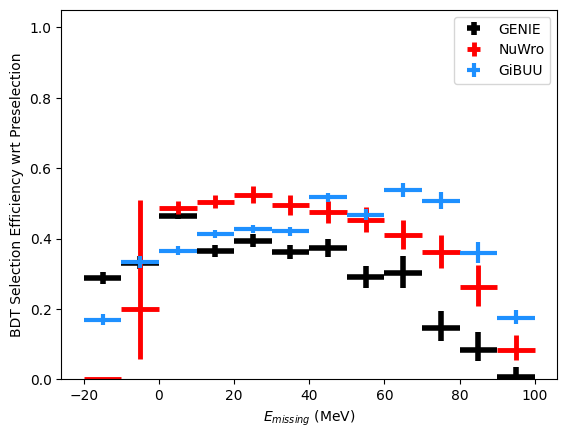

0.6393801927566529


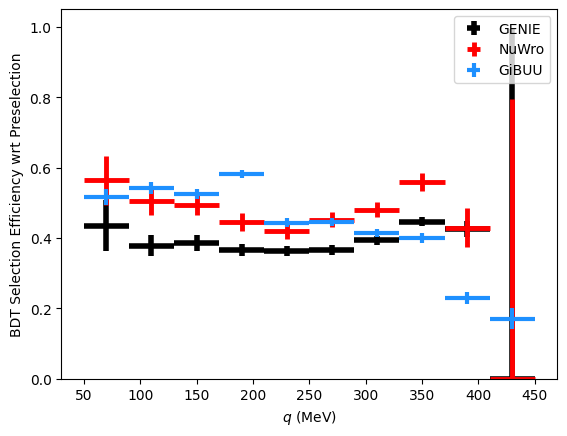

0.6316831683168317


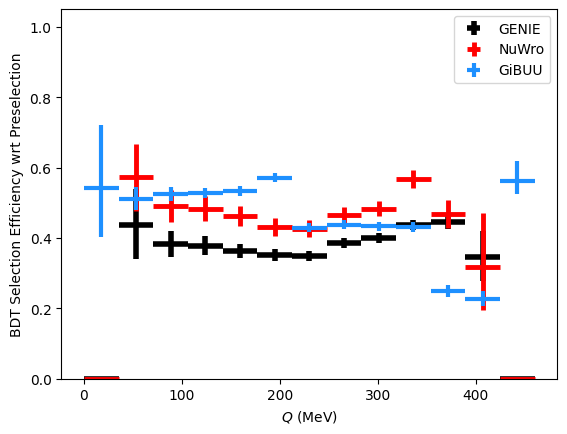

0.6177576065063477


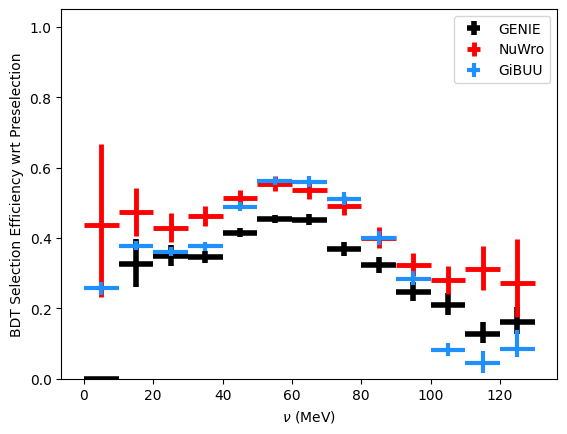

0.6333973128598849


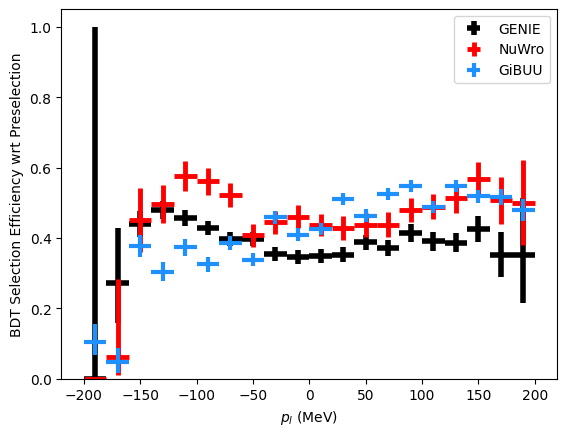

0.589894598722458


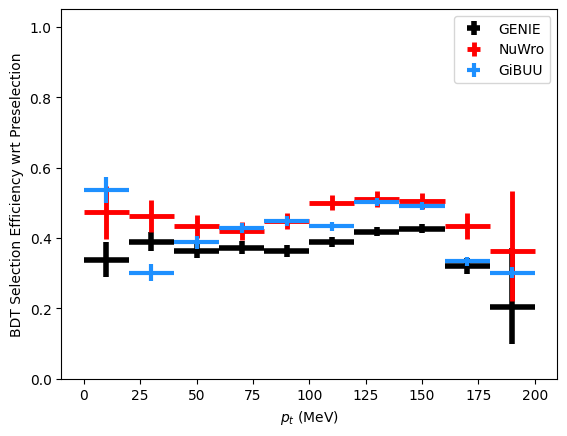

0.593758573388203


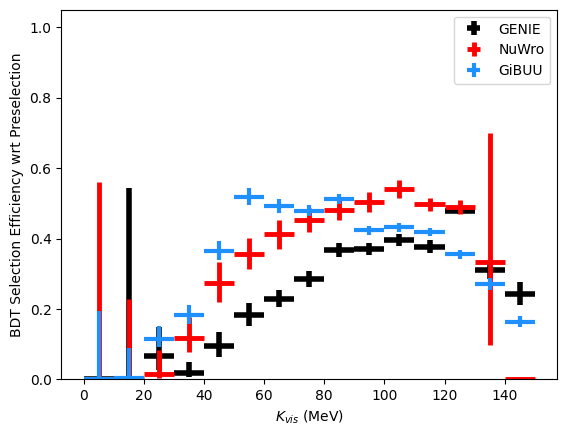

0.5209199859005993


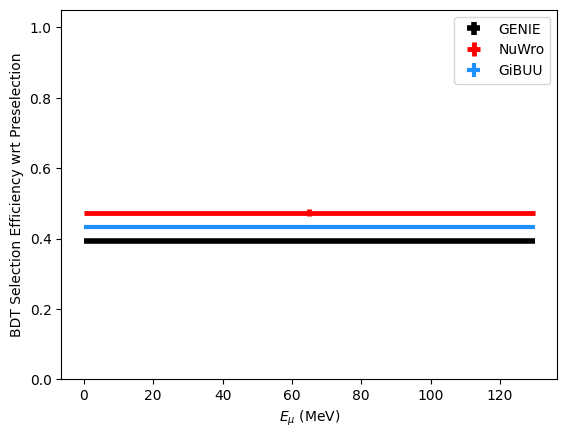

In [437]:

plot_efficiency_detailed(this_bdt_var,this_cutvalue)
plot_efficiency_detailed(this_bdt_var,this_cutvalue,wrt_preset=True)


In [438]:

if(0): save_bdt(model_lowE,"model_lowE","_1")


In [439]:

train_vars = []
train_vars = train_vars_nokineprim.copy()#+['stm_clusterlength']

fraction = 0.6
num_vars = 500
n = 200
num_classes=2

train_df  = pd.concat([train_kdar_df, train_overlay_df], sort=False)
test_df  = pd.concat([test_kdar_df, test_overlay_df], sort=False)

# Extract feature and target arrays
X_test, y_test = test_df.fillna(0)[train_vars].copy(), test_df[['is_KDAR']].copy()
X_train, y_train = train_df.fillna(0)[train_vars].copy(), train_df[['is_KDAR']].copy()
    
presel_model_hiE_genie_only = SelectKBest(f_classif, k=num_vars).fit(X_train, y_train)
new_names_hiE_genie_only = list(presel_model_hiE_genie_only.get_feature_names_out())

X_train = presel_model_hiE_genie_only.transform(X_train)
X_test = presel_model_hiE_genie_only.transform(X_test)

# Define the hyperparameter distributions
param_dist = {
    'max_depth': stats.randint(3, 10),
    'eta': stats.uniform(0, 1),
    'gamma':stats.uniform(2, 30),
    'lambda':stats.uniform(0, 10),
    'alpha':stats.uniform(0, 10),
    'min_child_weight':stats.uniform(0, 10),
     'colsample_bytree': stats.uniform(0.5, 0.5),
     'colsample_bylevel': stats.uniform(0.5, 0.5)
}

# Create the XGBoost model object
xgb_model_hiE_genie_only = xgb.XGBClassifier()

# Create the RandomizedSearchCV object
random_search_hiE_genie_only = RandomizedSearchCV(xgb_model_hiE_genie_only, param_distributions=param_dist, n_iter=100, cv=5, scoring='roc_auc')

# Fit the RandomizedSearchCV object to the training data
random_search_hiE_genie_only.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search_hiE_genie_only.best_params_)
print("Best score: ", random_search_hiE_genie_only.best_score_)

new_params_hiE_genie_only = random_search_hiE_genie_only.best_params_
new_params_hiE_genie_only["objective"] =  "binary:logistic"
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True,feature_names=new_names_hiE_genie_only)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True,feature_names=new_names_hiE_genie_only)
evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]
evals_result_hiE_genie_only = {}
model_hiE_genie_only = xgb.train(
   params=random_search_hiE_genie_only.best_params_,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=200,
    evals_result=evals_result_hiE_genie_only
)


/Users/bbogart/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=500 is greater than n_features=318. All the features will be returned.
  warnings.warn(
/Users/bbogart/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bbogart/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [313 314 316 317] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/bbogart/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Best set of hyperparameters:  {'alpha': 1.0061347293943579, 'colsample_bylevel': 0.9034240355416903, 'colsample_bytree': 0.8632442038279611, 'eta': 0.1343970068223883, 'gamma': 2.344424771543884, 'lambda': 4.5479369378286005, 'max_depth': 7, 'min_child_weight': 2.1105039220684874}
Best score:  0.9182126132554828
[0]	validation-logloss:0.33643	train-logloss:0.48021
[199]	validation-logloss:0.15903	train-logloss:0.17644


In [440]:

assign_bdt_vars(model_hiE_genie_only,new_names_hiE_genie_only,"kdar_score_hiE_genie_only")


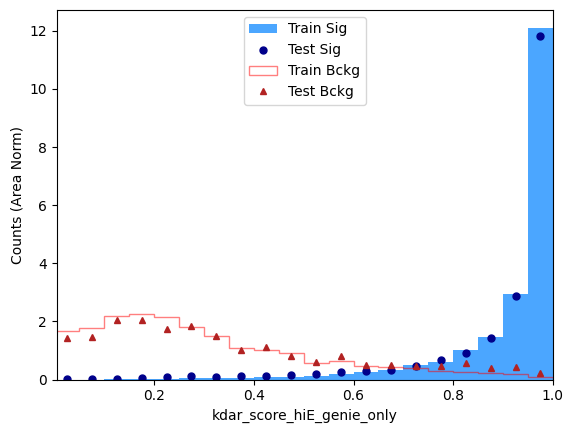

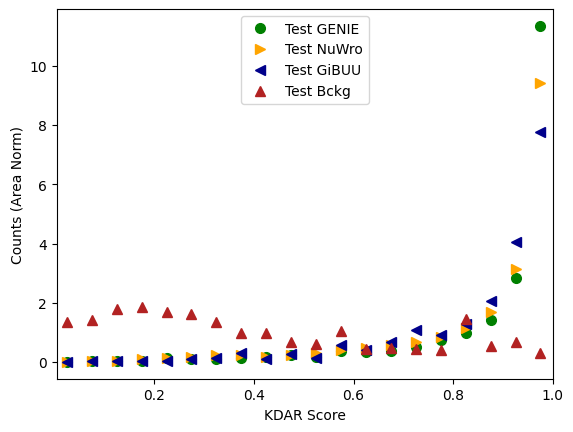

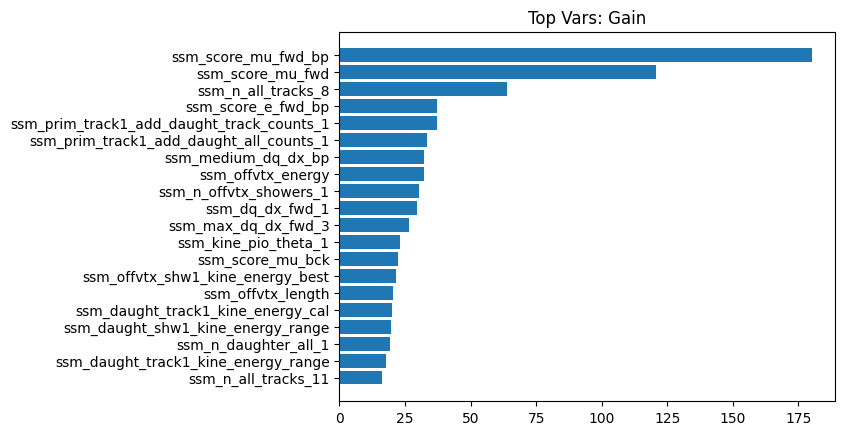

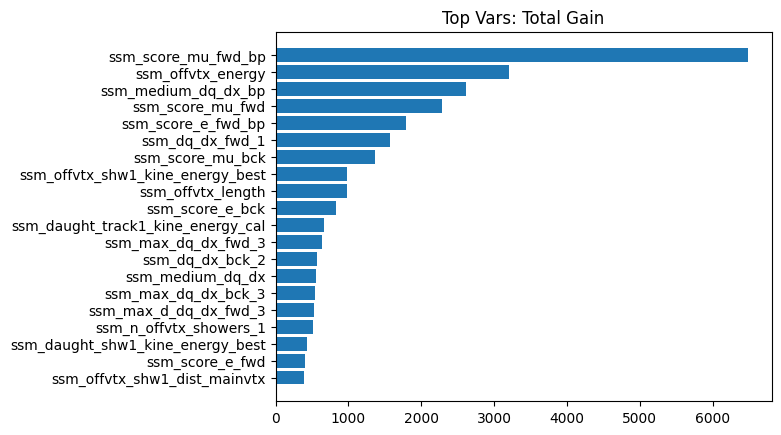

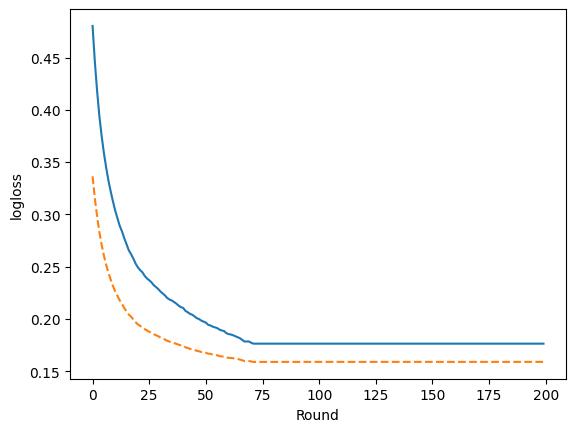

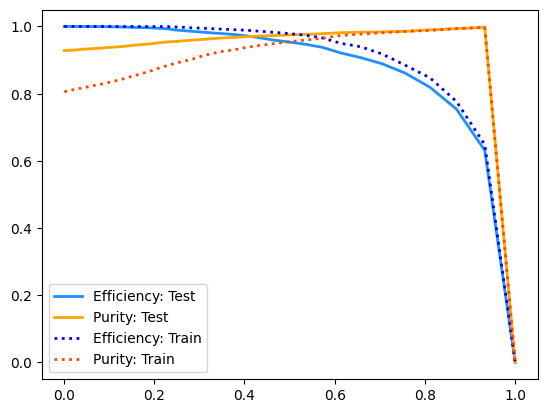

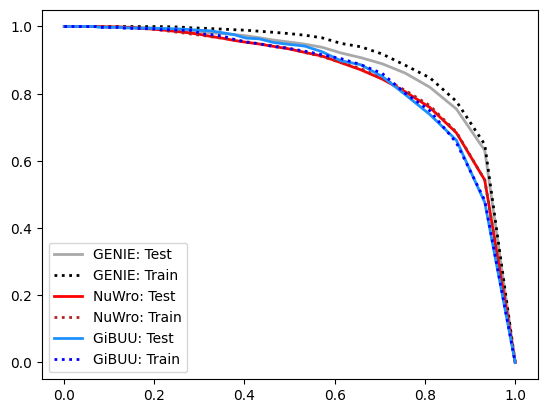

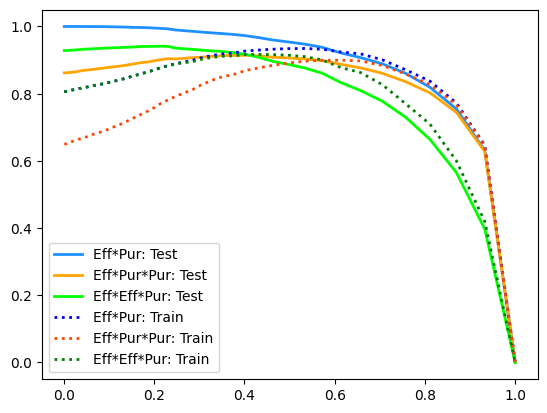

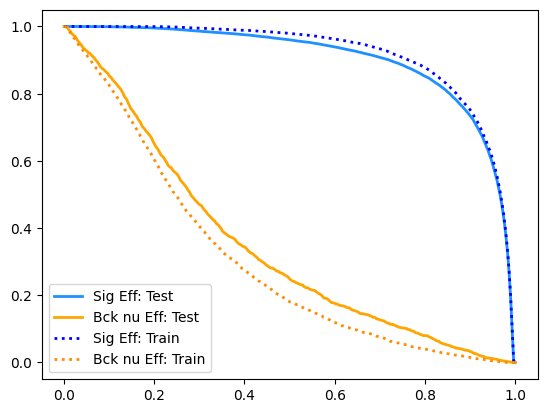

In [441]:

evaluate_BDT(model_hiE_genie_only,"kdar_score_hiE_genie_only",evals_result_hiE_genie_only,max_items=20)


In [442]:

this_cutvalue = 0.85
this_bdt_var = "kdar_score_hiE_genie_only"

print("old gen sel lowE passrate:",round(np.sum(lowE_overlay_df.query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("gen sel lowE passrate:",round(np.sum(lowE_overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("pre sel lowE passrate:",round(np.sum(lowE_overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("Train BDT lowE passrate:",round(np.sum(train_lowE_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(train_lowE_df["net_weight"].to_numpy())*np.sum(lowE_overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("Test BDT lowE passrate:",round(np.sum(test_lowE_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(test_lowE_df["net_weight"].to_numpy())*np.sum(lowE_overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))

print("")
print("old gen sel hiE passrate:",round(np.sum(overlay_df.query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("gen sel hiE passrate:",round(np.sum(overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("pre sel hiE passrate:",round(np.sum(overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("Train BDT hiE passrate:",round(np.sum(train_overlay_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(train_overlay_df["net_weight"].to_numpy())*np.sum(overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),4))
print("Test BDT hiE passrate:",round(np.sum(test_overlay_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(test_overlay_df["net_weight"].to_numpy())*np.sum(overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),4))



old gen sel lowE passrate: 0.235
gen sel lowE passrate: 0.263
pre sel lowE passrate: 0.094
Train BDT lowE passrate: 0.046
Test BDT lowE passrate: 0.049

old gen sel hiE passrate: 0.309
gen sel hiE passrate: 0.317
pre sel hiE passrate: 0.01
Train BDT hiE passrate: 0.0003
Test BDT hiE passrate: 0.0007


In [443]:

print("old gen sel lowE passrate:",round(np.sum(lowE_overlay_df.query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("gen sel lowE passrate:",round(np.sum(lowE_overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("pre sel lowE rel passrate:",round(np.sum(lowE_overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(lowE_overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy()),3))
print("Train BDT lowE rel passrate:",round(np.sum(train_lowE_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(train_lowE_df["net_weight"].to_numpy()),3))
print("Test BDT lowE rel passrate:",round(np.sum(test_lowE_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(test_lowE_df["net_weight"].to_numpy()),3))

print("")
print("old gen sel hiE passrate:",round(np.sum(overlay_df.query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("gen sel hiE passrate:",round(np.sum(overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("pre sel hiE rel passrate:",round(np.sum(overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy()),3))
print("Train BDT hiE rel passrate:",round(np.sum(train_overlay_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(train_overlay_df["net_weight"].to_numpy()),3))
print("Test BDT hiE rel passrate:",round(np.sum(test_overlay_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(test_overlay_df["net_weight"].to_numpy()),3))



old gen sel lowE passrate: 0.235
gen sel lowE passrate: 0.263
pre sel lowE rel passrate: 0.356
Train BDT lowE rel passrate: 0.494
Test BDT lowE rel passrate: 0.52

old gen sel hiE passrate: 0.309
gen sel hiE passrate: 0.317
pre sel hiE rel passrate: 0.031
Train BDT hiE rel passrate: 0.026
Test BDT hiE rel passrate: 0.075


0.5088494688272477


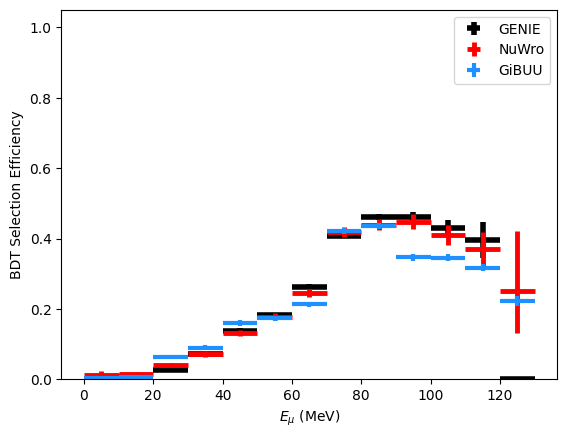

0.4301506519317627


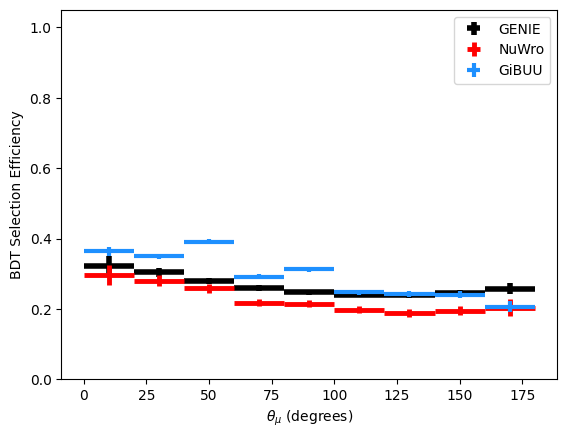

0.397071447968483


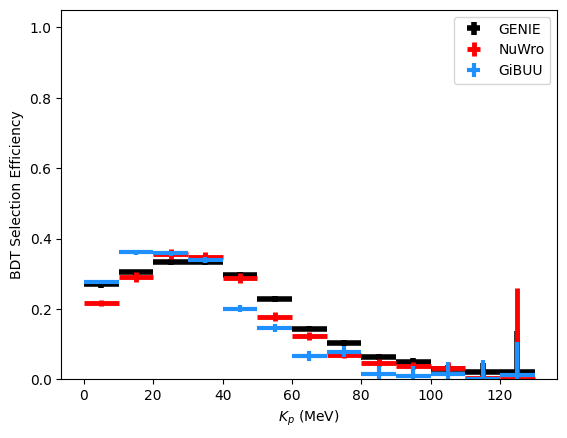

0.44987719357013706


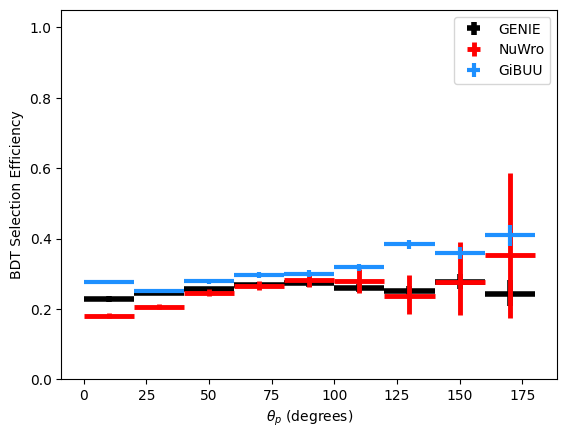

0.5580678522586823


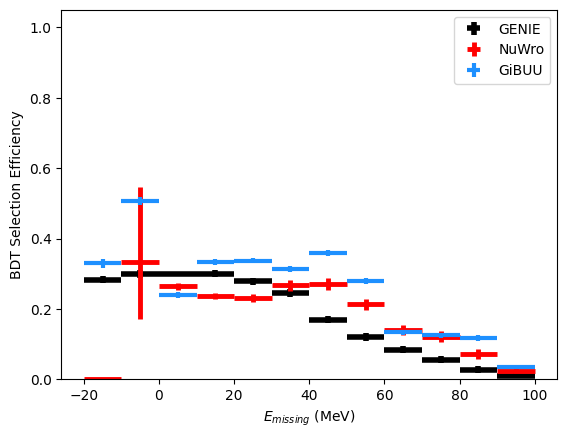

0.5426699191331864


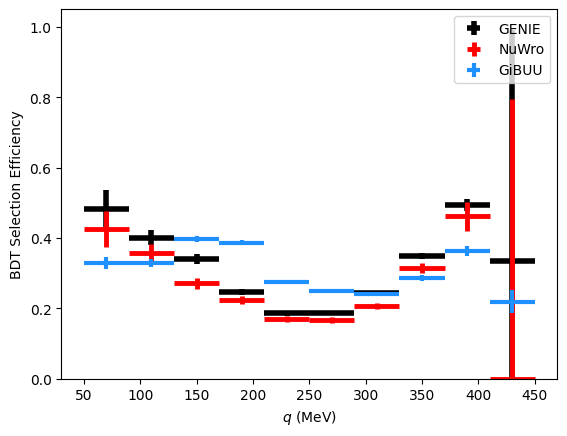

0.581252133846283


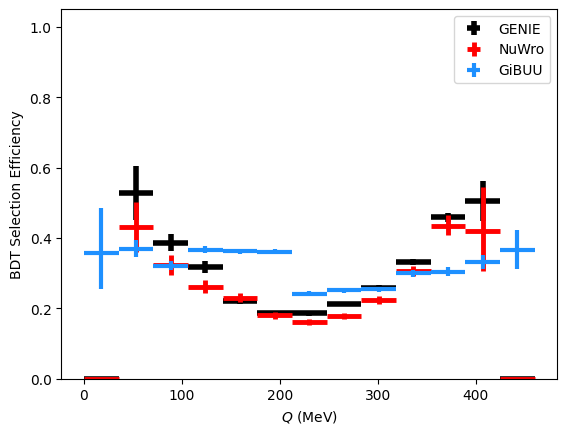

0.508757808804512


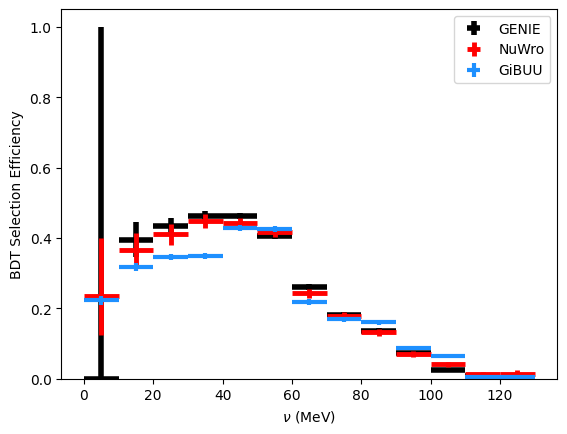

0.5665094912052155


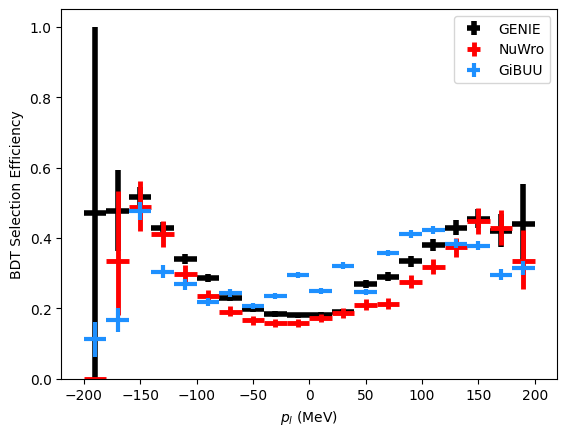

0.5568471610546113


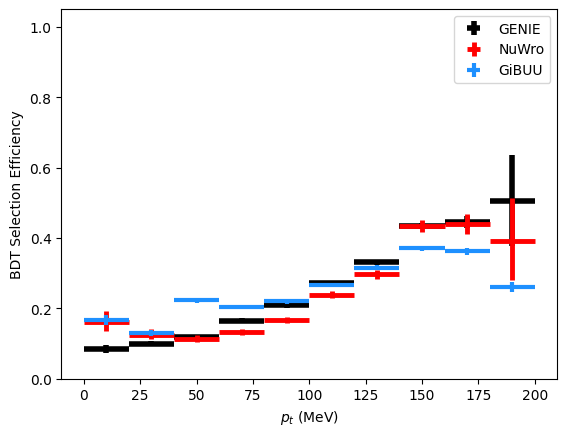

0.5310972183942795


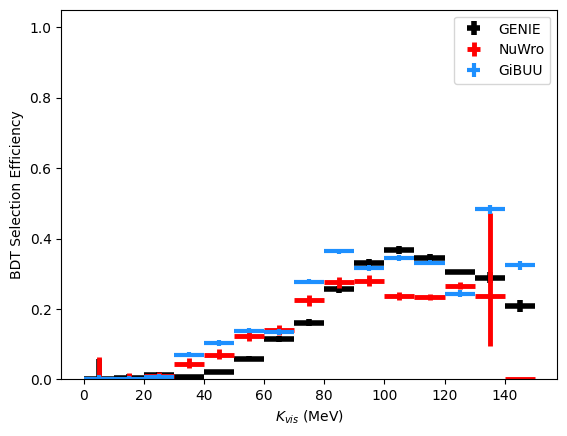

0.3158921390771866


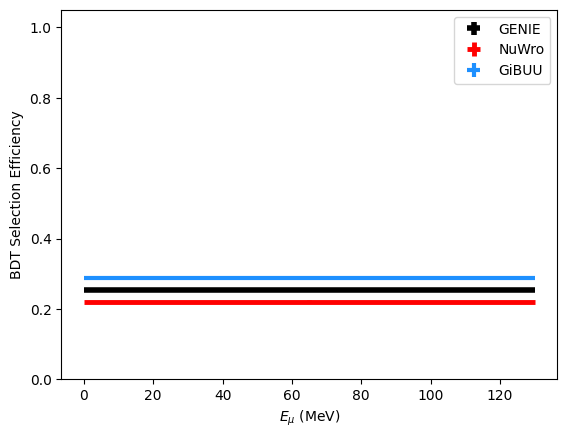

0.9520272850990296


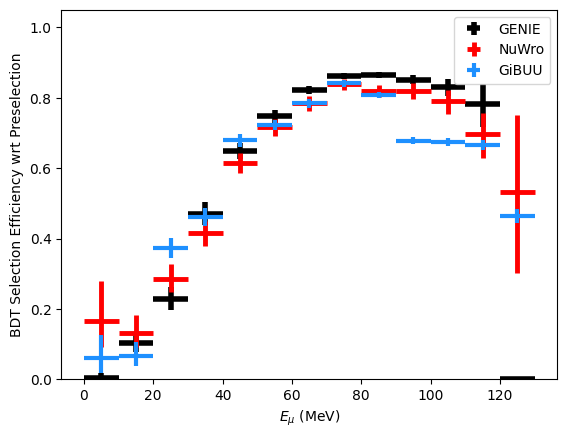

0.93283349275589


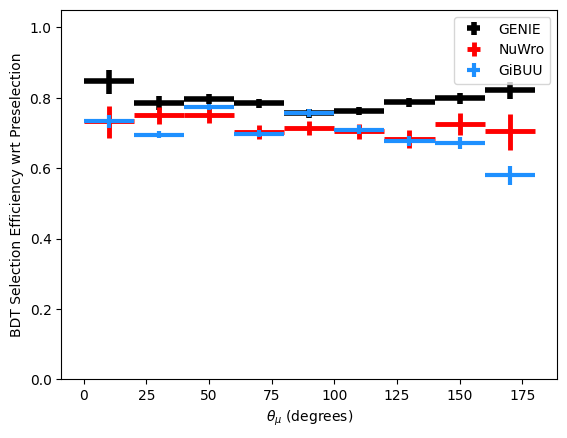

0.957396411895752


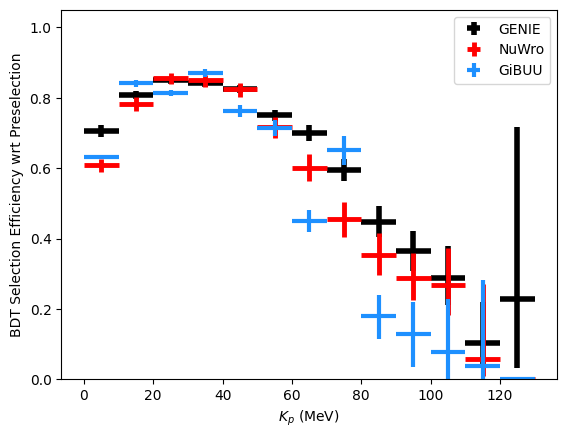

0.9834020912647248


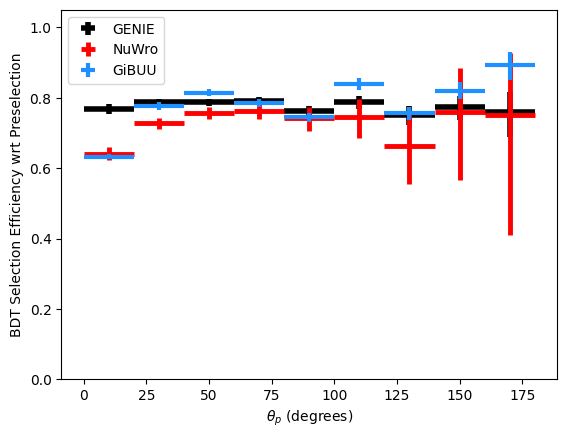

0.9495867550373078


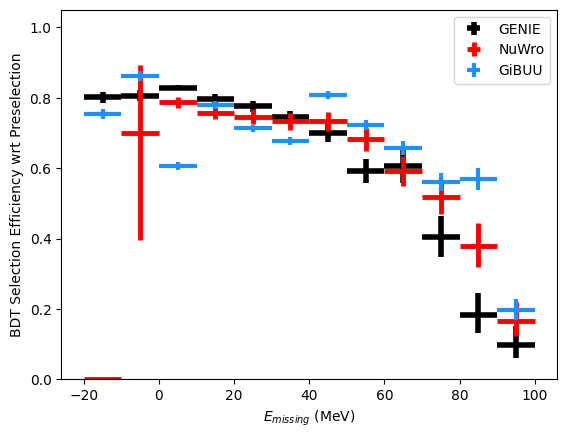

1.1


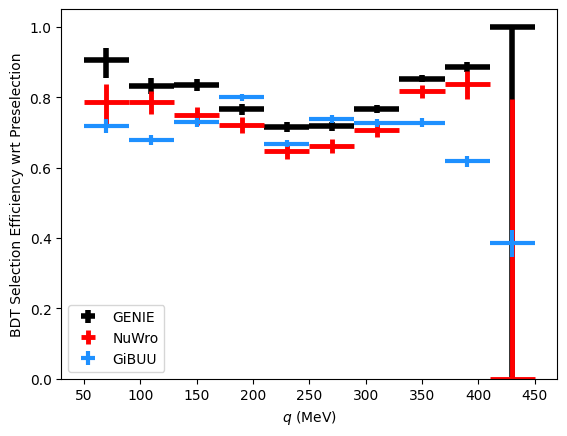

1.0215638697147371


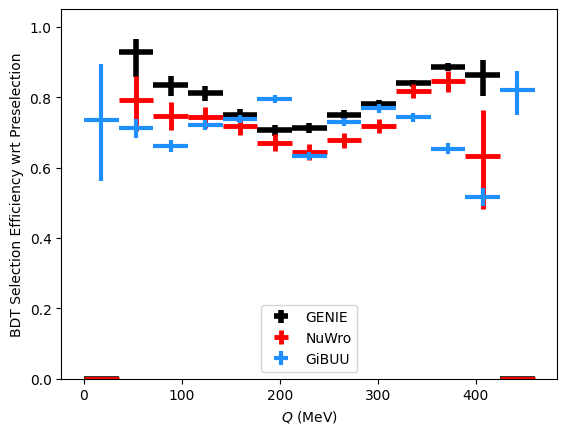

0.9532556474208832


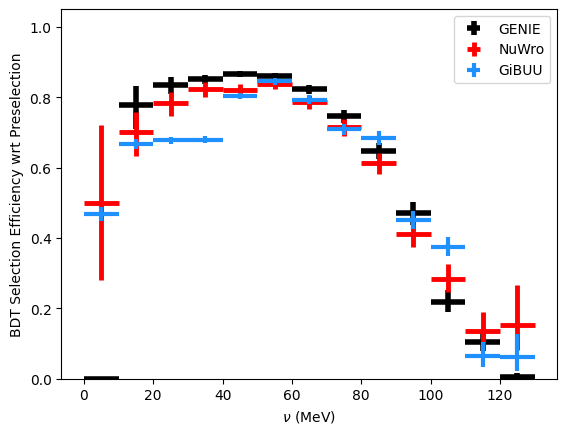

1.1


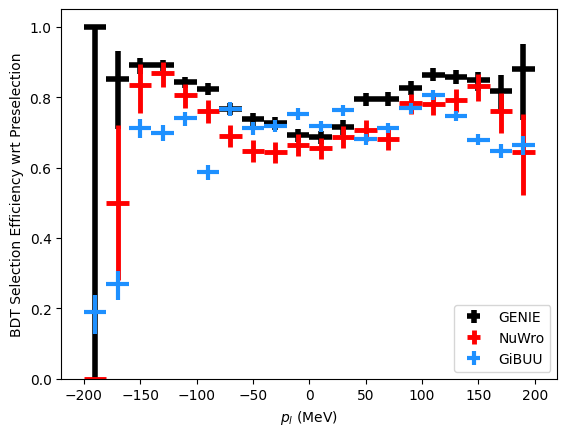

0.9414035081863404


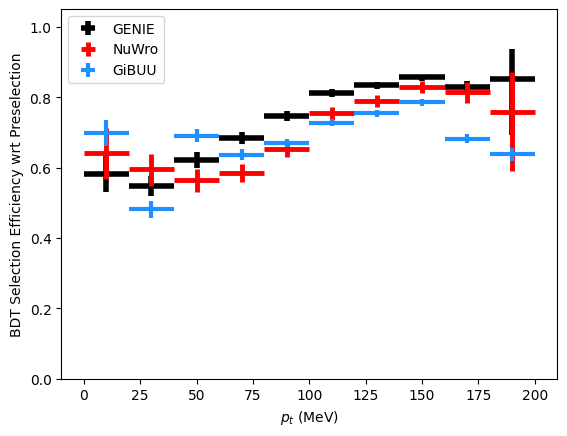

0.9459674954414369


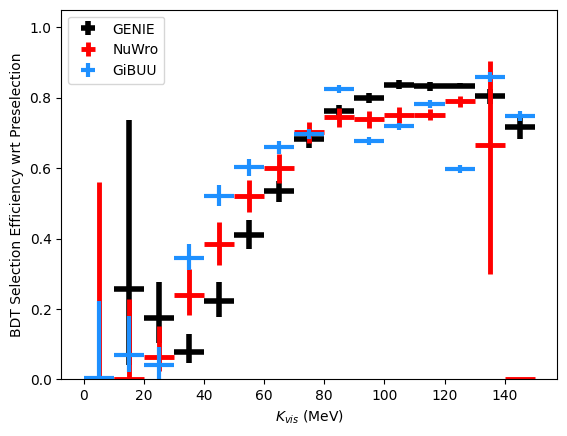

0.85922229886055


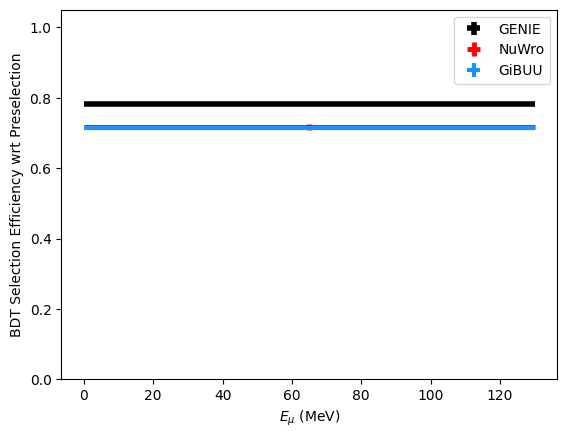

In [444]:

plot_efficiency_detailed(this_bdt_var,this_cutvalue)
plot_efficiency_detailed(this_bdt_var,this_cutvalue,wrt_preset=True)


In [445]:

train_vars = []
train_vars = train_vars_nokineprim.copy()#+['stm_clusterlength']

fraction = 0.6
num_vars = 500
n = 200
num_classes=2

train_df  = pd.concat([train_kdar_df,train_nuwro_df,train_gibuu_df, train_overlay_df], sort=False)
test_df  = pd.concat([test_kdar_df,test_nuwro_df,test_gibuu_df, test_overlay_df], sort=False)

# Extract feature and target arrays
X_test, y_test = test_df.fillna(0)[train_vars].copy(), test_df[['is_KDAR']].copy()
X_train, y_train = train_df.fillna(0)[train_vars].copy(), train_df[['is_KDAR']].copy()
    
presel_model_hiE = SelectKBest(f_classif, k=num_vars).fit(X_train, y_train)
new_names_hiE = list(presel_model_hiE.get_feature_names_out())

X_train = presel_model_hiE.transform(X_train)
X_test = presel_model_hiE.transform(X_test)

# Define the hyperparameter distributions
param_dist = {
    'max_depth': stats.randint(3, 10),
    'eta': stats.uniform(0, 1),
    'gamma':stats.uniform(2, 30),
    'lambda':stats.uniform(0, 10),
    'alpha':stats.uniform(0, 10),
    'min_child_weight':stats.uniform(0, 10),
     'colsample_bytree': stats.uniform(0.5, 0.5),
     'colsample_bylevel': stats.uniform(0.5, 0.5)
}

# Create the XGBoost model object
xgb_model_hiE = xgb.XGBClassifier()

# Create the RandomizedSearchCV object
random_search_hiE = RandomizedSearchCV(xgb_model_hiE, param_distributions=param_dist, n_iter=100, cv=5, scoring='roc_auc')

# Fit the RandomizedSearchCV object to the training data
random_search_hiE.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search_hiE.best_params_)
print("Best score: ", random_search_hiE.best_score_)

new_params_hiE = random_search_hiE.best_params_
new_params_hiE["objective"] =  "binary:logistic"
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True,feature_names=new_names_hiE)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True,feature_names=new_names_hiE)
evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]
evals_result_hiE = {}
model_hiE = xgb.train(
   params=random_search_hiE.best_params_,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=200,
    evals_result=evals_result_hiE
)


/Users/bbogart/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=500 is greater than n_features=318. All the features will be returned.
  warnings.warn(
/Users/bbogart/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bbogart/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [313 314 316 317] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/bbogart/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Best set of hyperparameters:  {'alpha': 3.137900918597809, 'colsample_bylevel': 0.6650195828831456, 'colsample_bytree': 0.673567386984733, 'eta': 0.1344424765326736, 'gamma': 3.726203581429584, 'lambda': 4.107814852384925, 'max_depth': 7, 'min_child_weight': 8.179899377289784}
Best score:  0.9086993820463641
[0]	validation-logloss:0.23923	train-logloss:0.38454
[199]	validation-logloss:0.12101	train-logloss:0.18897


In [446]:

assign_bdt_vars(model_hiE,new_names_hiE,"kdar_score_hiE")


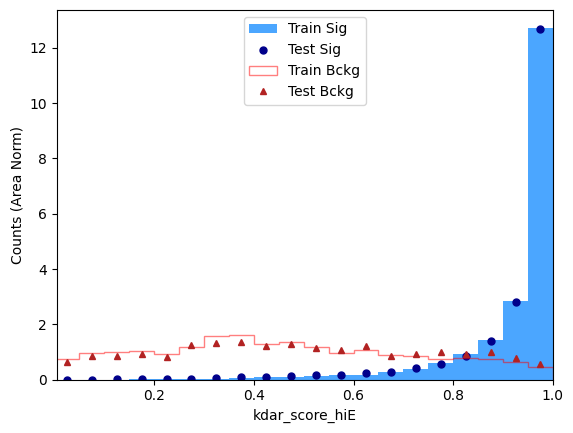

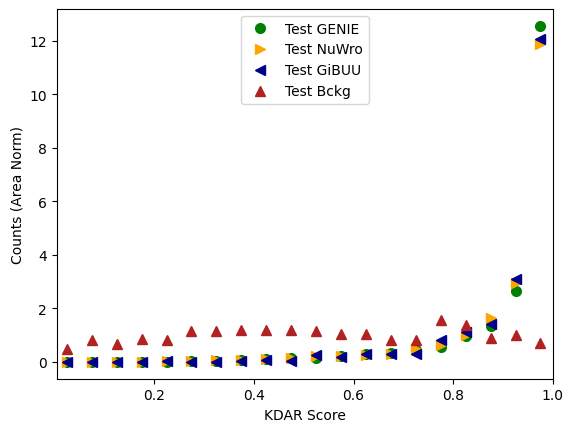

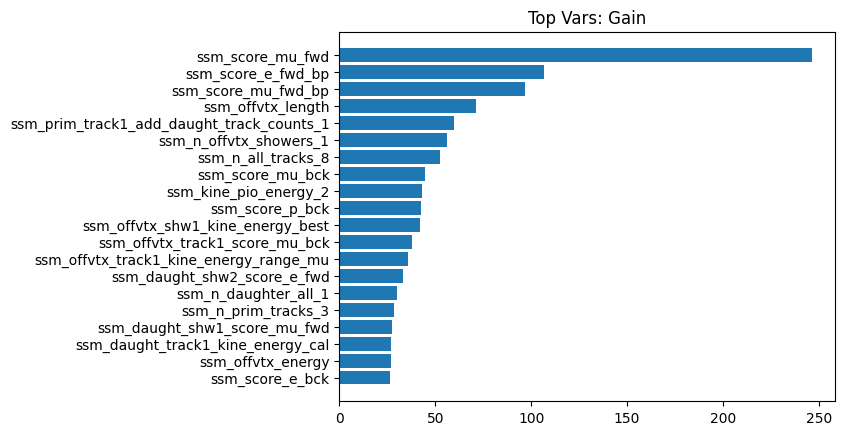

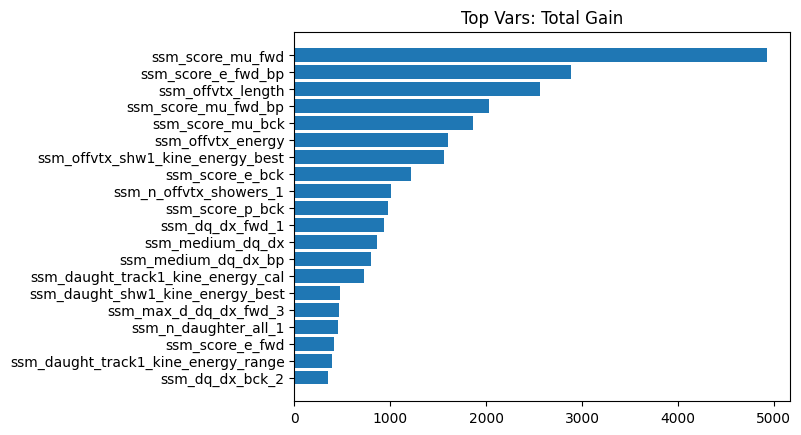

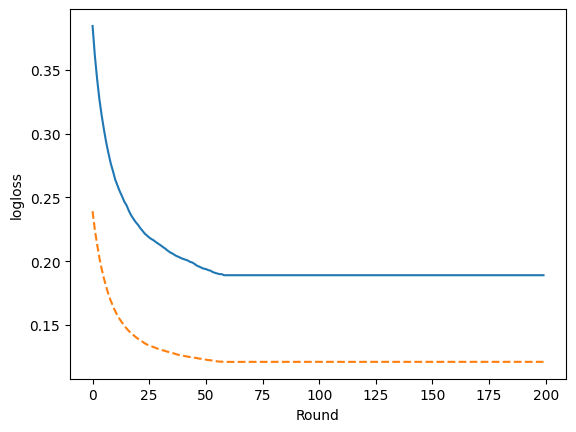

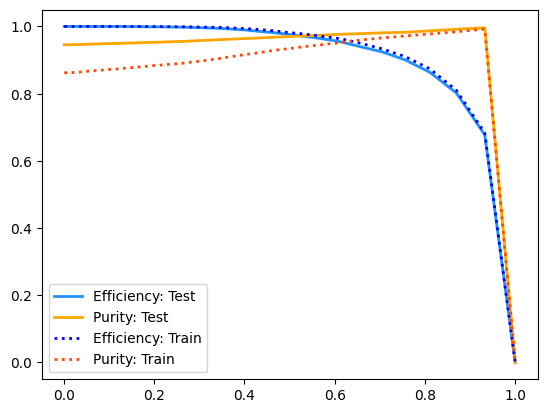

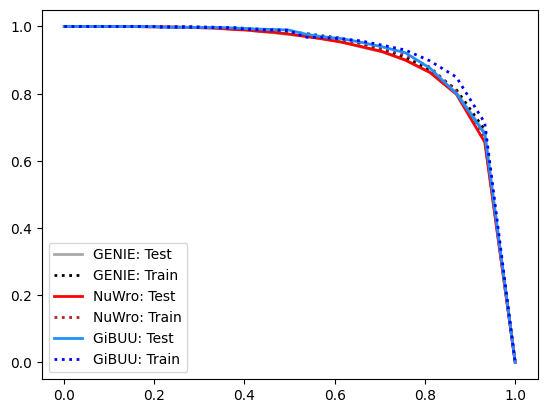

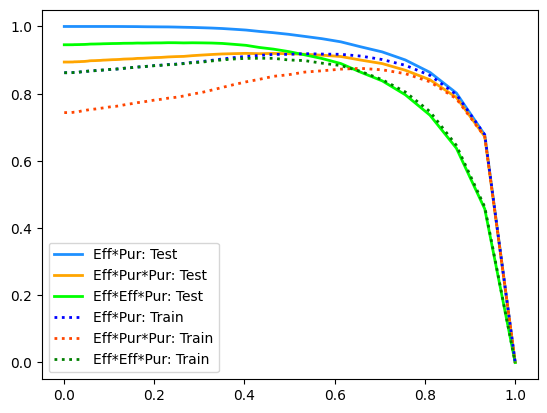

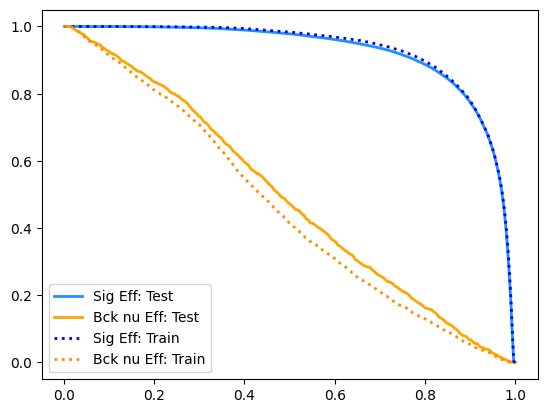

In [447]:

evaluate_BDT(model_hiE,"kdar_score_hiE",evals_result_hiE,max_items=20)


In [448]:

this_cutvalue = 0.9
this_bdt_var = "kdar_score_hiE"

print("old gen sel lowE passrate:",round(np.sum(lowE_overlay_df.query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("gen sel lowE passrate:",round(np.sum(lowE_overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("pre sel lowE passrate:",round(np.sum(lowE_overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("Train BDT lowE passrate:",round(np.sum(train_lowE_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(train_lowE_df["net_weight"].to_numpy())*np.sum(lowE_overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("Test BDT lowE passrate:",round(np.sum(test_lowE_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(test_lowE_df["net_weight"].to_numpy())*np.sum(lowE_overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))

print("")
print("old gen sel hiE passrate:",round(np.sum(overlay_df.query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("gen sel hiE passrate:",round(np.sum(overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("pre sel hiE passrate:",round(np.sum(overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("Train BDT hiE passrate:",round(np.sum(train_overlay_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(train_overlay_df["net_weight"].to_numpy())*np.sum(overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),4))
print("Test BDT hiE passrate:",round(np.sum(test_overlay_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(test_overlay_df["net_weight"].to_numpy())*np.sum(overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),4))



old gen sel lowE passrate: 0.235
gen sel lowE passrate: 0.263
pre sel lowE passrate: 0.094
Train BDT lowE passrate: 0.047
Test BDT lowE passrate: 0.048

old gen sel hiE passrate: 0.309
gen sel hiE passrate: 0.317
pre sel hiE passrate: 0.01
Train BDT hiE passrate: 0.0006
Test BDT hiE passrate: 0.0008


In [449]:

print("old gen sel lowE passrate:",round(np.sum(lowE_overlay_df.query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("gen sel lowE passrate:",round(np.sum(lowE_overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("pre sel lowE rel passrate:",round(np.sum(lowE_overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(lowE_overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy()),3))
print("Train BDT lowE rel passrate:",round(np.sum(train_lowE_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(train_lowE_df["net_weight"].to_numpy()),3))
print("Test BDT lowE rel passrate:",round(np.sum(test_lowE_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(test_lowE_df["net_weight"].to_numpy()),3))

print("")
print("old gen sel hiE passrate:",round(np.sum(overlay_df.query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("gen sel hiE passrate:",round(np.sum(overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("pre sel hiE rel passrate:",round(np.sum(overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy()),3))
print("Train BDT hiE rel passrate:",round(np.sum(train_overlay_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(train_overlay_df["net_weight"].to_numpy()),3))
print("Test BDT hiE rel passrate:",round(np.sum(test_overlay_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(test_overlay_df["net_weight"].to_numpy()),3))



old gen sel lowE passrate: 0.235
gen sel lowE passrate: 0.263
pre sel lowE rel passrate: 0.356
Train BDT lowE rel passrate: 0.503
Test BDT lowE rel passrate: 0.514

old gen sel hiE passrate: 0.309
gen sel hiE passrate: 0.317
pre sel hiE rel passrate: 0.031
Train BDT hiE rel passrate: 0.059
Test BDT hiE rel passrate: 0.085


0.5097560975609757


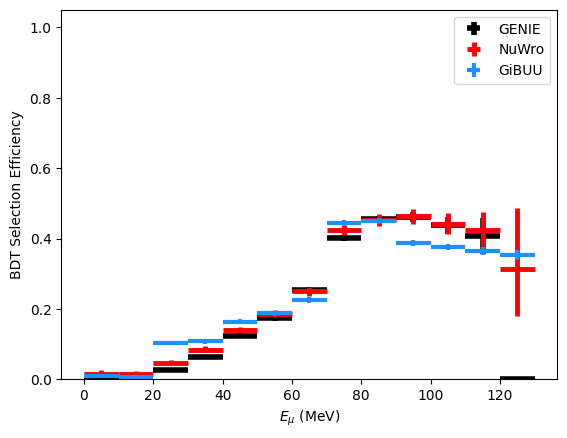

0.4599082946777344


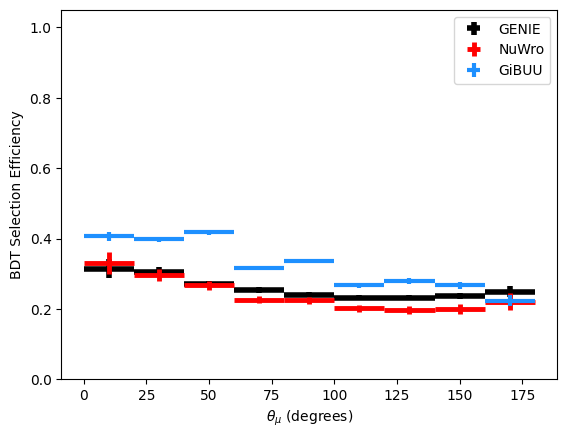

0.40289743244647985


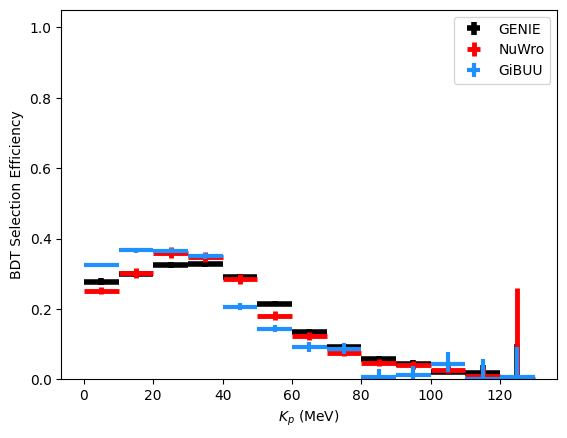

0.4566651821136475


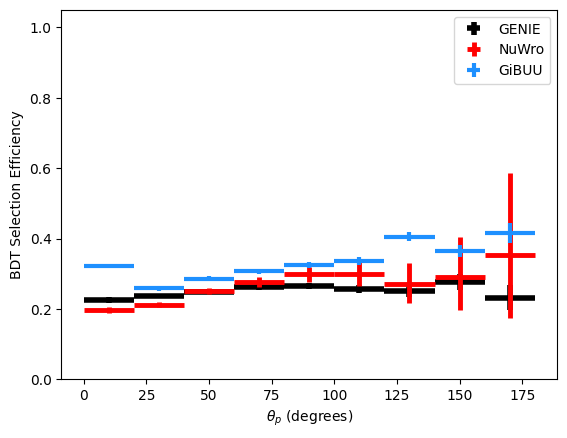

0.5744258224964143


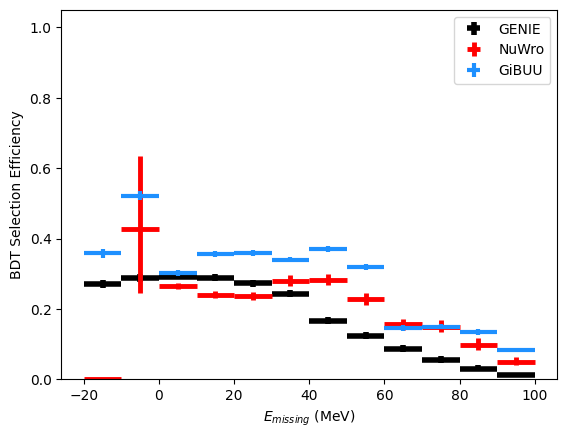

1.1


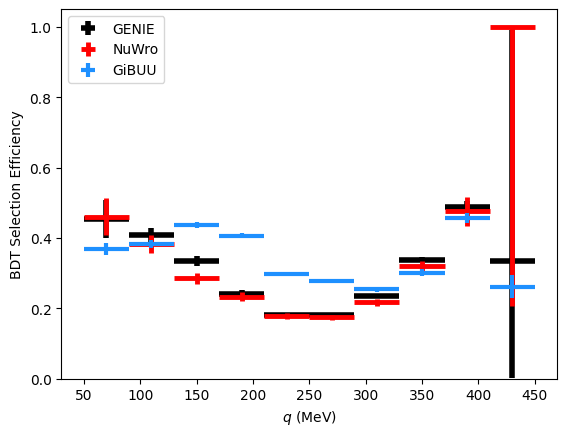

0.567741935483871


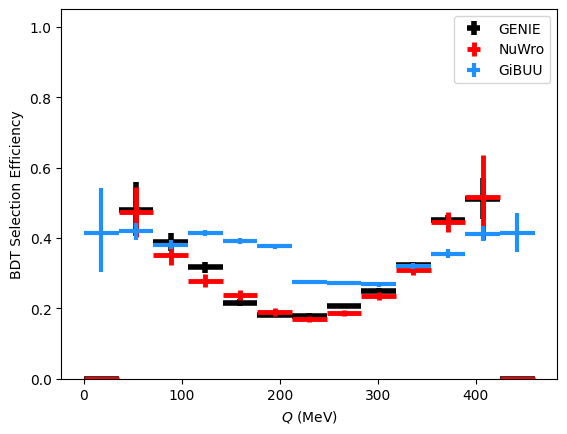

0.5079194630872483


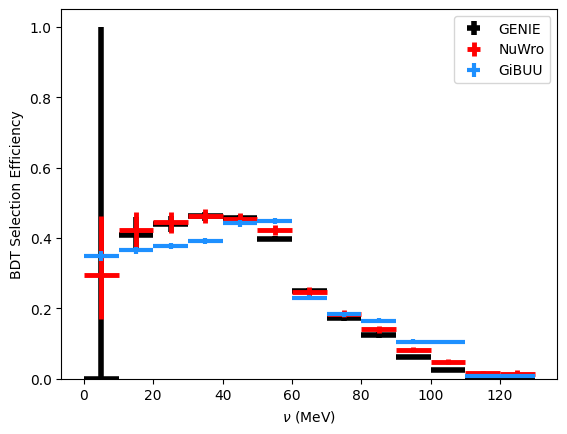

0.5857627511024476


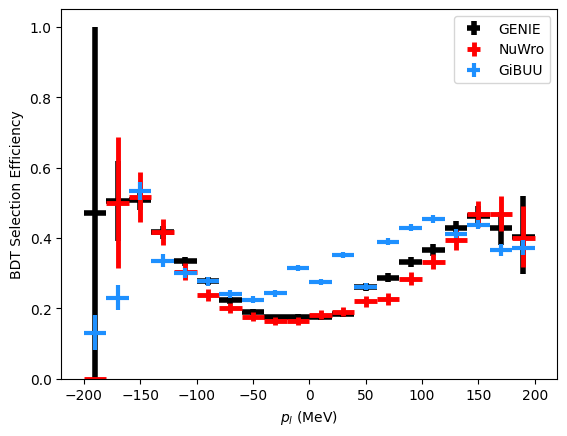

0.5579617679119111


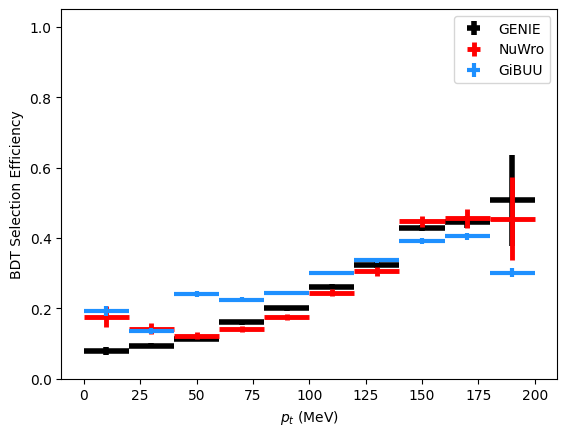

0.549787700176239


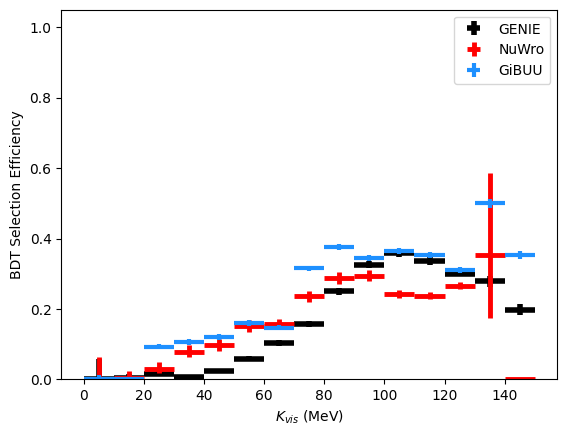

0.345471739768982


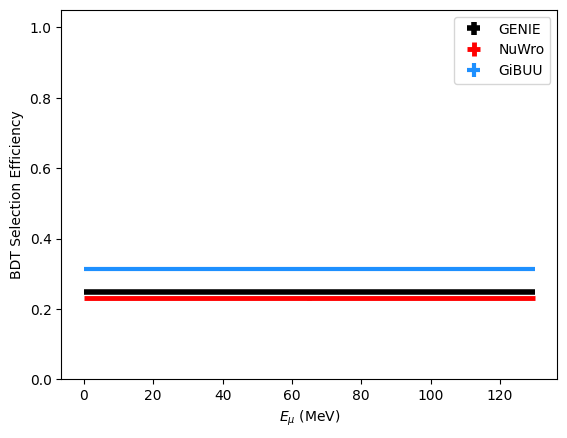

0.9709083318710328


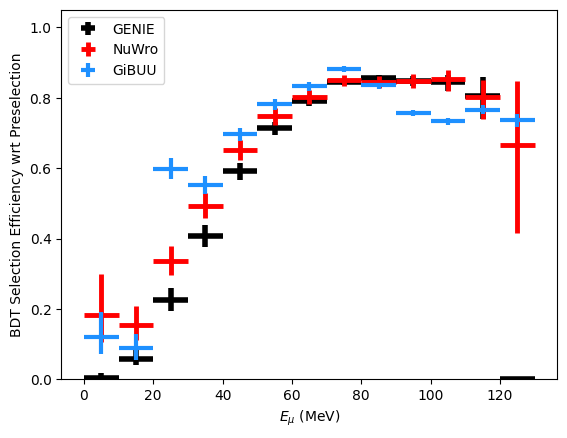

0.9099595963954926


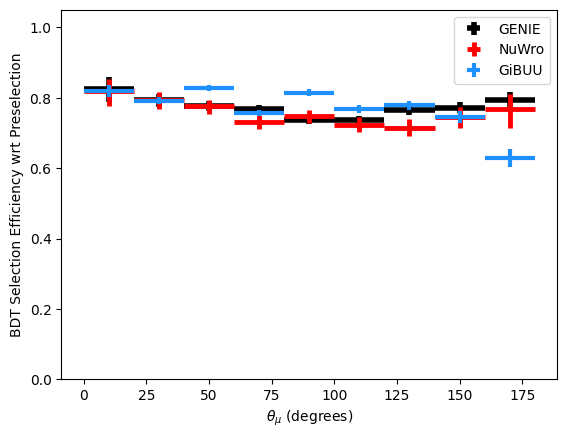

0.9836678922176362


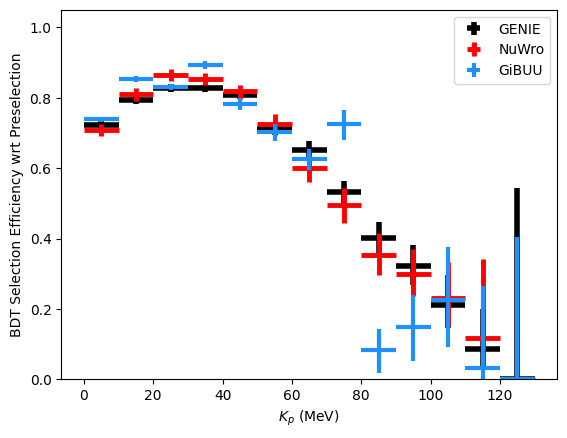

0.9982401967048646


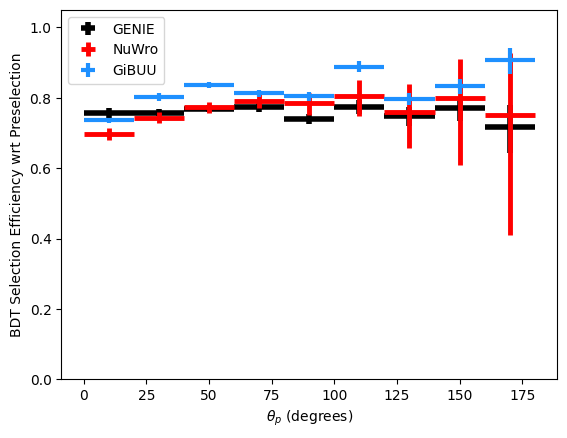

0.9900000000000001


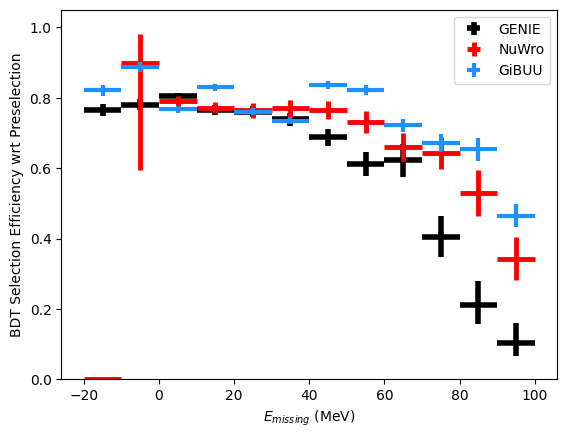

1.1


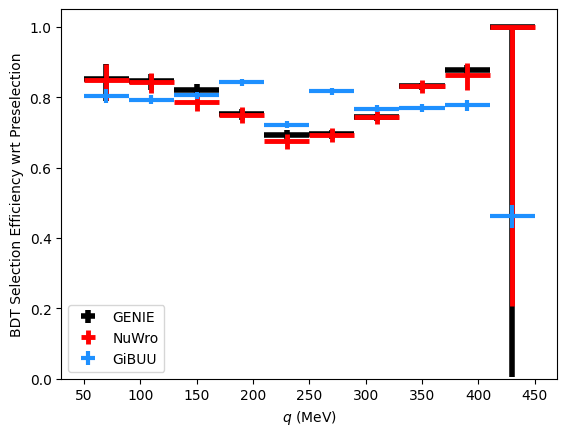

1.0194327414035798


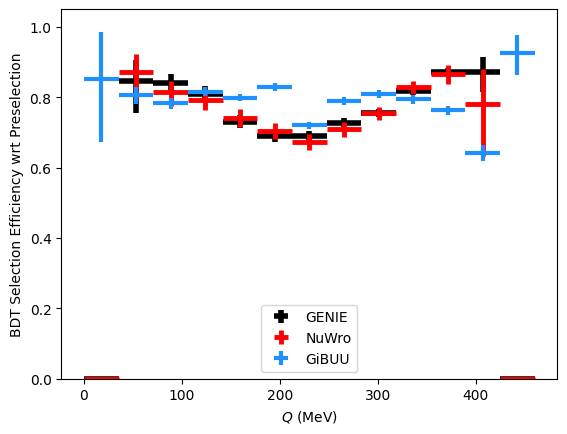

0.9772885382175447


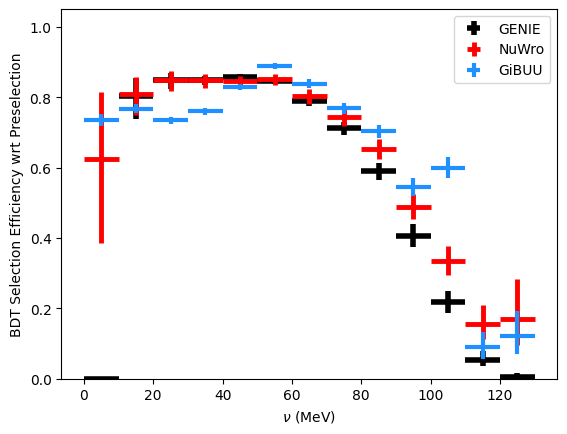

1.1


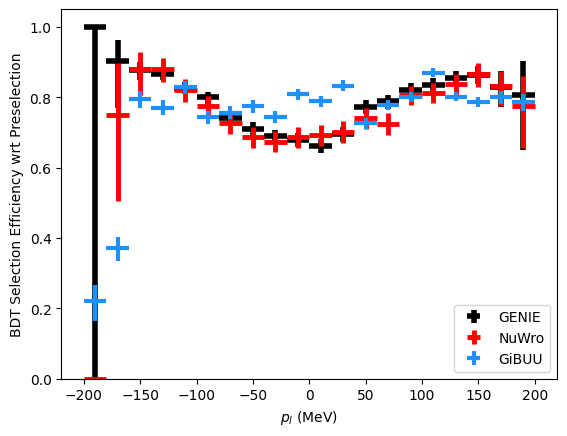

0.9666666666666668


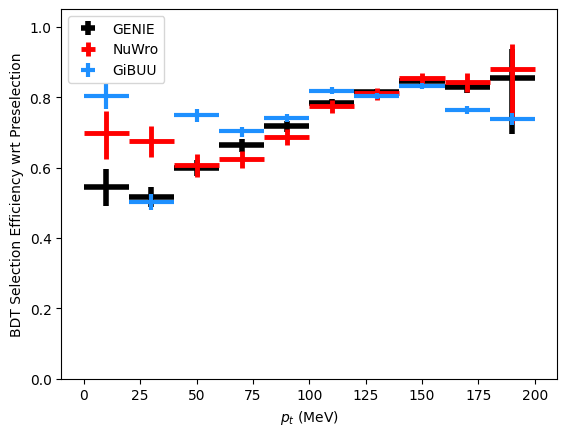

1.1


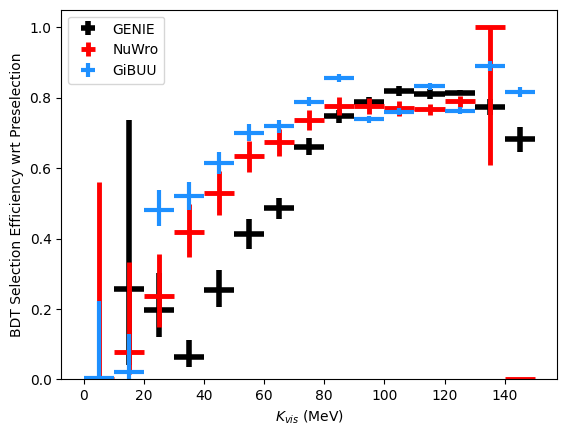

0.8593157947063447


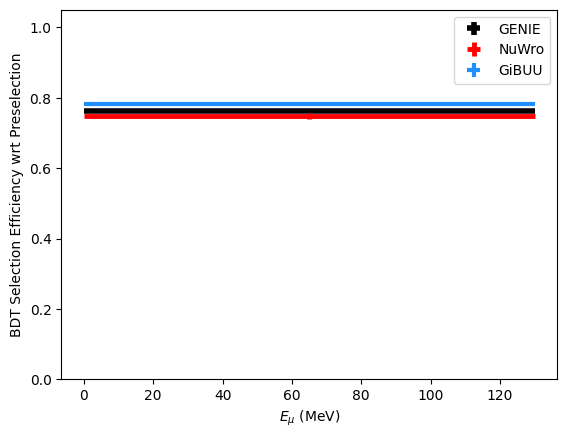

In [450]:

plot_efficiency_detailed(this_bdt_var,this_cutvalue)
plot_efficiency_detailed(this_bdt_var,this_cutvalue,wrt_preset=True)


In [451]:
this_cutvalue = 0.78
this_bdt_var = "kdar_score_lowE_genie_only"
this_add_cut = "kdar_score_hiE_genie_only>0.8"

print("old gen sel lowE passrate:",round(np.sum(lowE_overlay_df.query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("gen sel lowE passrate:",round(np.sum(lowE_overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("pre sel lowE passrate:",round(np.sum(lowE_overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("Train BDT lowE passrate:",round(np.sum(train_lowE_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(train_lowE_df["net_weight"].to_numpy())*np.sum(lowE_overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("Test BDT lowE passrate:",round(np.sum(test_lowE_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(test_lowE_df["net_weight"].to_numpy())*np.sum(lowE_overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))

print("")
print("old gen sel hiE passrate:",round(np.sum(overlay_df.query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("gen sel hiE passrate:",round(np.sum(overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("pre sel hiE passrate:",round(np.sum(overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("Train BDT hiE passrate:",round(np.sum(train_overlay_df.query(this_add_cut).query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(train_overlay_df["net_weight"].to_numpy())*np.sum(overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),4))
print("Test BDT hiE passrate:",round(np.sum(test_overlay_df.query(this_add_cut).query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(test_overlay_df["net_weight"].to_numpy())*np.sum(overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),4))


old gen sel lowE passrate: 0.235
gen sel lowE passrate: 0.263
pre sel lowE passrate: 0.094
Train BDT lowE passrate: 0.002
Test BDT lowE passrate: 0.003

old gen sel hiE passrate: 0.309
gen sel hiE passrate: 0.317
pre sel hiE passrate: 0.01
Train BDT hiE passrate: 0.0
Test BDT hiE passrate: 0.0


In [452]:

print("old gen sel lowE passrate:",round(np.sum(lowE_overlay_df.query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("gen sel lowE passrate:",round(np.sum(lowE_overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("pre sel lowE rel passrate:",round(np.sum(lowE_overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(lowE_overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy()),3))
print("Train BDT lowE rel passrate:",round(np.sum(train_lowE_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(train_lowE_df["net_weight"].to_numpy()),3))
print("Test BDT lowE rel passrate:",round(np.sum(test_lowE_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(test_lowE_df["net_weight"].to_numpy()),3))

print("")
print("old gen sel hiE passrate:",round(np.sum(overlay_df.query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("gen sel hiE passrate:",round(np.sum(overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("pre sel hiE rel passrate:",round(np.sum(overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy()),3))
print("Train BDT hiE rel passrate:",round(np.sum(train_overlay_df.query(this_add_cut).query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(train_overlay_df["net_weight"].to_numpy()),3))
print("Test BDT hiE rel passrate:",round(np.sum(test_overlay_df.query(this_add_cut).query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(test_overlay_df["net_weight"].to_numpy()),3))


old gen sel lowE passrate: 0.235
gen sel lowE passrate: 0.263
pre sel lowE rel passrate: 0.356
Train BDT lowE rel passrate: 0.019
Test BDT lowE rel passrate: 0.027

old gen sel hiE passrate: 0.309
gen sel hiE passrate: 0.317
pre sel hiE rel passrate: 0.031
Train BDT hiE rel passrate: 0.004
Test BDT hiE rel passrate: 0.005


0.17617125213146212


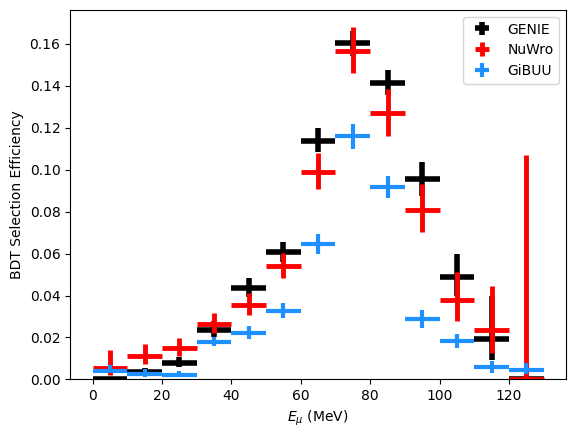

0.1333870105445385


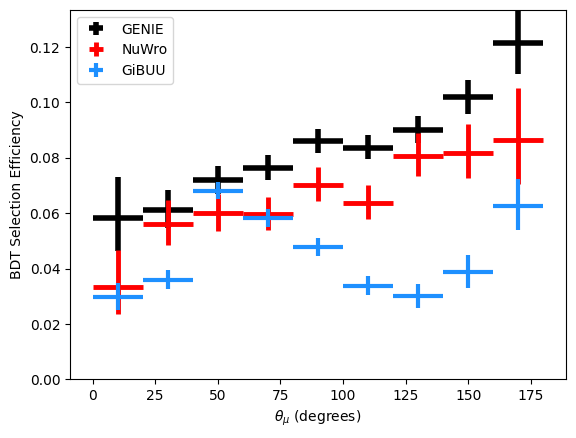

0.1468190080498572


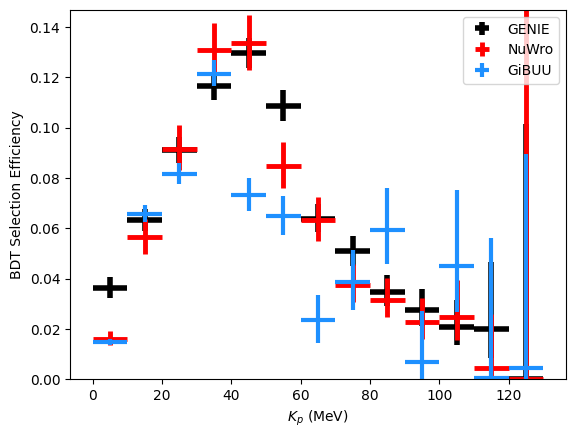

0.10895176306366922


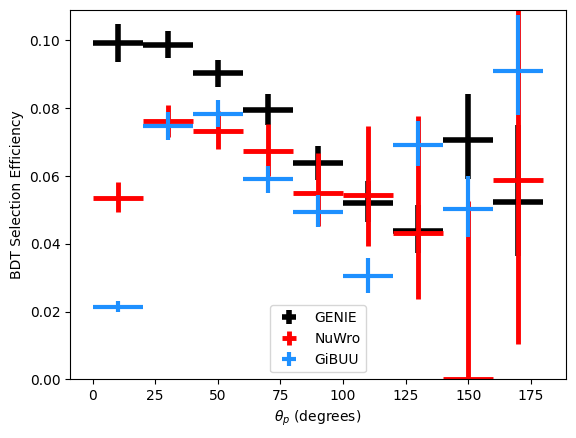

0.137280111014843


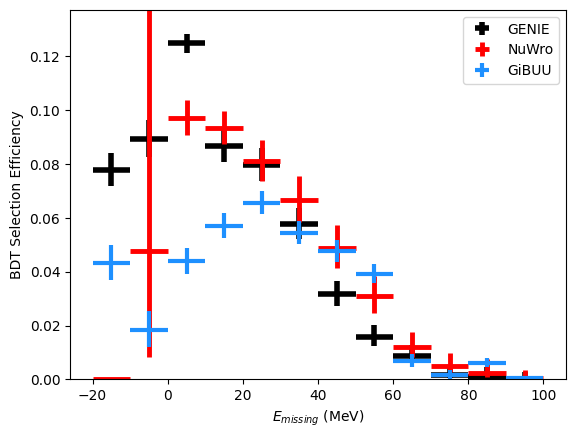

0.19316133558750154


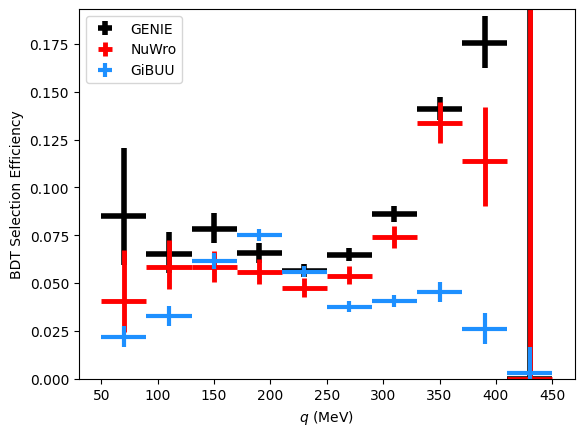

0.19516129032258067


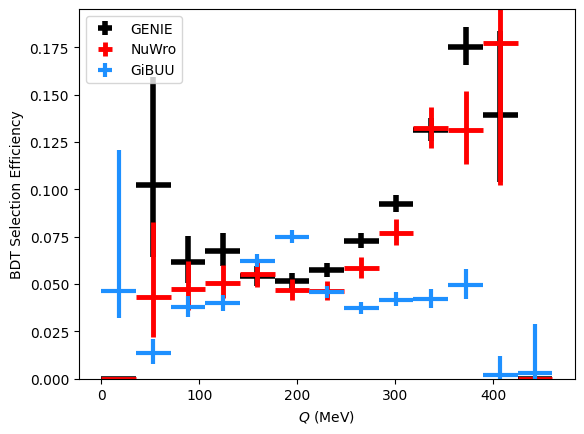

0.17516745030879977


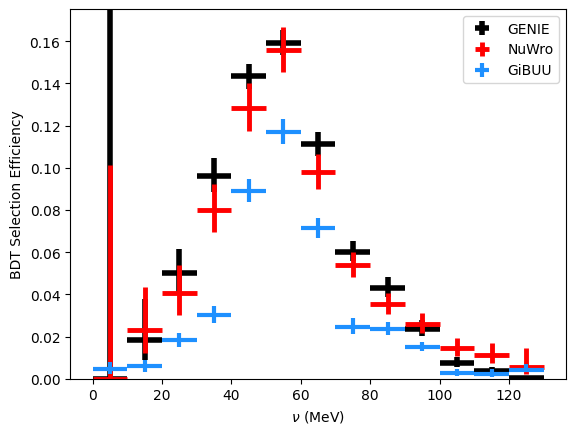

0.2140622302889824


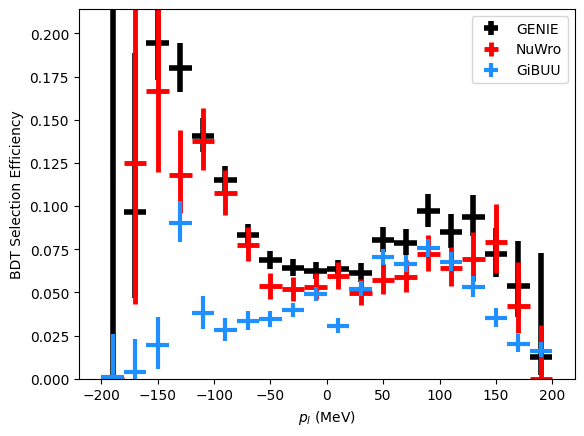

0.1562204122543335


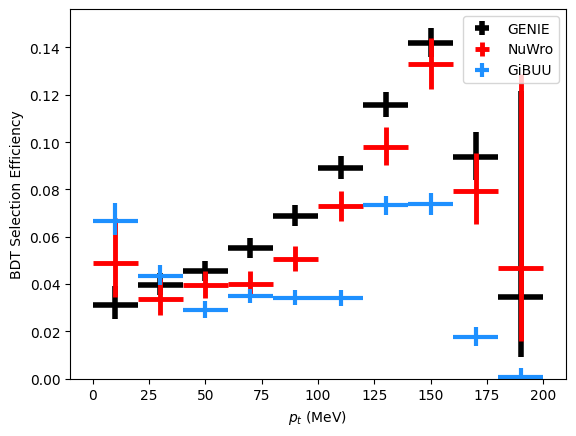

0.14245124757289887


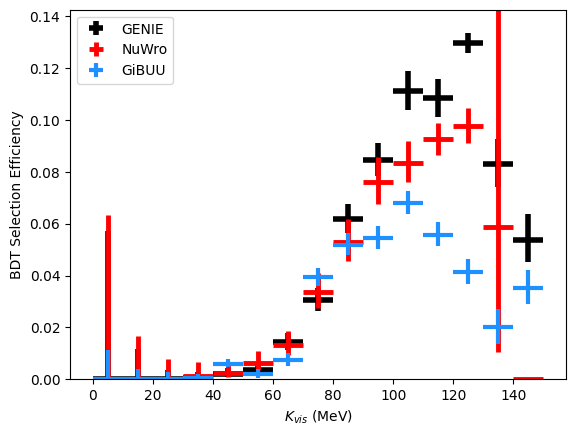

0.09266823381185532


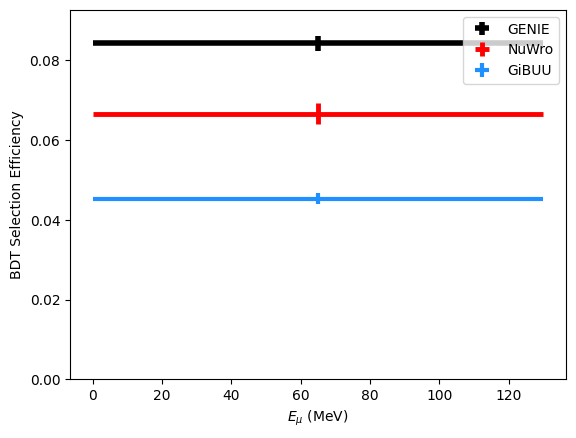

0.39053490161895754


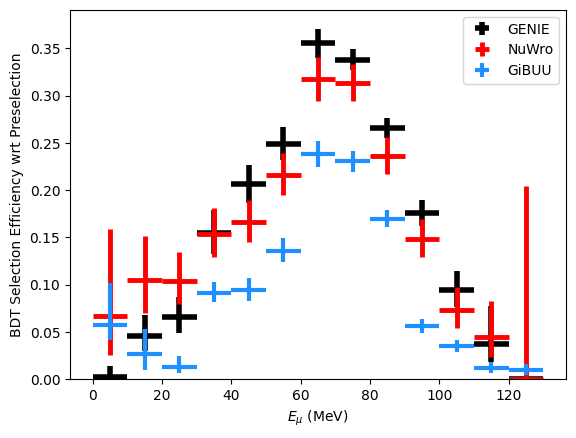

0.42562613487243656


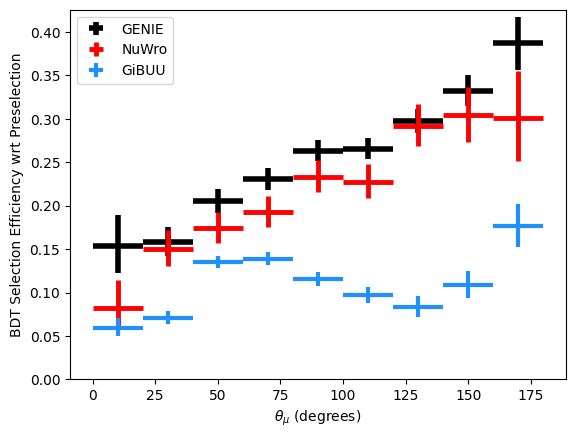

0.7108651101589204


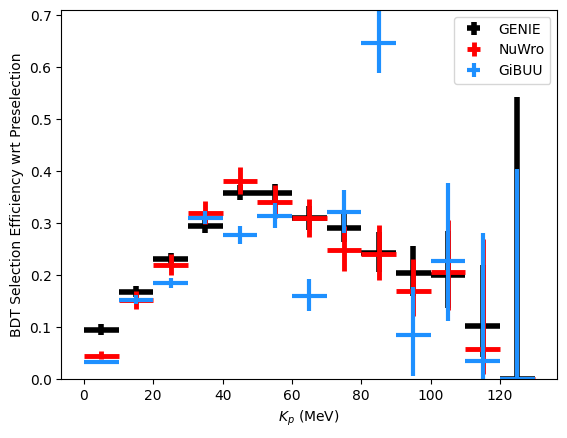

0.3658567517995835


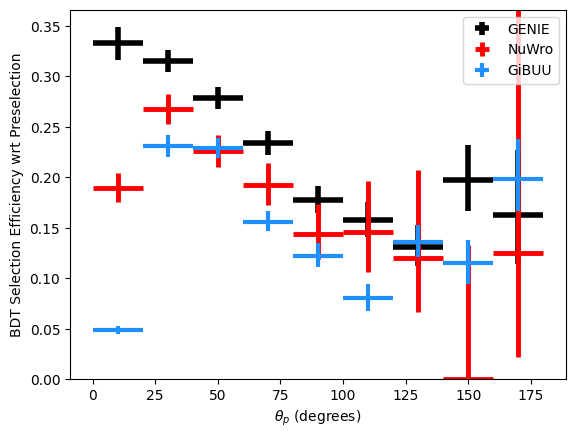

0.37980192601680757


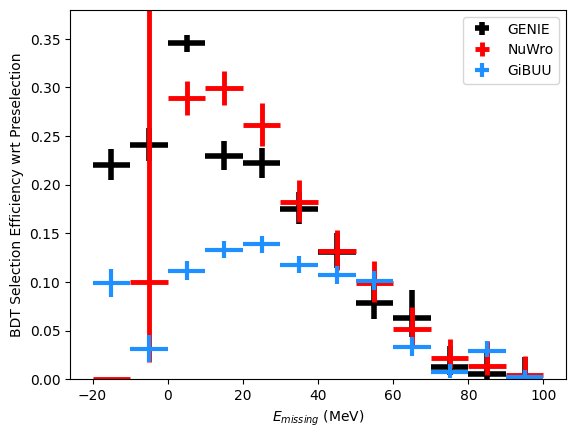

0.38093959731543625


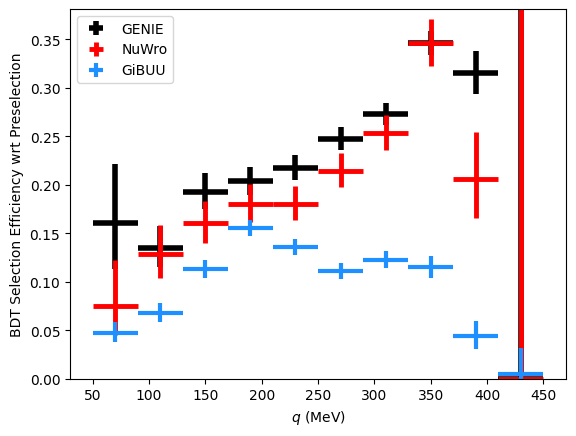

0.38964788732394373


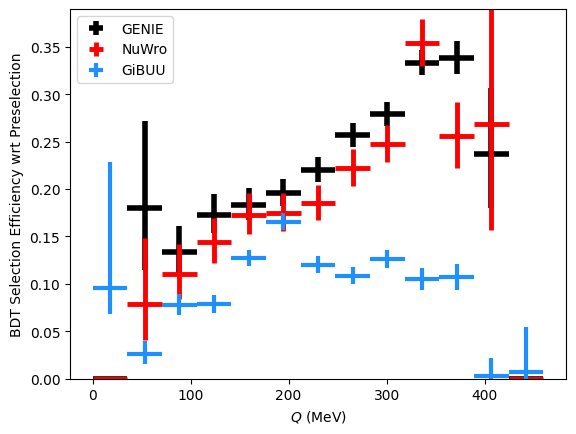

0.3859699964523316


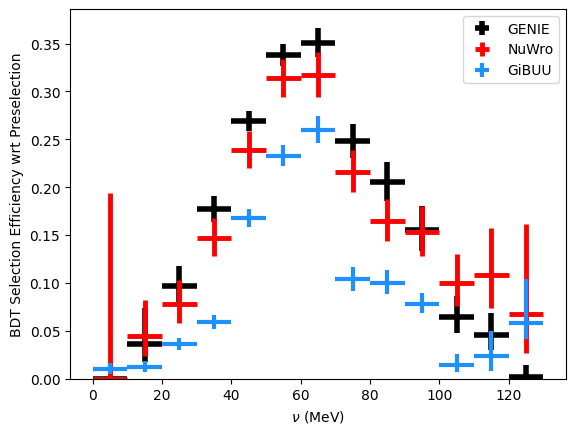

0.4127864867448807


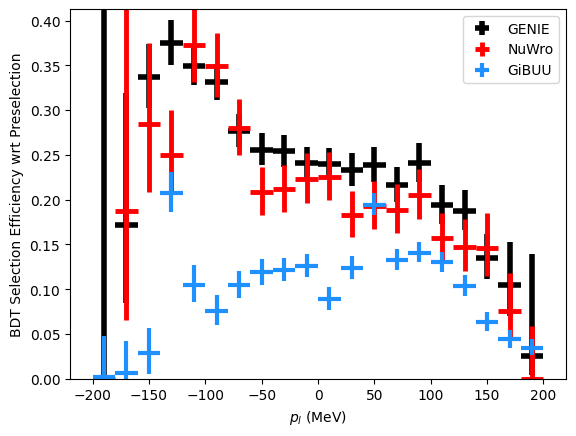

0.32074018716812136


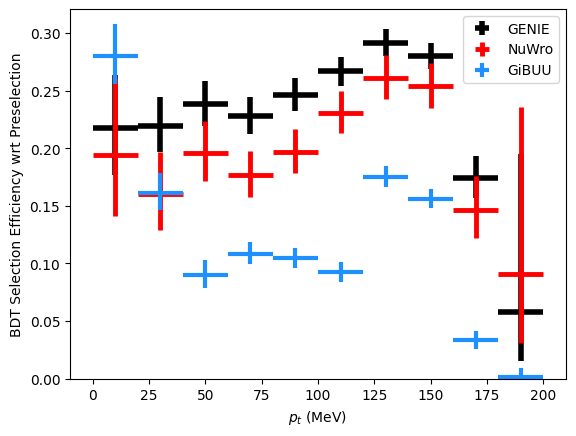

0.3889103621244431


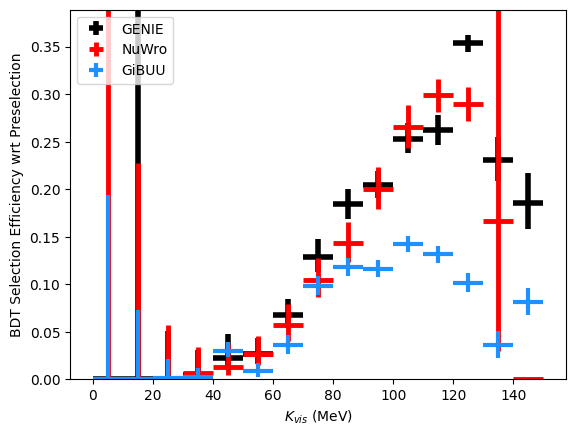

0.28454198539257053


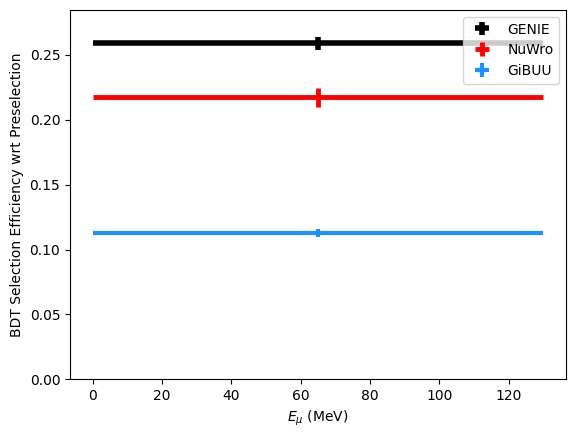

In [453]:


plot_efficiency_detailed(this_bdt_var,this_cutvalue,add_cut = this_add_cut,adjusty=True)
plot_efficiency_detailed(this_bdt_var,this_cutvalue,wrt_preset=True,add_cut = this_add_cut,adjusty=True)



In [454]:
this_cutvalue = 0.85
this_bdt_var = "kdar_score_lowE"
this_add_cut = "kdar_score_hiE>0.8"

print("old gen sel lowE passrate:",round(np.sum(lowE_overlay_df.query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("gen sel lowE passrate:",round(np.sum(lowE_overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("pre sel lowE passrate:",round(np.sum(lowE_overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("Train BDT lowE passrate:",round(np.sum(train_lowE_df.query(this_add_cut).query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(train_lowE_df["net_weight"].to_numpy())*np.sum(lowE_overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("Test BDT lowE passrate:",round(np.sum(test_lowE_df.query(this_add_cut).query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(test_lowE_df["net_weight"].to_numpy())*np.sum(lowE_overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))

print("")
print("old gen sel hiE passrate:",round(np.sum(overlay_df.query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("gen sel hiE passrate:",round(np.sum(overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("pre sel hiE passrate:",round(np.sum(overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("Train BDT hiE passrate:",round(np.sum(train_overlay_df.query(this_add_cut).query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(train_overlay_df["net_weight"].to_numpy())*np.sum(overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),4))
print("Test BDT hiE passrate:",round(np.sum(test_overlay_df.query(this_add_cut).query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(test_overlay_df["net_weight"].to_numpy())*np.sum(overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),4))


old gen sel lowE passrate: 0.235
gen sel lowE passrate: 0.263
pre sel lowE passrate: 0.094
Train BDT lowE passrate: 0.002
Test BDT lowE passrate: 0.003

old gen sel hiE passrate: 0.309
gen sel hiE passrate: 0.317
pre sel hiE passrate: 0.01
Train BDT hiE passrate: 1e-04
Test BDT hiE passrate: 1e-04


In [455]:

print("old gen sel lowE passrate:",round(np.sum(lowE_overlay_df.query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("gen sel lowE passrate:",round(np.sum(lowE_overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(lowE_overlay_df["net_weight"].to_numpy()),3))
print("pre sel lowE rel passrate:",round(np.sum(lowE_overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(lowE_overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy()),3))
print("Train BDT lowE rel passrate:",round(np.sum(train_lowE_df.query(this_add_cut).query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(train_lowE_df["net_weight"].to_numpy()),3))
print("Test BDT lowE rel passrate:",round(np.sum(test_lowE_df.query(this_add_cut).query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(test_lowE_df["net_weight"].to_numpy()),3))

print("")
print("old gen sel hiE passrate:",round(np.sum(overlay_df.query("kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("gen sel hiE passrate:",round(np.sum(overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy())/np.sum(overlay_df["net_weight"].to_numpy()),3))
print("pre sel hiE rel passrate:",round(np.sum(overlay_df.query(presel_query)["net_weight"].to_numpy())/np.sum(overlay_df.query("ssm_kine_reco_Enu>0")["net_weight"].to_numpy()),3))
print("Train BDT hiE rel passrate:",round(np.sum(train_overlay_df.query(this_add_cut).query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(train_overlay_df["net_weight"].to_numpy()),3))
print("Test BDT hiE rel passrate:",round(np.sum(test_overlay_df.query(this_add_cut).query(presel_query).query(this_bdt_var+f">{this_cutvalue}")["net_weight"].to_numpy())/np.sum(test_overlay_df["net_weight"].to_numpy()),3))


old gen sel lowE passrate: 0.235
gen sel lowE passrate: 0.263
pre sel lowE rel passrate: 0.356
Train BDT lowE rel passrate: 0.022
Test BDT lowE rel passrate: 0.027

old gen sel hiE passrate: 0.309
gen sel hiE passrate: 0.317
pre sel hiE rel passrate: 0.031
Train BDT hiE rel passrate: 0.01
Test BDT hiE rel passrate: 0.014


0.20849681794643404


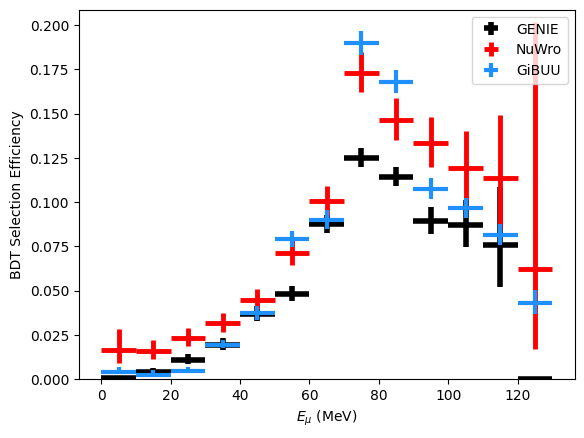

0.17460537701845172


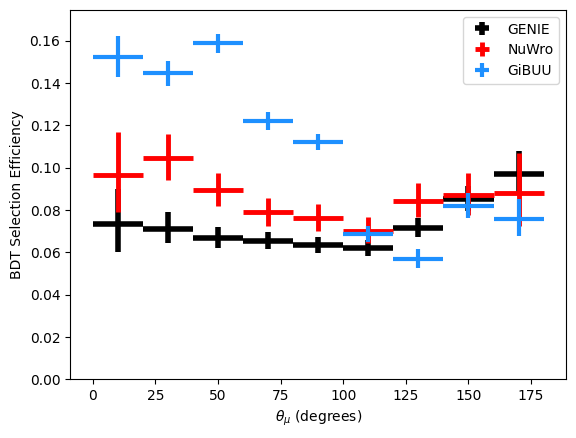

0.14433213025331498


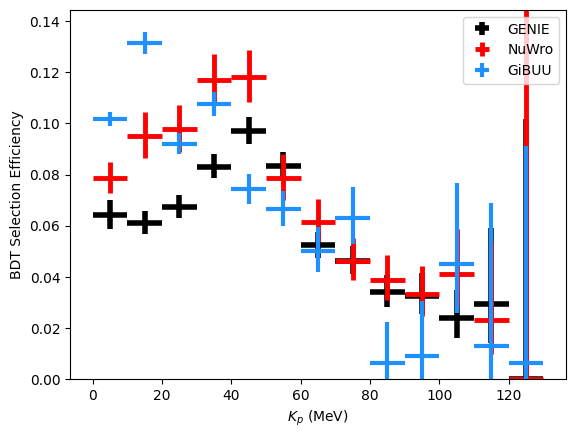

0.12941176470588237


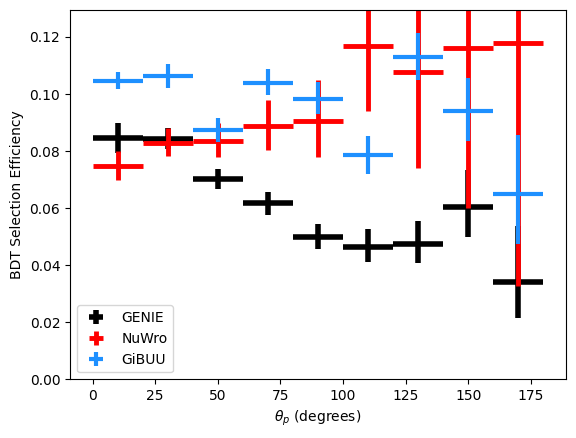

0.15400811433792116


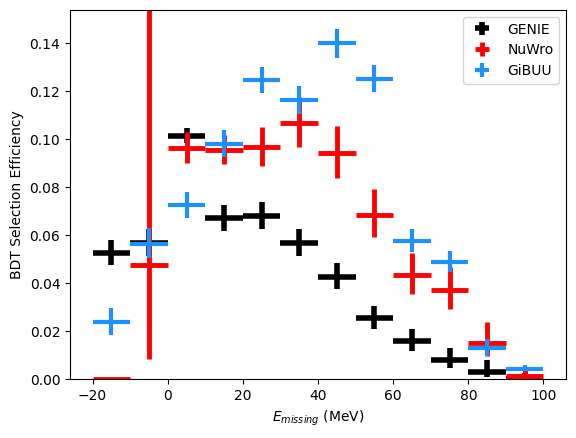

0.18512226641178134


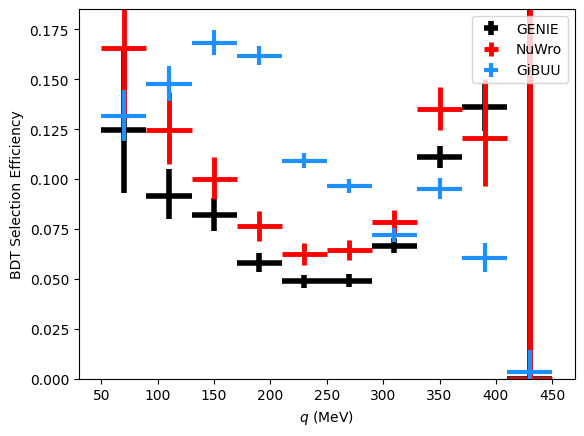

0.189247311827957


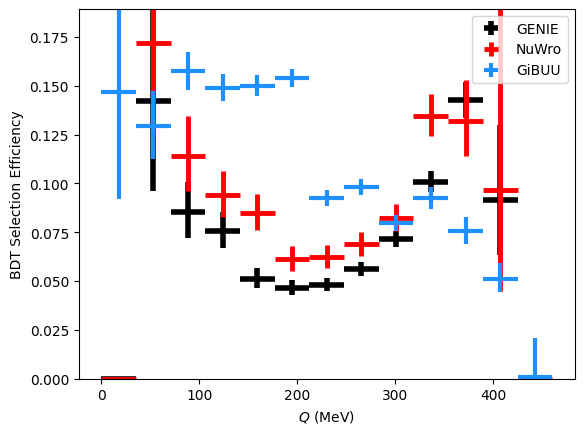

0.20747441202402117


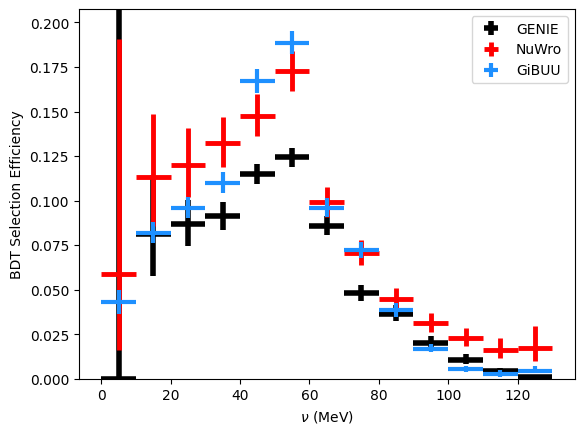

0.20348667651414873


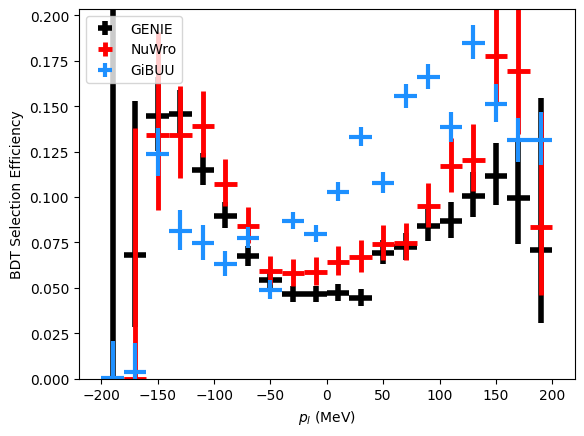

0.1693809524178505


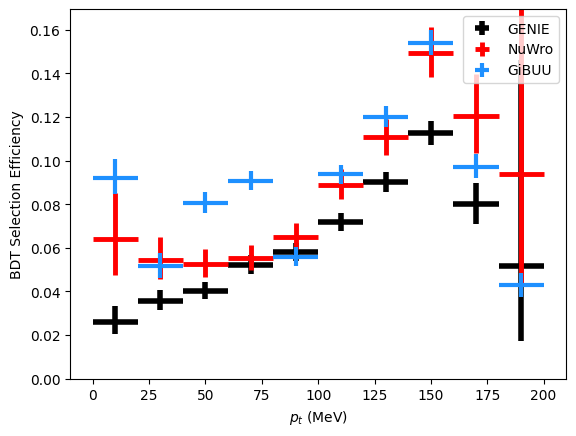

0.14962151348590852


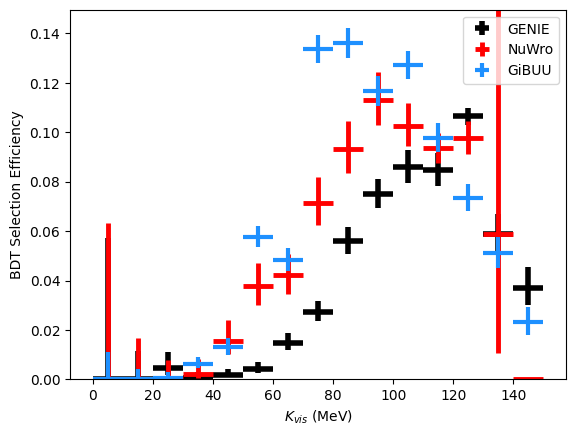

0.1103697642683983


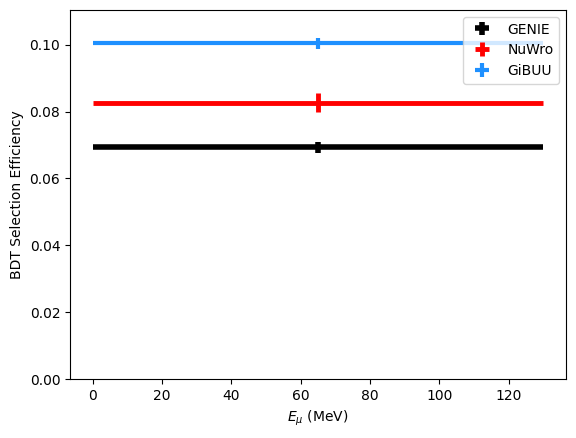

0.41485552489757543


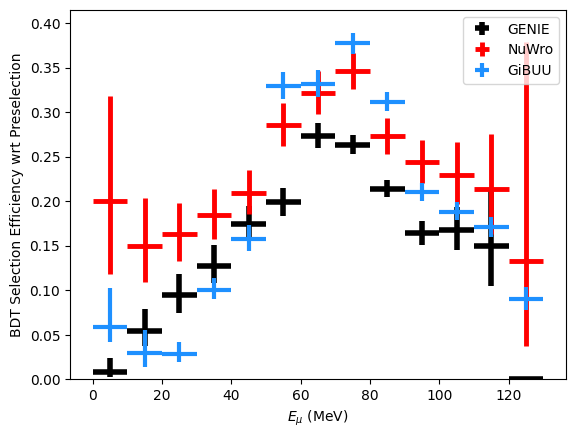

0.35596107055961074


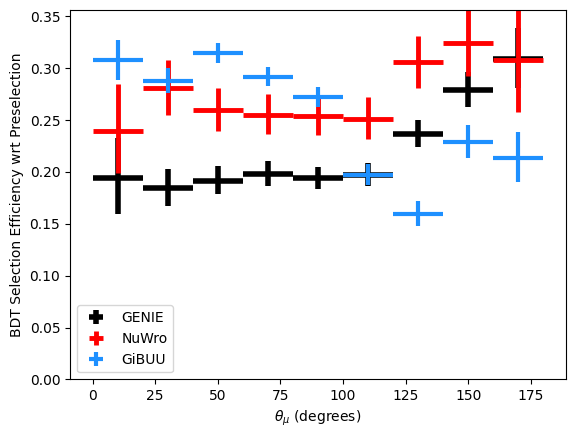

1.0261574268341065


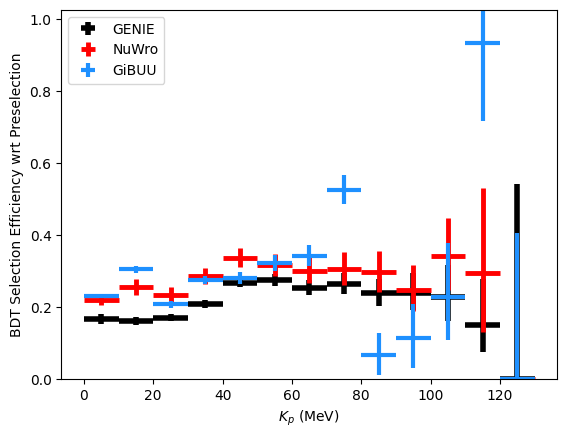

0.3612048089504242


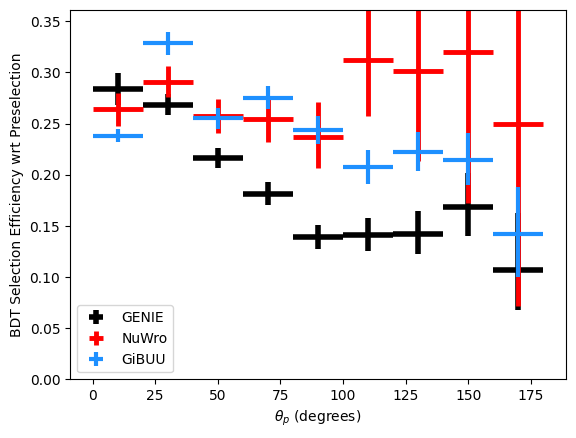

0.3562585771083832


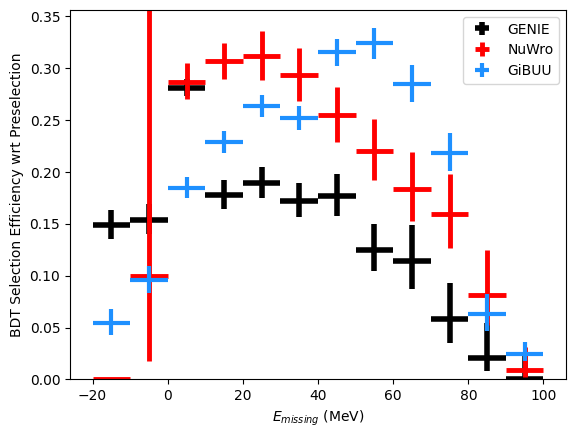

0.3853691275167786


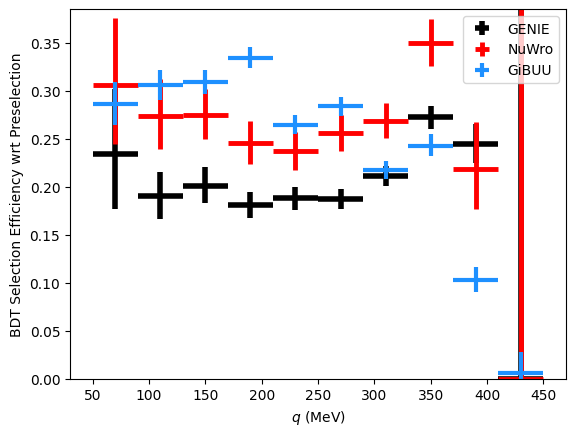

0.3966197183098592


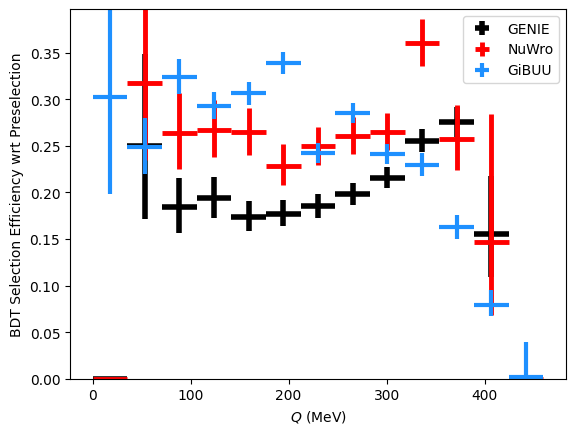

0.4125959545373917


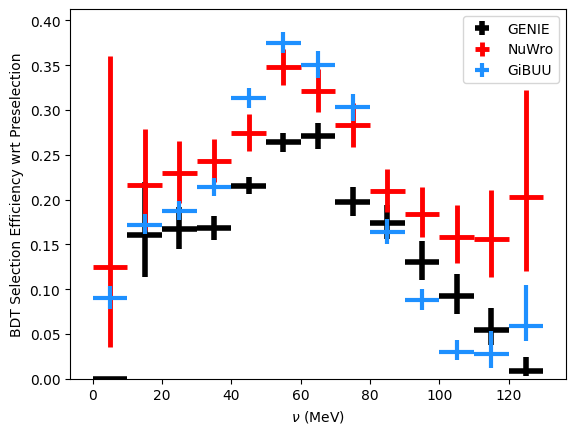

0.4138195777351248


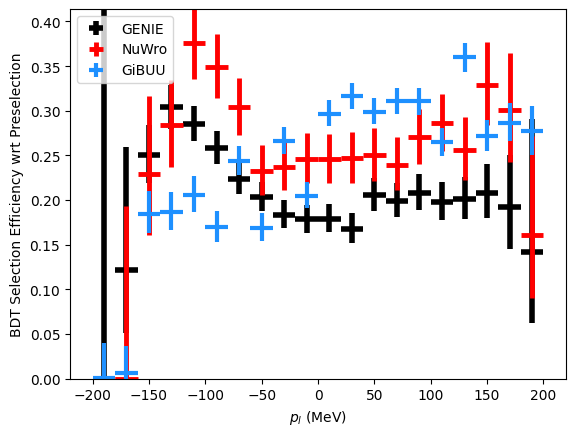

0.42286397516727453


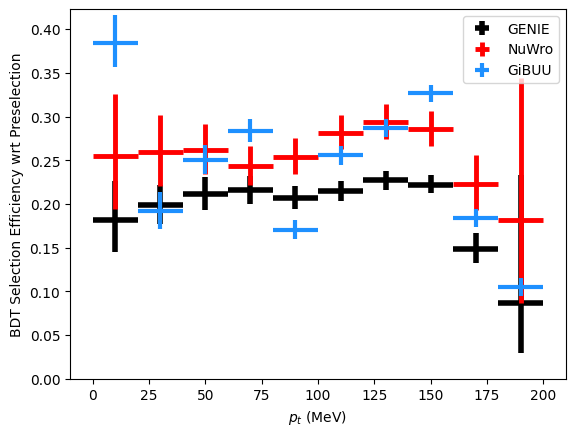

0.3683845818042755


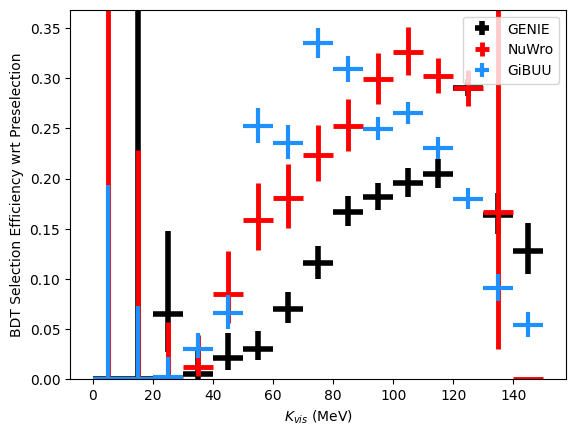

0.2959376101515686


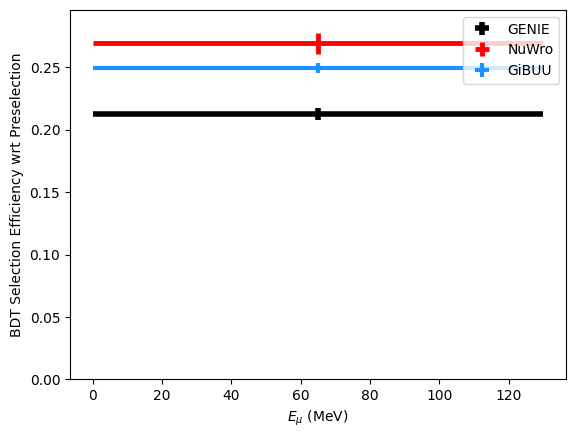

In [456]:

plot_efficiency_detailed(this_bdt_var,this_cutvalue,add_cut = this_add_cut ,adjusty=True)
plot_efficiency_detailed(this_bdt_var,this_cutvalue,wrt_preset=True,add_cut = this_add_cut ,adjusty=True)



In [327]:
f_kdar_overlay = uproot.open("/Users/bbogart/Documents/data/validation_MCC9.10/10_04_07_08/MCC9.10_Run4b_NuMI_beam_on_RHC_data_surprise_reco2_hist_goodruns_62388166_snapshot.root")["wcpselection"]
f_kdar_overlay_bdt = f_kdar_overlay["T_BDTvars"].pandas.df(bdt_vars+ssm_bdt_vars, flatten=False)
f_kdar_overlay_eval = f_kdar_overlay["T_eval"].pandas.df(eval_vars, flatten=False)
f_kdar_overlay_pfeval = f_kdar_overlay["T_PFeval"].pandas.df(pf_eval_vars, flatten=False)
f_kdar_overlay_kine = f_kdar_overlay["T_KINEvars"].pandas.df(kine_vars+kine_mc_vars, flatten=False)
f_kdar_overlay_pot = f_kdar_overlay["T_pot"].pandas.df("pot_tor875good", flatten=False)
kdar_overlay_POT = np.sum(f_kdar_overlay_pot["pot_tor875good"].to_numpy())
data_df = pd.concat([f_kdar_overlay_bdt, f_kdar_overlay_eval, f_kdar_overlay_pfeval, f_kdar_overlay_kine], axis=1, sort=False)

del f_kdar_overlay
del f_kdar_overlay_bdt
del f_kdar_overlay_eval
del f_kdar_overlay_pfeval
del f_kdar_overlay_kine

if 0: 
    f_kdar_overlay = uproot.open("/Users/bbogart/Documents/data/KDAR_MCC9.10/prodgenie_UseGroundStateRemnant_kdar_overlay_run1_train.root")["wcpselection"]
    f_kdar_overlay_bdt = f_kdar_overlay["T_BDTvars"].pandas.df(bdt_vars+ssm_bdt_vars, flatten=False)
    f_kdar_overlay_eval = f_kdar_overlay["T_eval"].pandas.df(eval_vars, flatten=False)
    f_kdar_overlay_pfeval = f_kdar_overlay["T_PFeval"].pandas.df(pf_eval_vars, flatten=False)
    f_kdar_overlay_kine = f_kdar_overlay["T_KINEvars"].pandas.df(kine_vars+kine_mc_vars, flatten=False)
    f_kdar_overlay_pot = f_kdar_overlay["T_pot"].pandas.df("pot_tor875good", flatten=False)
    kdar_overlay_POT = np.sum(f_kdar_overlay_pot["pot_tor875good"].to_numpy())
    data_df = pd.concat([f_kdar_overlay_bdt, f_kdar_overlay_eval, f_kdar_overlay_pfeval, f_kdar_overlay_kine], axis=1, sort=False)
    
    del f_kdar_overlay
    del f_kdar_overlay_bdt
    del f_kdar_overlay_eval
    del f_kdar_overlay_pfeval
    del f_kdar_overlay_kine

    data_df = pd.concat([data_df, data_df_2], sort=False)

data_df = kdar.apply_goodruns(data_df)


print("All events",data_df.shape[0])

data_df["rse_num"] = (data_df["run"].to_numpy() * 100_000_000_000
                         + data_df["subrun"].to_numpy() * 1_000_000
                         + data_df["event"].to_numpy())
data_df = data_df.drop_duplicates(subset=['rse_num'])
print("Duplicates Dropped",data_df.shape[0])


data_df["isEXT"] = [0 for i in range(data_df.shape[0])]
data_df["isDirt"] = [0 for i in range(data_df.shape[0])]
data_df["WC_file"] = ["data" for i in range(data_df.shape[0])]
data_df["POTscaled"] = [1 for i in range(data_df.shape[0])]
data_df["is_KDAR"] = [0 for i in range(data_df.shape[0])]

All events 121980
Duplicates Dropped 115199


In [328]:
data_df = kdar.add_ssm_kine_info(data_df)
data_df = kdar.add_ssm_reco_proton_info(data_df)
data_df = kdar.add_reco_proton_muon(data_df)
data_df = kdar.add_ssm_reco_dirt_vars(data_df)

100%|███████████████████████████████| 115199/115199 [00:00<00:00, 638628.09it/s]


In [329]:

this_bdt_var = "kdar_score_lowE_genie_only"
this_bdt_model = model_lowE_genie_only
this_names = new_names_lowE_genie_only
d_pred_df = data_df[this_names]
d_reg = xgb.DMatrix(d_pred_df, enable_categorical=True)
d_pred = this_bdt_model.predict(d_reg)
data_df[this_bdt_var] = d_pred

this_bdt_var = "kdar_score_lowE"
this_bdt_model = model_lowE
this_names = new_names_lowE
d_pred_df = data_df[this_names]
d_reg = xgb.DMatrix(d_pred_df, enable_categorical=True)
d_pred = this_bdt_model.predict(d_reg)
data_df[this_bdt_var] = d_pred


In [330]:
this_cutvalue = 0.65
this_bdt_var = "kdar_score_lowE_genie_only"

print("old gen sel lowE passrate:",round(data_df.query("kine_reco_Enu>0").shape[0]/data_df.shape[0],3))
print("gen sel lowE passrate:",round(data_df.query("ssm_kine_reco_Enu>0").shape[0]/data_df.shape[0],3))
print("pre sel lowE passrate:",round(data_df.query(presel_query).shape[0]/data_df.shape[0],4))
print("BDT lowE passrate:",round(data_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}").shape[0]/data_df.shape[0],5))

print("")
print("old gen sel lowE passrate:",round(data_df.query("kine_reco_Enu>0").shape[0]/data_df.shape[0],3))
print("gen sel lowE passrate:",round(data_df.query("ssm_kine_reco_Enu>0").shape[0]/data_df.shape[0],3))
print("pre sel lowE rel passrate:",round(data_df.query(presel_query).shape[0]/data_df.query("ssm_kine_reco_Enu>0").shape[0],3))
print("BDT lowE rel passrate:",round(data_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}").shape[0]/data_df.query(presel_query).shape[0],3))


old gen sel lowE passrate: 0.046
gen sel lowE passrate: 0.049
pre sel lowE passrate: 0.0038
BDT lowE passrate: 0.00046

old gen sel lowE passrate: 0.046
gen sel lowE passrate: 0.049
pre sel lowE rel passrate: 0.076
BDT lowE rel passrate: 0.122


In [331]:
this_cutvalue = 0.8
this_bdt_var = "kdar_score_lowE"

print("old gen sel passrate:",round(data_df.query("kine_reco_Enu>0").shape[0]/data_df.shape[0],3))
print("gen sel passrate:",round(data_df.query("ssm_kine_reco_Enu>0").shape[0]/data_df.shape[0],3))
print("pre sel passrate:",round(data_df.query(presel_query).shape[0]/data_df.shape[0],4))
print("BDT passrate:",round(data_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}").shape[0]/data_df.shape[0],5))

print("")
print("old gen sel passrate:",round(data_df.query("kine_reco_Enu>0").shape[0]/data_df.shape[0],3))
print("gen sel passrate:",round(data_df.query("ssm_kine_reco_Enu>0").shape[0]/data_df.shape[0],3))
print("pre sel rel passrate:",round(data_df.query(presel_query).shape[0]/data_df.query("ssm_kine_reco_Enu>0").shape[0],3))
print("BDT rel passrate:",round(data_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}").shape[0]/data_df.query(presel_query).shape[0],3))


old gen sel passrate: 0.046
gen sel passrate: 0.049
pre sel passrate: 0.0038
BDT passrate: 0.00033

old gen sel passrate: 0.046
gen sel passrate: 0.049
pre sel rel passrate: 0.076
BDT rel passrate: 0.087


In [332]:

pot = 0.28
print("old gen sel per e20pot:",round(data_df.query("kine_reco_Enu>0").shape[0]/pot,3))
print("gen sel per e20pot:",round(data_df.query("ssm_kine_reco_Enu>0").shape[0]/pot,3))
print("pre sel per e20pot:",round(data_df.query(presel_query).shape[0]/pot,4))
print("BDT per e20pot:",round(data_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}").shape[0]/pot,5))

tot_pot = 13
print("")
print("old gen sel full dataset:",round(data_df.query("kine_reco_Enu>0").shape[0]/pot*tot_pot,3))
print("gen sel full dataset:",round(data_df.query("ssm_kine_reco_Enu>0").shape[0]/pot*tot_pot,3))
print("pre sel full dataset:",round(data_df.query(presel_query).shape[0]/pot*tot_pot,3))
print("BDT rel full dataset:",round(data_df.query(presel_query).query(this_bdt_var+f">{this_cutvalue}").shape[0]/pot*tot_pot,3))



old gen sel per e20pot: 18907.143
gen sel per e20pot: 20360.714
pre sel per e20pot: 1557.1429
BDT per e20pot: 135.71429

old gen sel full dataset: 245792.857
gen sel full dataset: 264689.286
pre sel full dataset: 20242.857
BDT rel full dataset: 1764.286


In [61]:
sigma = 1e-24 #cm^2
D = 1.395 #g/cm³
M = 39.948  #g/mol
An = 6.02e23 #part/mol
N = An*D/M
Sigma = sigma*N
mfp = 1/Sigma
l = 2

print(1 - np.exp(-l/mfp))

0.041172559693574806
